In [18]:
import sys; sys.path.insert(0, "../../")
import os
from  functools import partial

import jax
from jax import random
from flax.training.checkpoints import save_checkpoint, restore_checkpoint
import flax.linen as nn

import numpy as np
import matplotlib.pyplot as plt

from experiments.configs.mnist_hard_ovr_classification import get_config
from src.data import get_image_dataset, NumpyLoader
from src.utils.notebook_metrics import *
from src.utils.training import setup_training

In [8]:
os.environ['XLA_FLAGS'] = "--xla_gpu_force_compilation_parallelism=1"

In [9]:
config = get_config()

In [10]:
train_dataset, test_dataset, val_dataset = get_image_dataset(
    dataset_name=config.dataset_name,
    val_percent=config.val_percent,
    flatten_img=True,
    train_augmentations=[
        # transforms.RandomCrop(28, padding=2),
        # transforms.RandomAffine(degrees=5, translate=(0.05, 0.05), scale=(0.95, 1.05), shear=5),
        # transforms.RandomHorizontalFlip(),
        # transforms.
    ]
)
train_loader = NumpyLoader(train_dataset, config.batch_size, num_workers=8)
val_loader = NumpyLoader(val_dataset, config.batch_size, num_workers=8)
test_loader = NumpyLoader(test_dataset, config.batch_size, num_workers=8)

In [11]:
X_test, y_test = list(zip(*test_loader.dataset))

In [20]:
rng = random.PRNGKey(0)
setup_rng, rng = random.split(rng)
init_x = train_dataset[0][0]
init_y = train_dataset[0][1]

prod_model, _ = setup_training(config, setup_rng, init_x, init_y)

In [13]:
MODEL_NAME = "prod_model_0_0.5_soft_ovr"

state = restore_checkpoint(f'dynNN_redux/{MODEL_NAME}', 1)
    
pred_fun = partial(
        prod_model.apply,
        {"params": state['params'], **state['model_state']},
        train=False,
        method=prod_model.ens_logits
    )
logits = jax.vmap(
    pred_fun, axis_name="batch"
)(jnp.array(X_test))

nlls_ = jax.vmap(ovr_nll)(logits, jnp.array(y_test))

infs = jnp.isinf(nlls_)
print(f"dropping {infs.sum()} infs for prod of 5")

dropping 446 infs for prod of 5


In [14]:
def get_experts_preds(preds):
    return {i: int(x) for i, x in enumerate(preds.sum(axis=0)) if x >0}

test id: 115
individual experts pred: {4: 3, 9: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


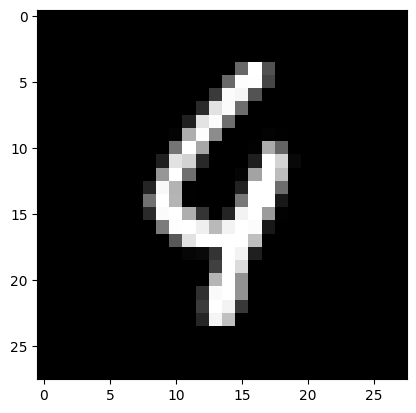

True
test id: 149
individual experts pred: {2: 3, 4: 1, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


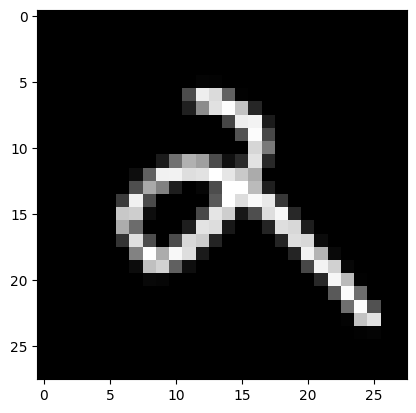

True
test id: 233
individual experts pred: {3: 1, 8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


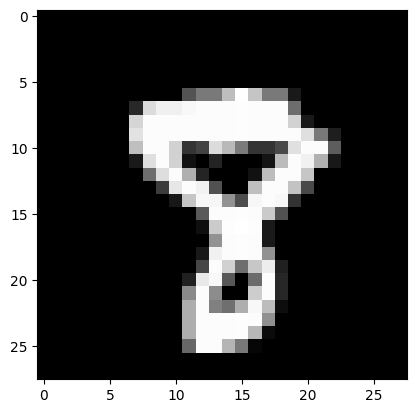

True
test id: 241
individual experts pred: {8: 3, 9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


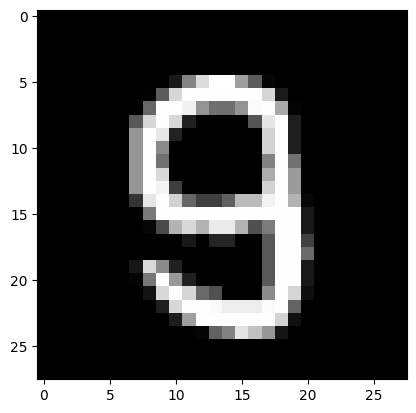

True
test id: 247
individual experts pred: {2: 4, 6: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


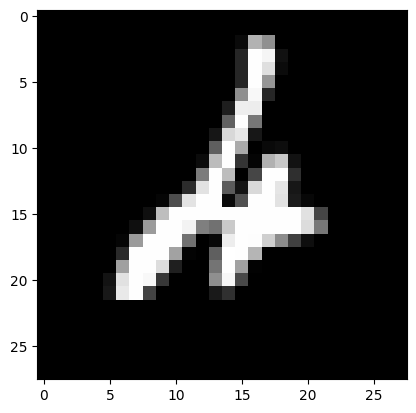

True
test id: 259
individual experts pred: {0: 2, 6: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


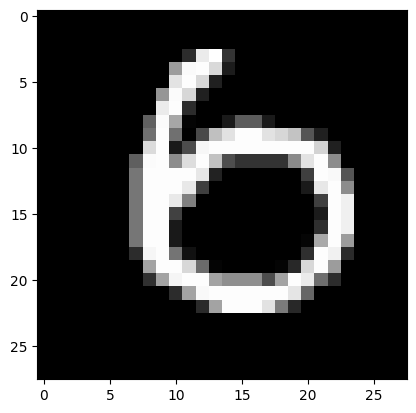

True
test id: 290
individual experts pred: {4: 1, 8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


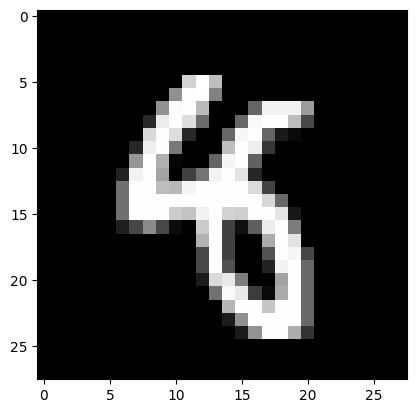

True
test id: 300
individual experts pred: {4: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


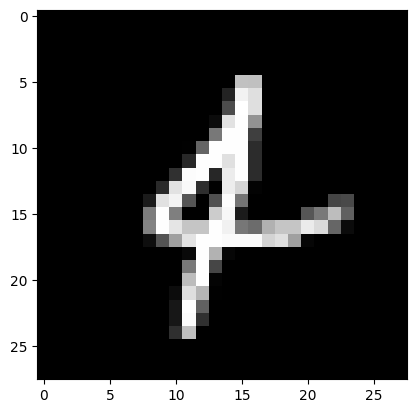

True
test id: 320
individual experts pred: {1: 1, 9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


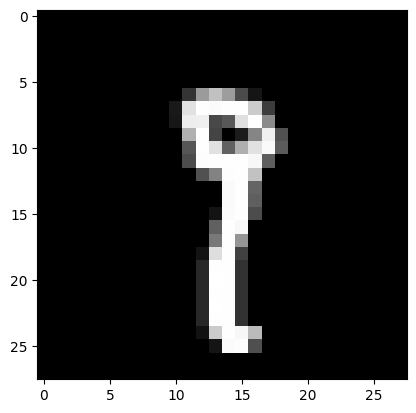

True
test id: 321
individual experts pred: {2: 1, 7: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


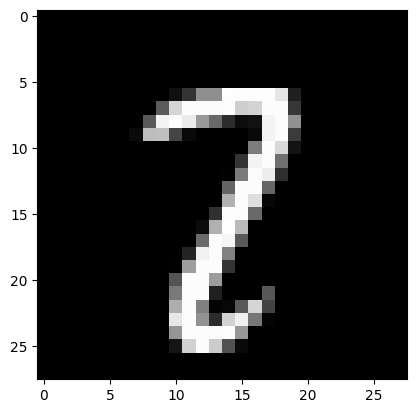

True
test id: 381
individual experts pred: {3: 2, 7: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


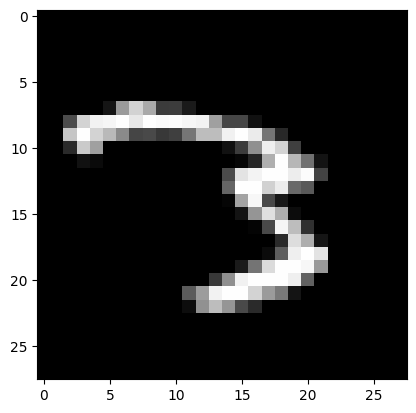

True
test id: 417
individual experts pred: {9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


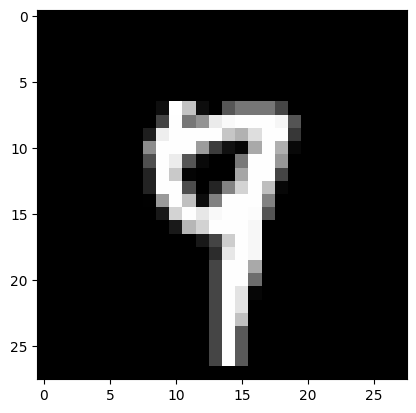

True
test id: 445
individual experts pred: {0: 5, 6: 1}
PoE predictive: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


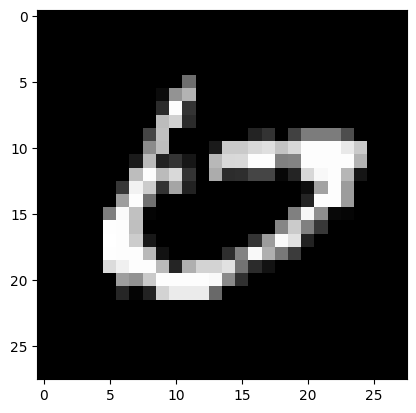

True
test id: 447
individual experts pred: {4: 3, 9: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


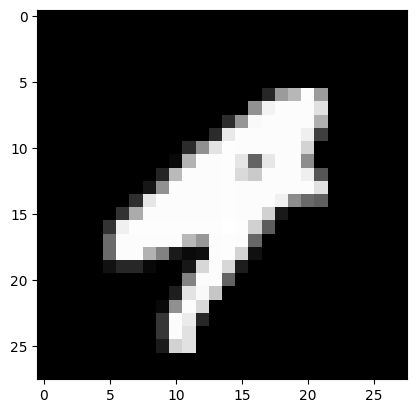

True
test id: 448
individual experts pred: {3: 1, 8: 2, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


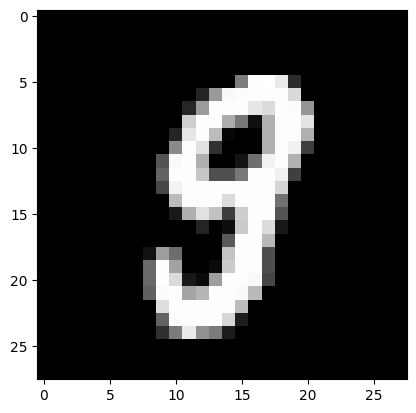

True
test id: 449
individual experts pred: {3: 4, 5: 5}
PoE predictive: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
true label: 3


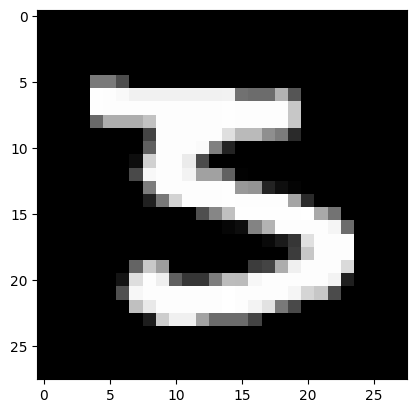

True
test id: 456
individual experts pred: {2: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


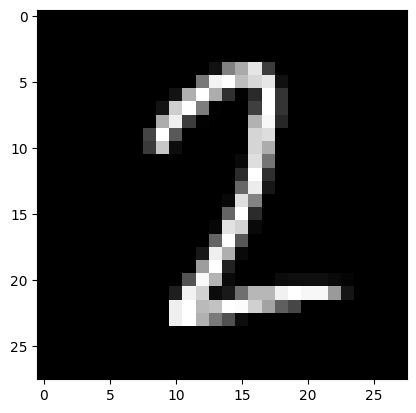

True
test id: 495
individual experts pred: {2: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


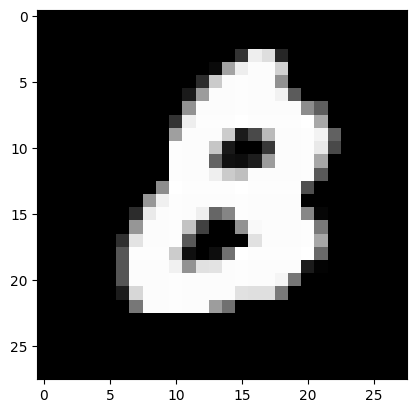

True
test id: 543
individual experts pred: {8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


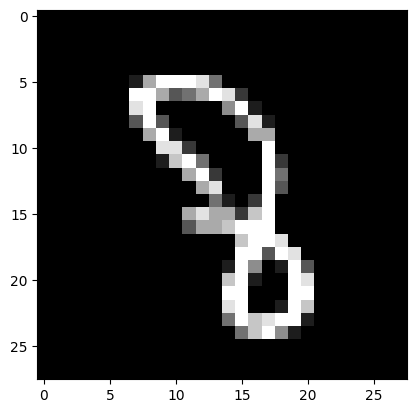

True
test id: 551
individual experts pred: {7: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


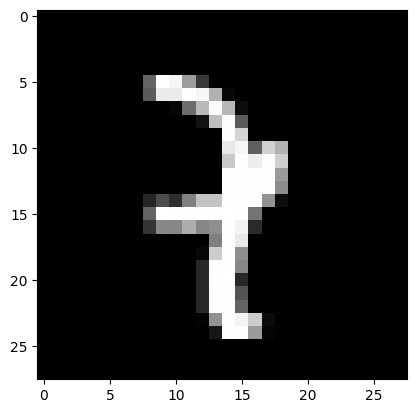

True
test id: 582
individual experts pred: {2: 4, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


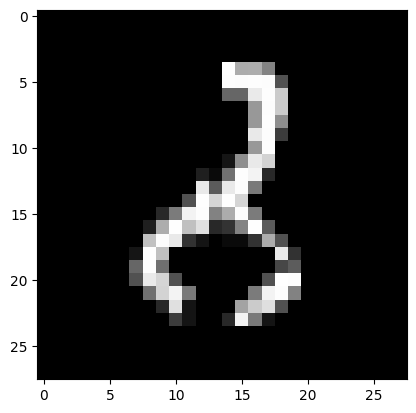

True
test id: 583
individual experts pred: {2: 3, 7: 2, 8: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


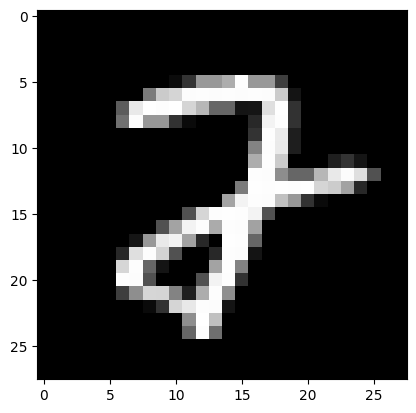

True
test id: 619
individual experts pred: {1: 3, 8: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 1


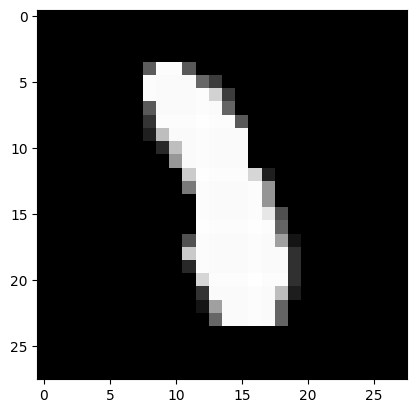

True
test id: 629
individual experts pred: {2: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


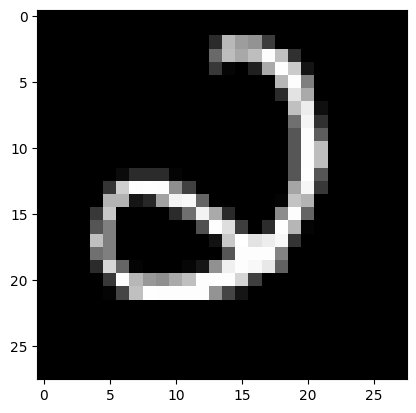

True
test id: 659
individual experts pred: {3: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


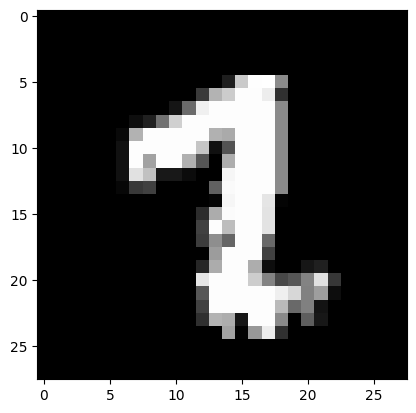

True
test id: 684
individual experts pred: {3: 2, 7: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


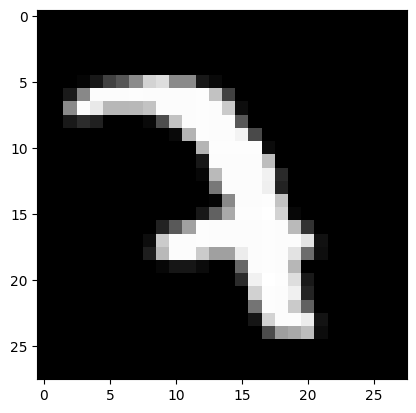

True
test id: 691
individual experts pred: {4: 4, 8: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


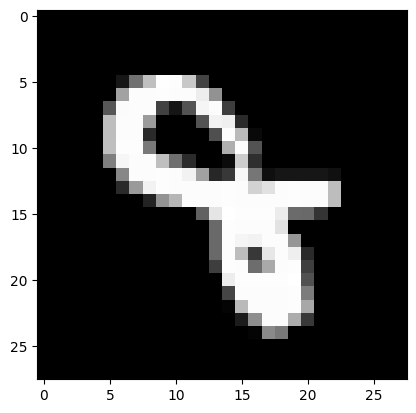

True
test id: 707
individual experts pred: {4: 4, 9: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


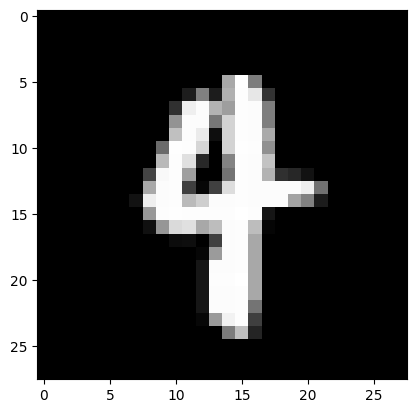

True
test id: 717
individual experts pred: {0: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 0


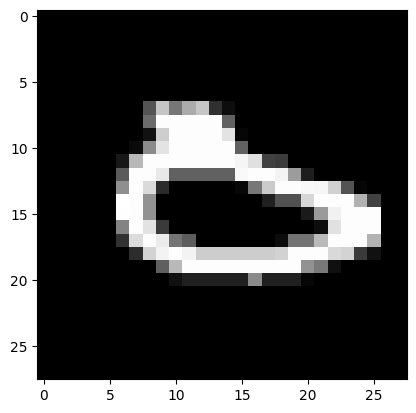

False
test id: 720
individual experts pred: {5: 1, 8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


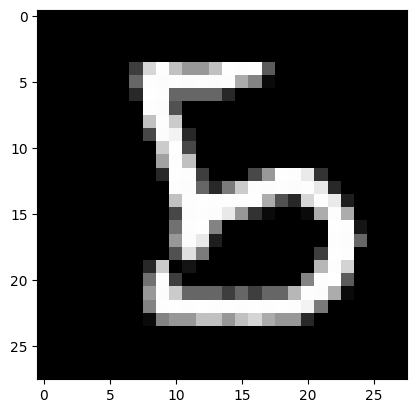

True
test id: 723
individual experts pred: {0: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 0


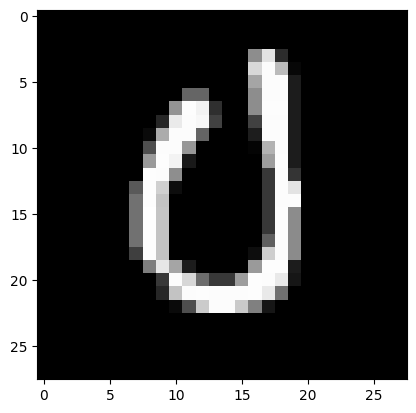

False
test id: 726
individual experts pred: {7: 4, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


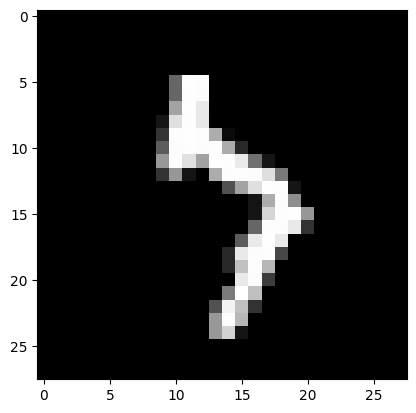

True
test id: 844
individual experts pred: {8: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


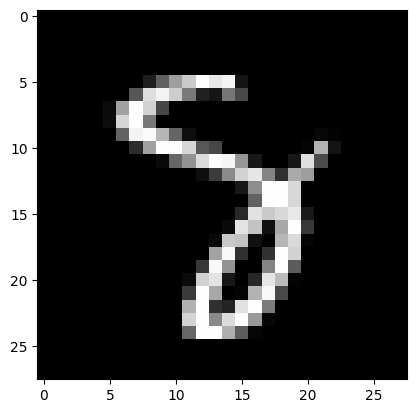

True
test id: 866
individual experts pred: {5: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


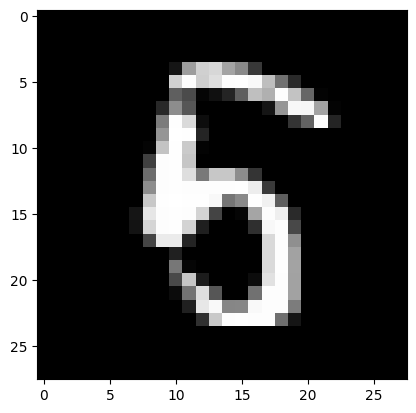

True
test id: 877
individual experts pred: {6: 1, 8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


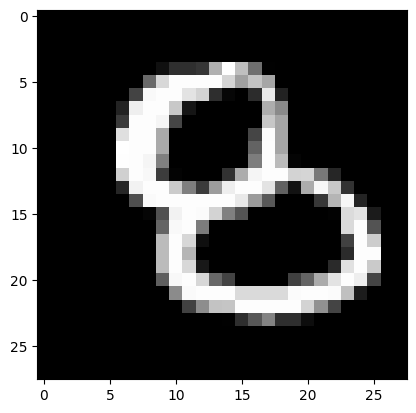

True
test id: 882
individual experts pred: {7: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


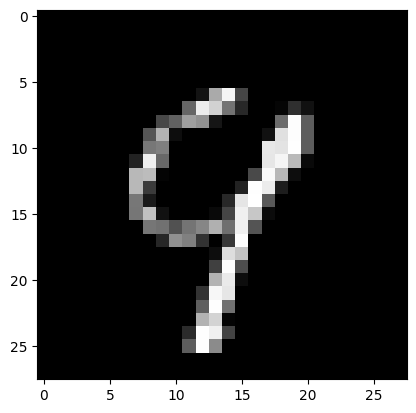

True
test id: 883
individual experts pred: {3: 3, 5: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


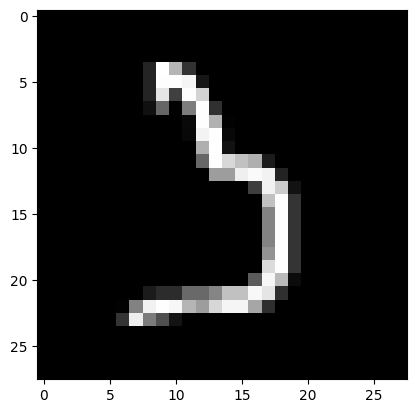

True
test id: 900
individual experts pred: {1: 4, 3: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 1


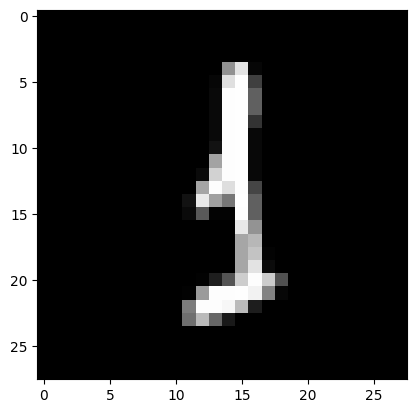

True
test id: 924
individual experts pred: {2: 4, 7: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


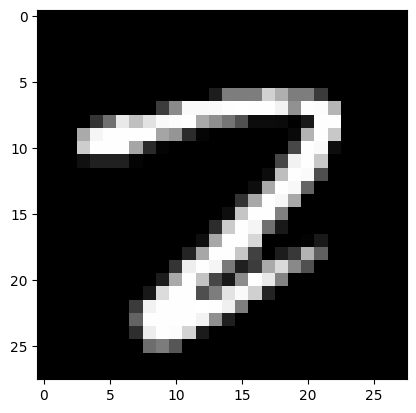

True
test id: 926
individual experts pred: {2: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


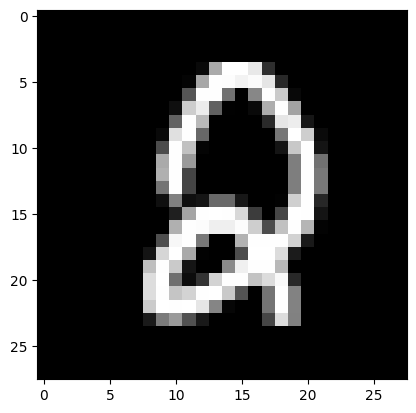

True
test id: 938
individual experts pred: {3: 4, 5: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


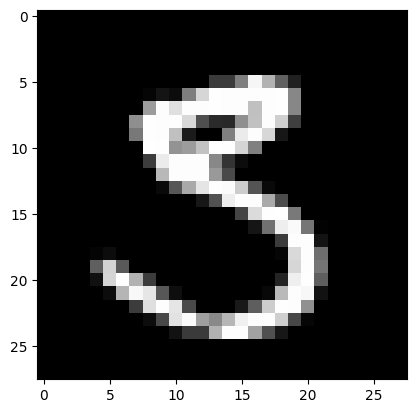

True
test id: 944
individual experts pred: {3: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


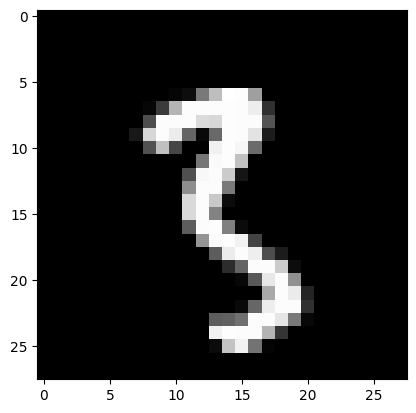

True
test id: 947
individual experts pred: {8: 3, 9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


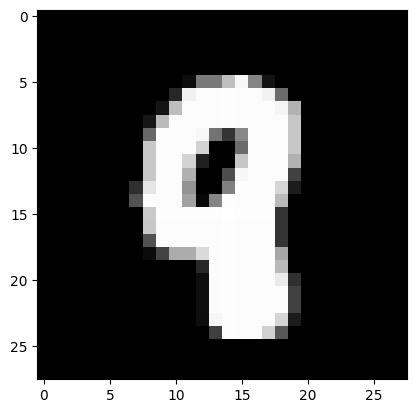

True
test id: 951
individual experts pred: {4: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


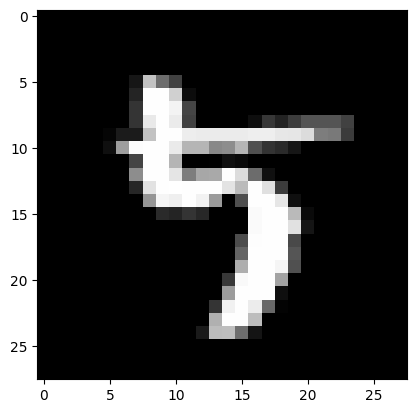

True
test id: 956
individual experts pred: {1: 2, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 1


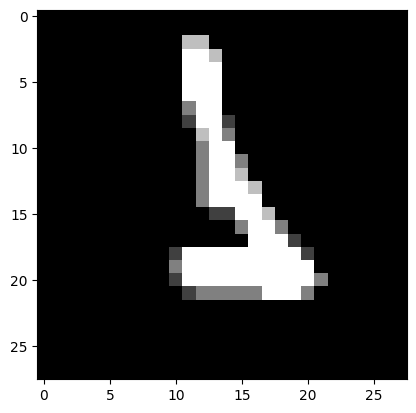

True
test id: 959
individual experts pred: {4: 4, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


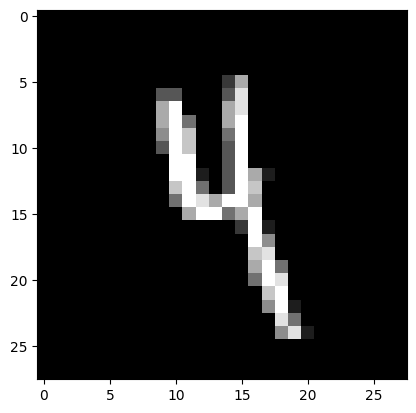

True
test id: 965
individual experts pred: {0: 3, 6: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


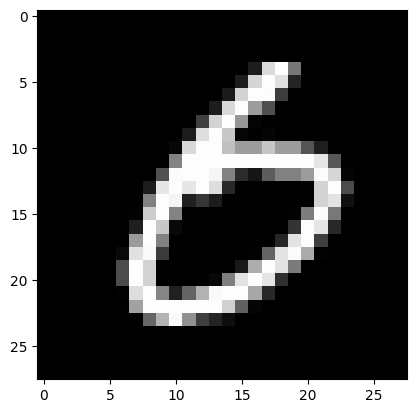

True
test id: 1014
individual experts pred: {5: 5}
PoE predictive: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
true label: 6


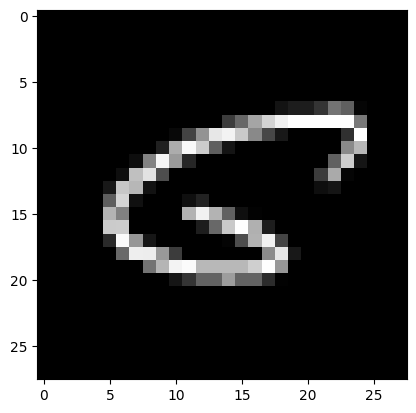

True
test id: 1032
individual experts pred: {5: 3, 8: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


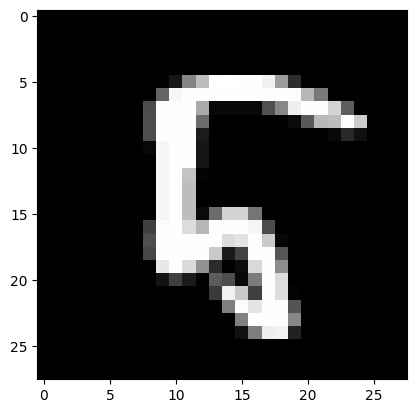

True
test id: 1039
individual experts pred: {7: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


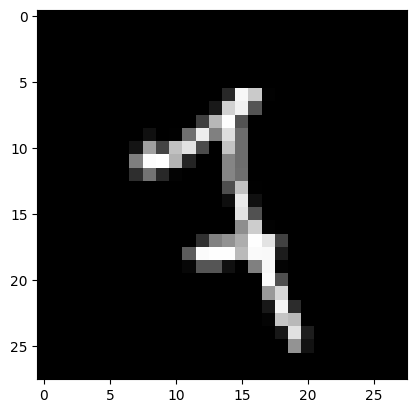

True
test id: 1044
individual experts pred: {8: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


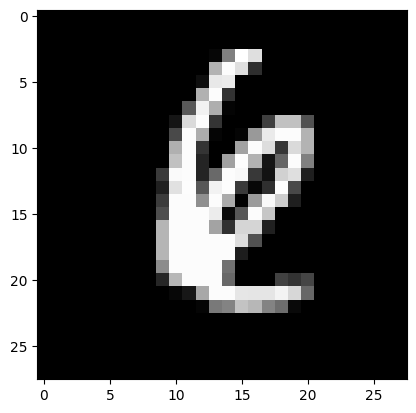

True
test id: 1062
individual experts pred: {3: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


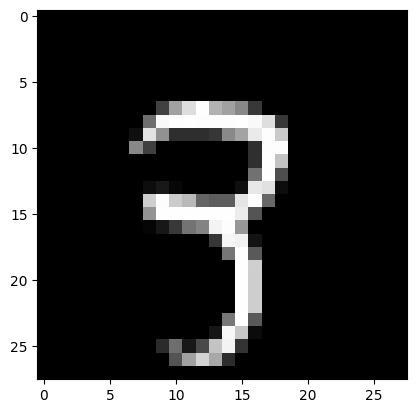

True
test id: 1101
individual experts pred: {8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


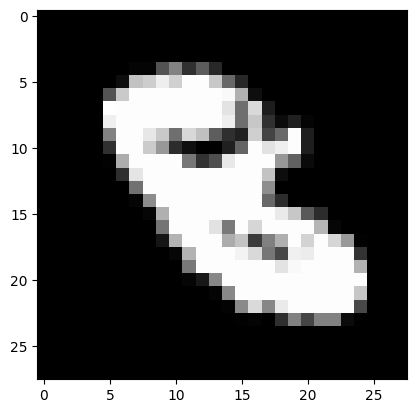

True
test id: 1107
individual experts pred: {3: 1, 9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


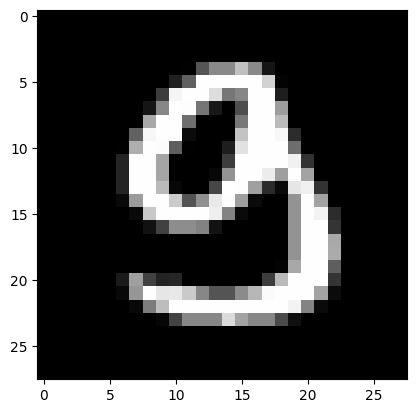

True
test id: 1112
individual experts pred: {6: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
true label: 4


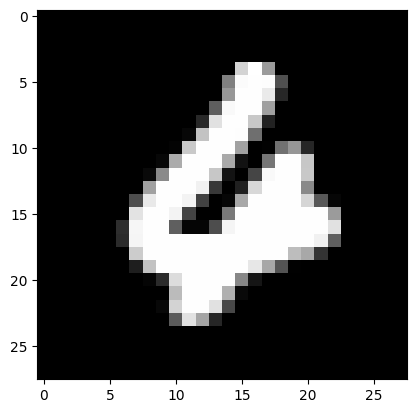

True
test id: 1128
individual experts pred: {3: 2, 7: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


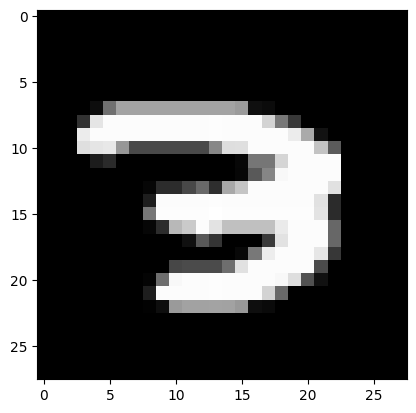

True
test id: 1156
individual experts pred: {7: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


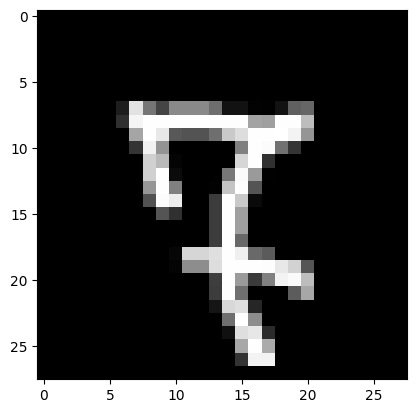

True
test id: 1166
individual experts pred: {3: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


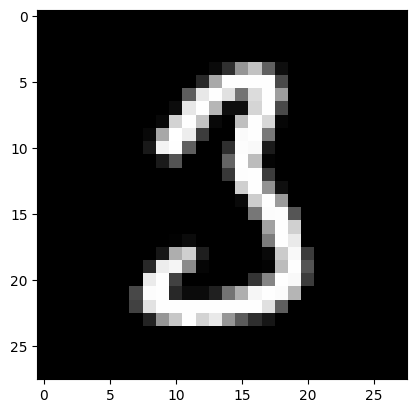

True
test id: 1178
individual experts pred: {4: 4, 6: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


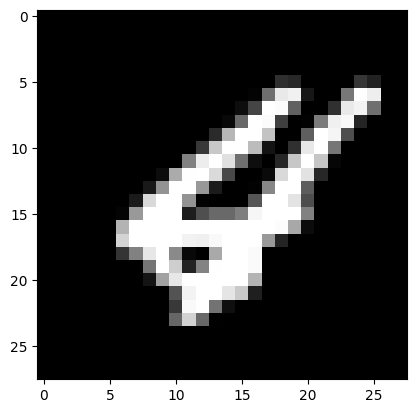

True
test id: 1181
individual experts pred: {1: 3, 6: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


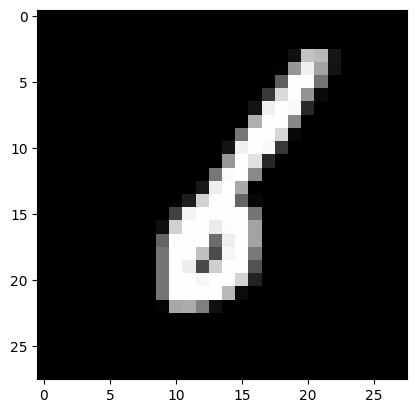

True
test id: 1182
individual experts pred: {6: 3, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


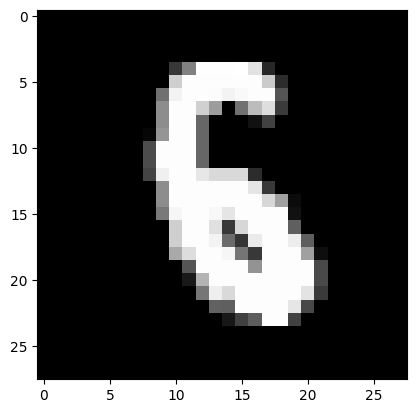

True
test id: 1192
individual experts pred: {4: 4, 9: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


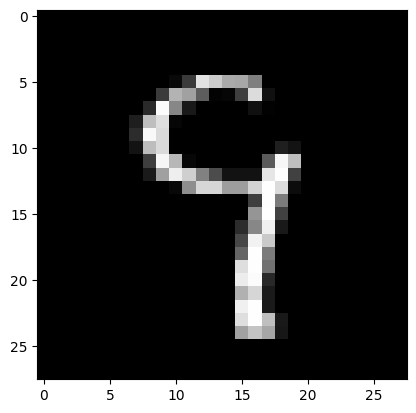

True
test id: 1194
individual experts pred: {7: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


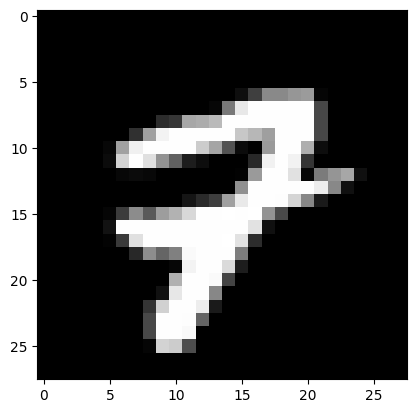

True
test id: 1224
individual experts pred: {2: 3, 4: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


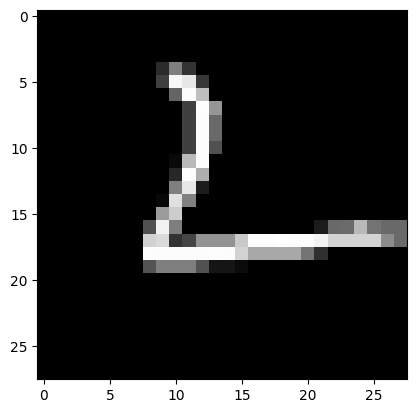

True
test id: 1226
individual experts pred: {2: 5}
PoE predictive: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


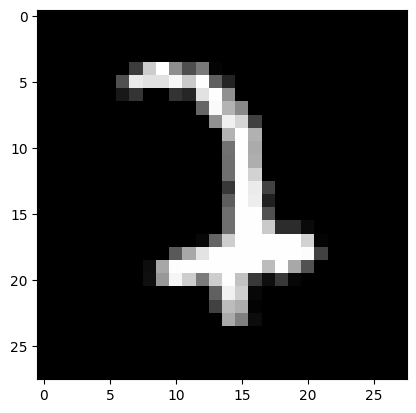

True
test id: 1232
individual experts pred: {4: 5}
PoE predictive: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
true label: 9


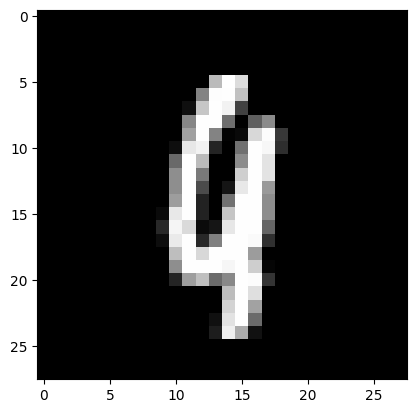

True
test id: 1242
individual experts pred: {9: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
true label: 4


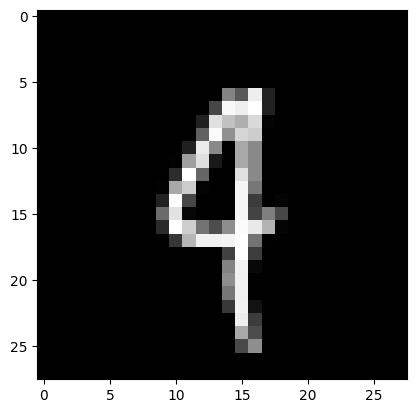

True
test id: 1247
individual experts pred: {}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


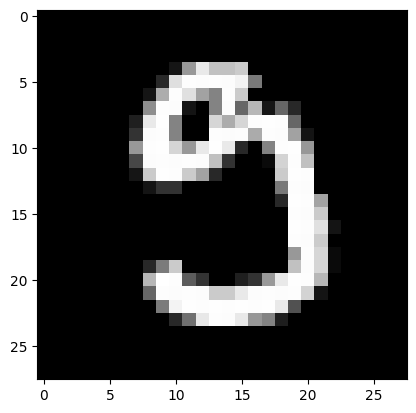

True
test id: 1260
individual experts pred: {1: 4, 7: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


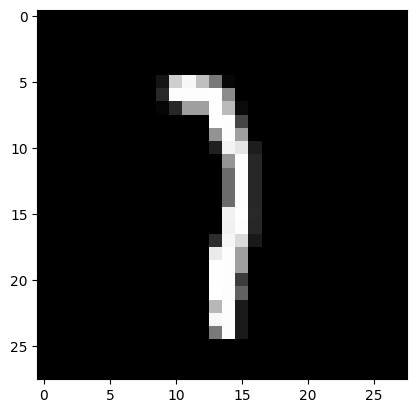

True
test id: 1263
individual experts pred: {4: 3, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


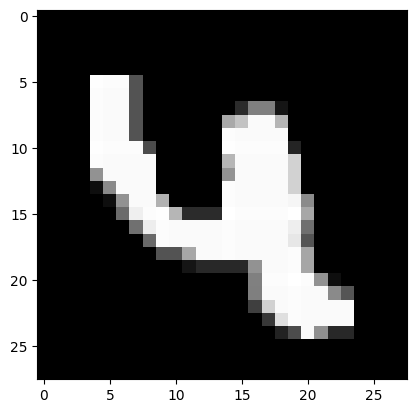

True
test id: 1289
individual experts pred: {5: 3, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


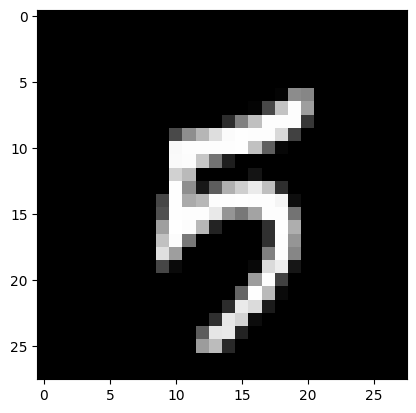

True
test id: 1299
individual experts pred: {5: 3, 7: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


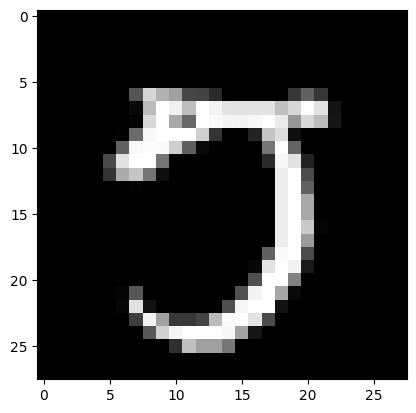

True
test id: 1319
individual experts pred: {0: 1, 3: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


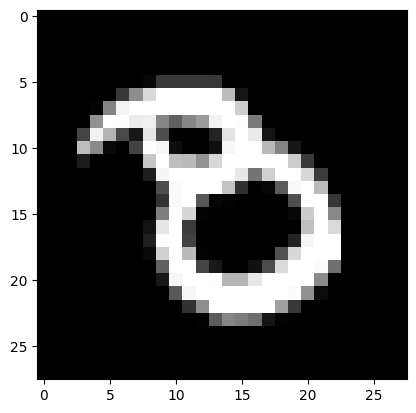

True
test id: 1326
individual experts pred: {7: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


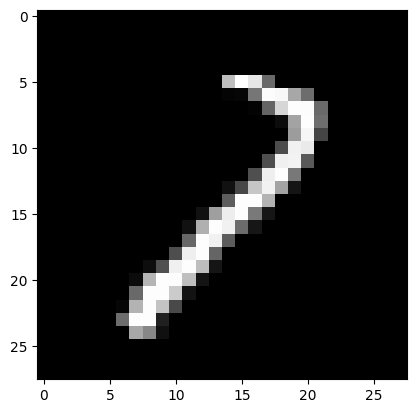

True
test id: 1328
individual experts pred: {8: 2, 9: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


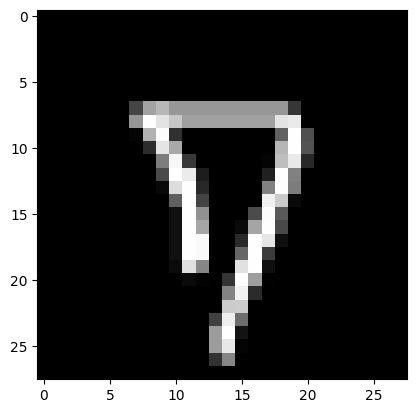

True
test id: 1378
individual experts pred: {5: 2, 6: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


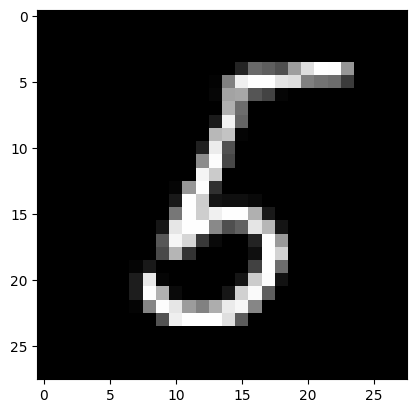

True
test id: 1393
individual experts pred: {3: 3, 5: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


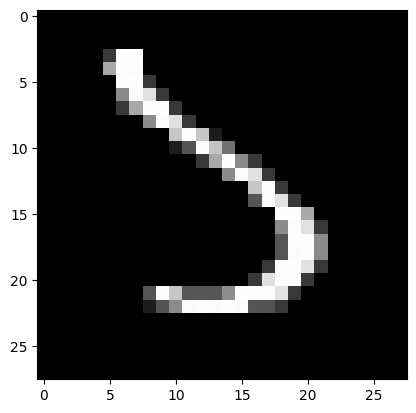

True
test id: 1414
individual experts pred: {9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


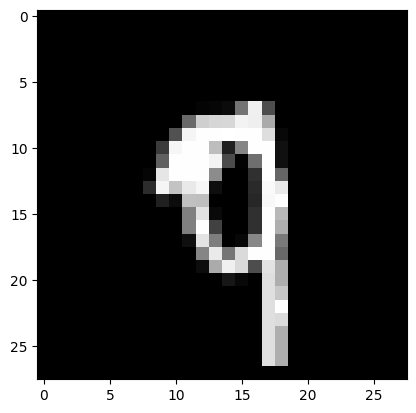

True
test id: 1444
individual experts pred: {6: 4, 7: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


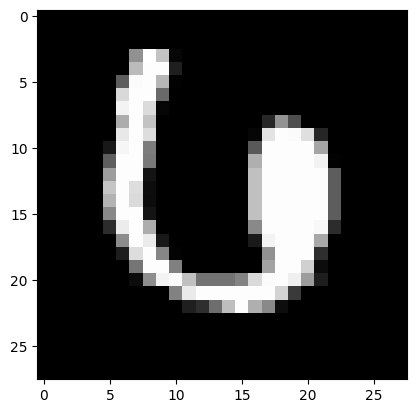

True
test id: 1465
individual experts pred: {4: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


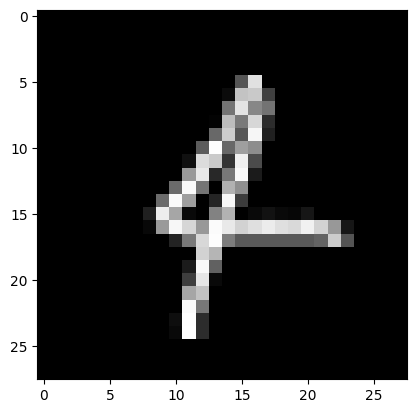

True
test id: 1466
individual experts pred: {3: 2, 5: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


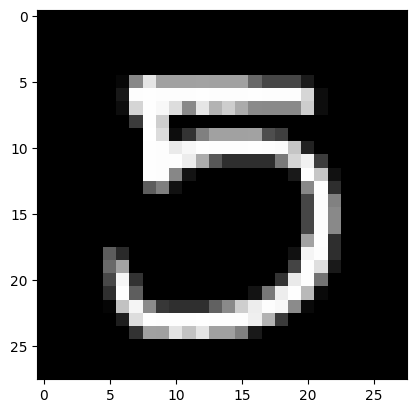

True
test id: 1494
individual experts pred: {7: 1, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


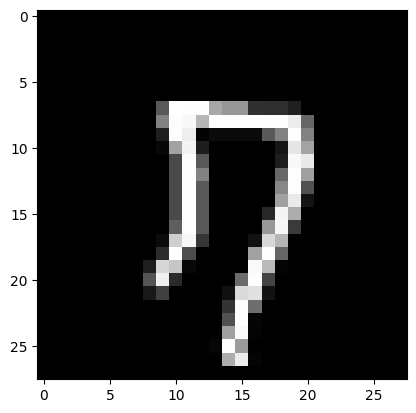

True
test id: 1496
individual experts pred: {7: 4, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


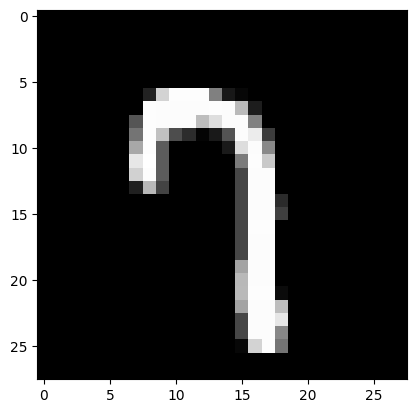

True
test id: 1500
individual experts pred: {1: 1, 3: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


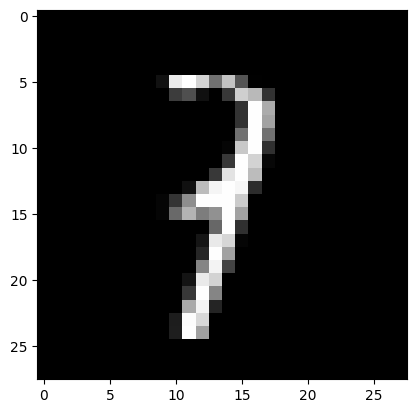

True
test id: 1522
individual experts pred: {7: 1, 9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


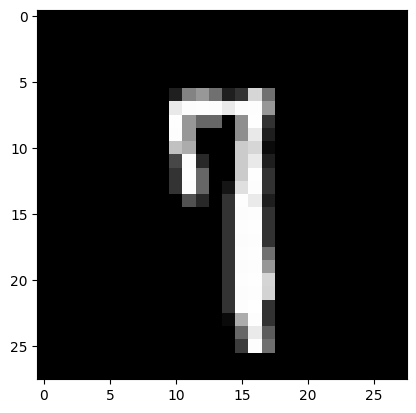

True
test id: 1527
individual experts pred: {1: 4, 5: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 1


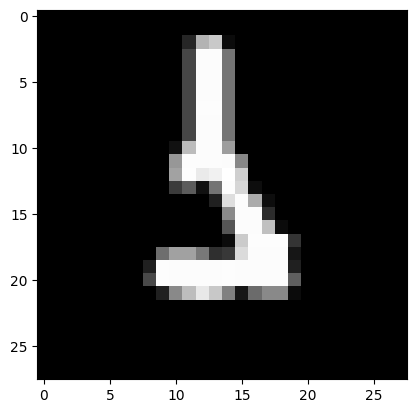

True
test id: 1530
individual experts pred: {7: 5, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
true label: 8


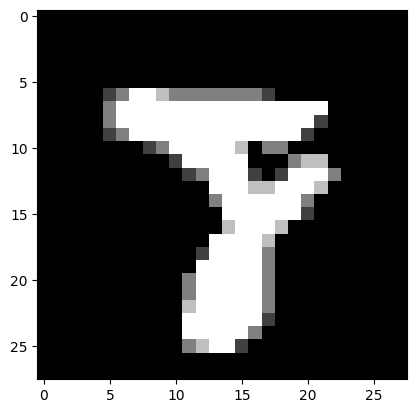

True
test id: 1549
individual experts pred: {2: 1, 6: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
true label: 4


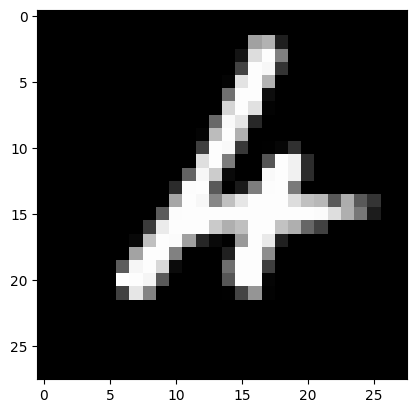

True
test id: 1553
individual experts pred: {3: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


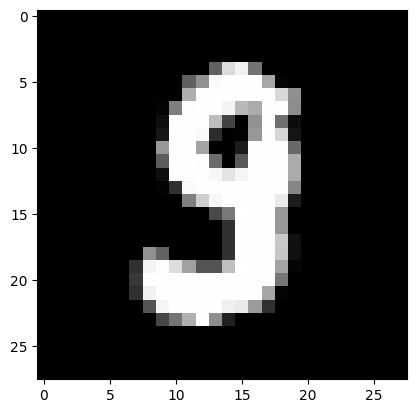

True
test id: 1554
individual experts pred: {8: 3, 9: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


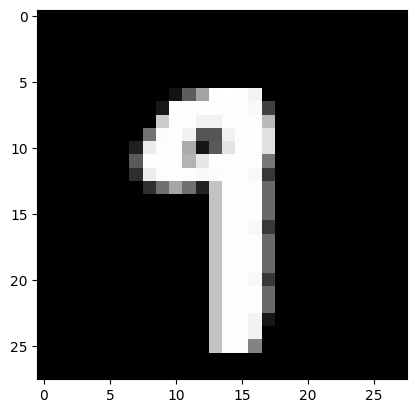

True
test id: 1569
individual experts pred: {6: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


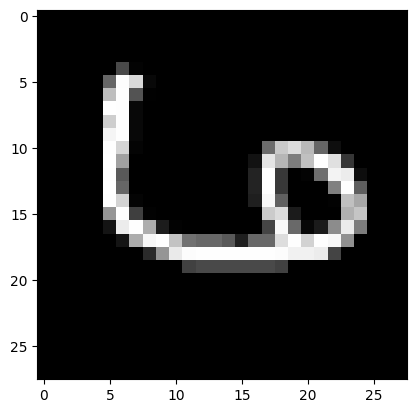

True
test id: 1601
individual experts pred: {3: 4, 7: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


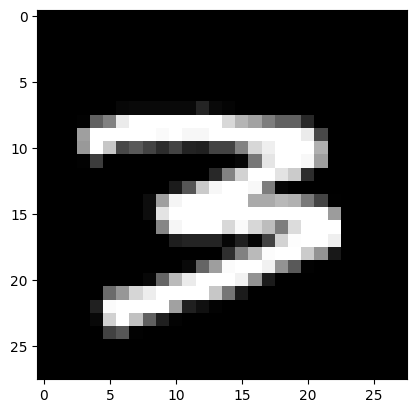

True
test id: 1609
individual experts pred: {3: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


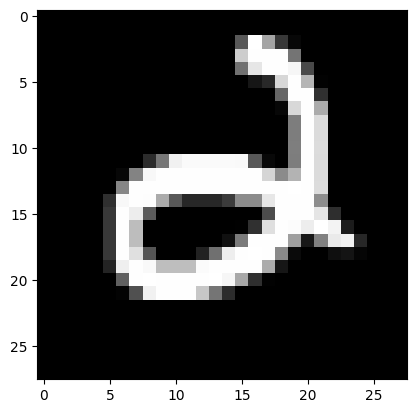

True
test id: 1670
individual experts pred: {3: 1, 5: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


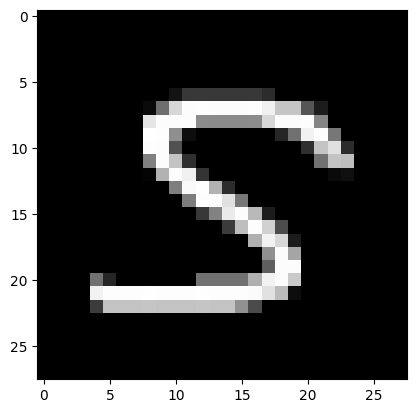

True
test id: 1671
individual experts pred: {3: 3, 7: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


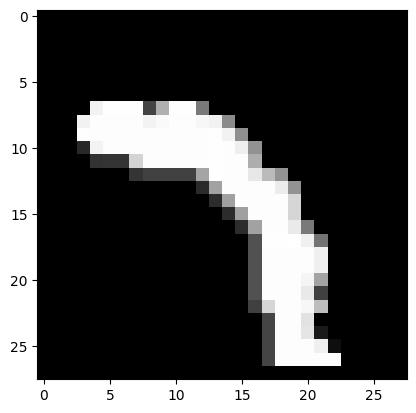

True
test id: 1678
individual experts pred: {2: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


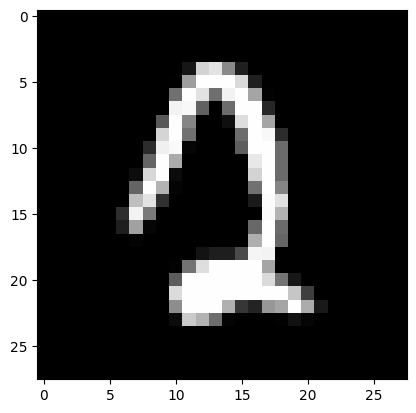

True
test id: 1681
individual experts pred: {3: 2, 7: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
true label: 3


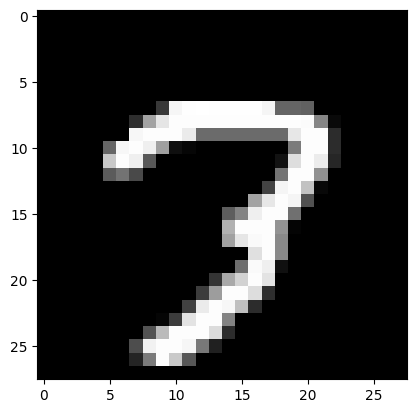

True
test id: 1709
individual experts pred: {9: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


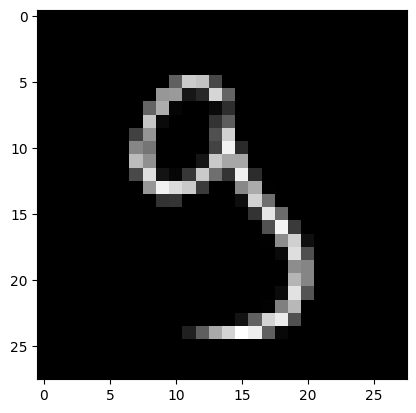

True
test id: 1717
individual experts pred: {0: 3, 8: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


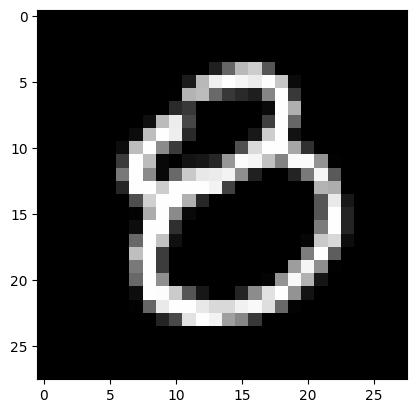

True
test id: 1721
individual experts pred: {7: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


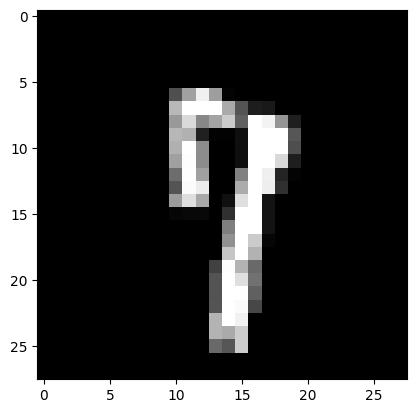

True
test id: 1737
individual experts pred: {5: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


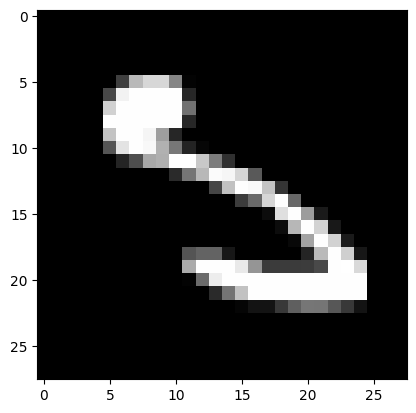

True
test id: 1748
individual experts pred: {0: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 0


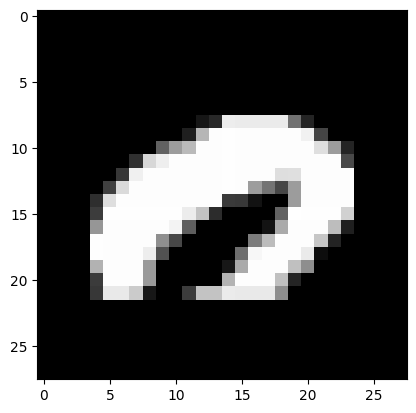

False
test id: 1751
individual experts pred: {2: 1, 4: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


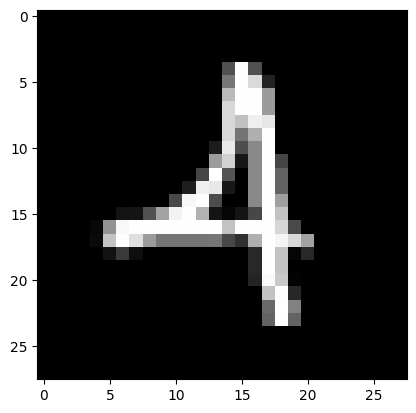

True
test id: 1754
individual experts pred: {2: 2, 7: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


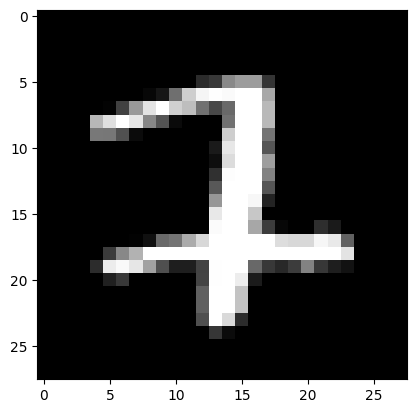

True
test id: 1790
individual experts pred: {2: 1, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


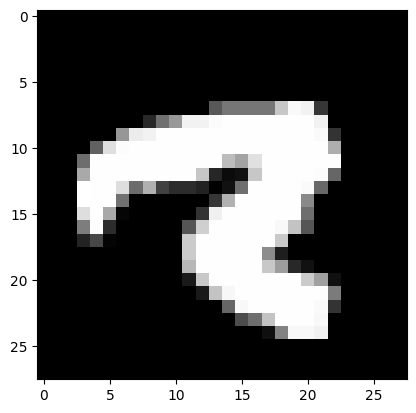

True
test id: 1800
individual experts pred: {2: 1, 4: 2, 6: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


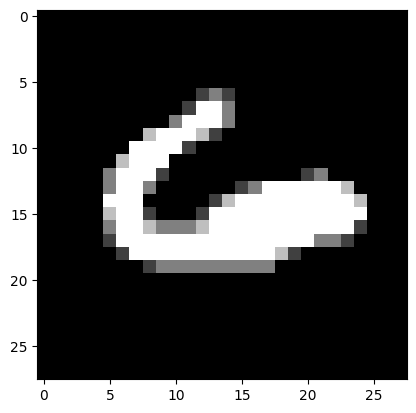

True
test id: 1828
individual experts pred: {3: 4, 7: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


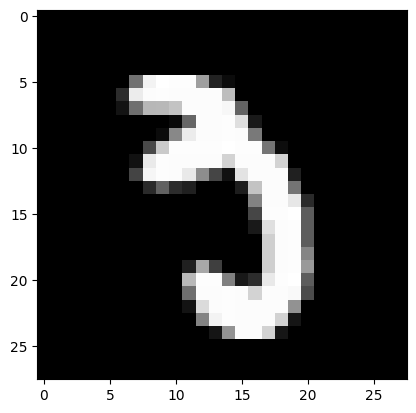

True
test id: 1865
individual experts pred: {4: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


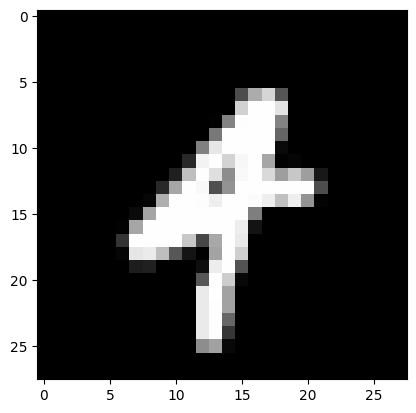

True
test id: 1868
individual experts pred: {1: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 1


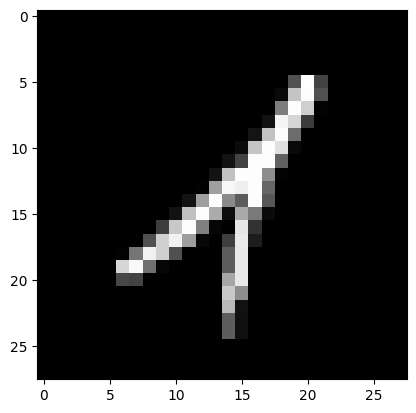

True
test id: 1878
individual experts pred: {3: 1, 8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


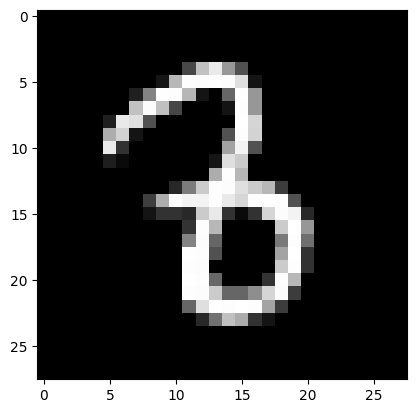

True
test id: 1880
individual experts pred: {0: 1, 6: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


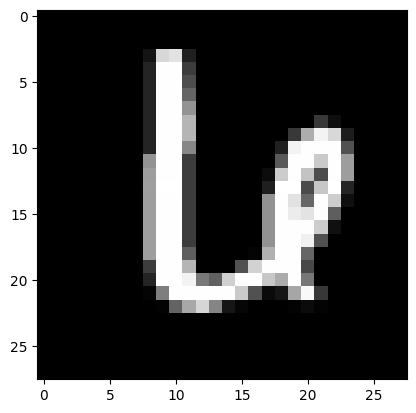

True
test id: 1901
individual experts pred: {4: 5}
PoE predictive: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
true label: 9


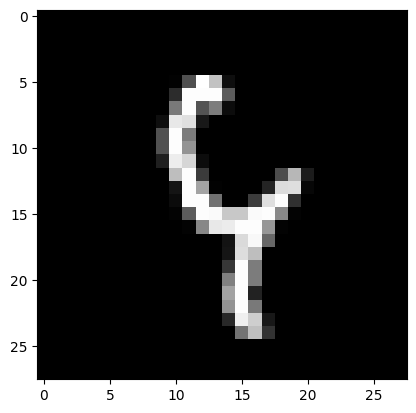

True
test id: 1903
individual experts pred: {2: 1, 7: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


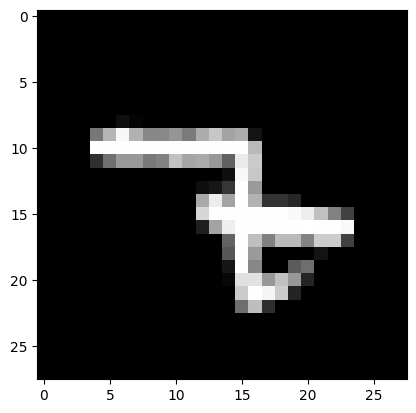

True
test id: 1911
individual experts pred: {5: 2, 6: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


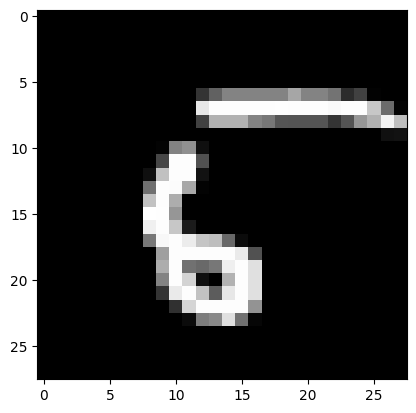

True
test id: 1940
individual experts pred: {0: 1, 5: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


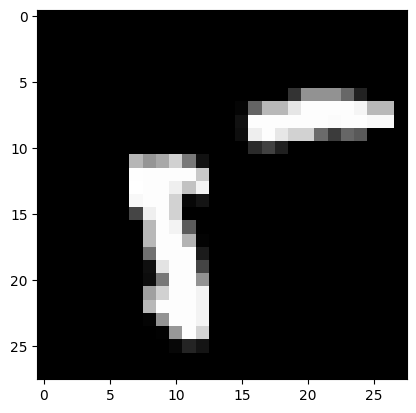

True
test id: 1941
individual experts pred: {}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


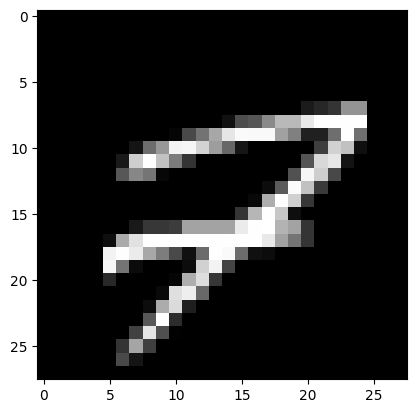

True
test id: 1952
individual experts pred: {3: 1, 9: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


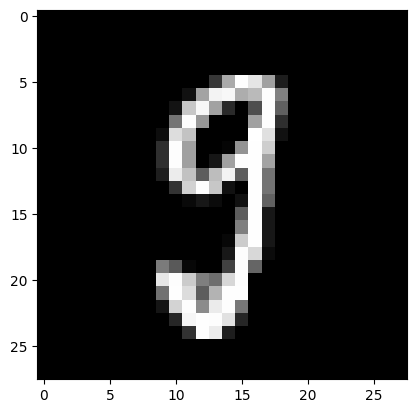

True
test id: 1955
individual experts pred: {8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


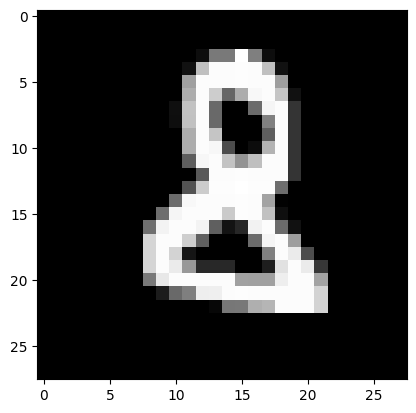

True
test id: 1970
individual experts pred: {5: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


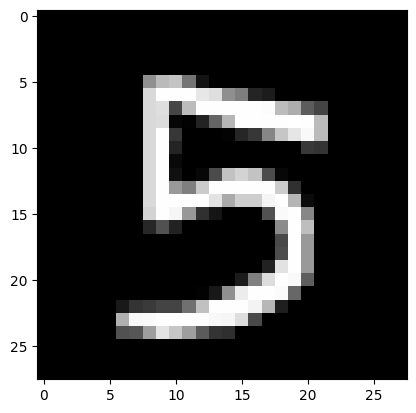

True
test id: 1984
individual experts pred: {0: 2, 2: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


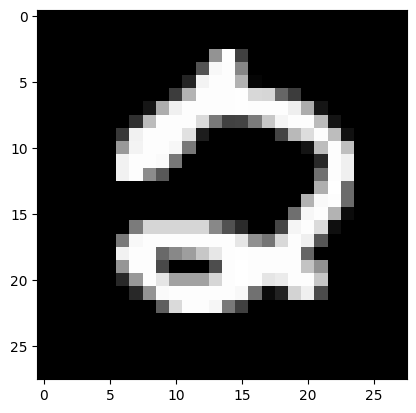

True
test id: 2004
individual experts pred: {3: 1, 8: 2, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


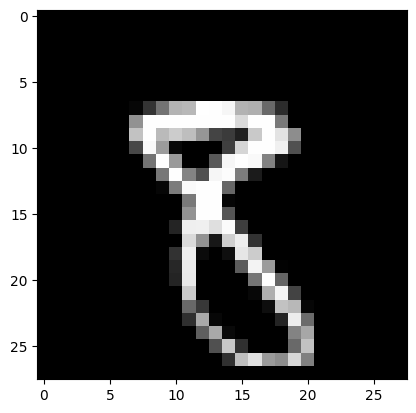

True
test id: 2016
individual experts pred: {2: 4, 7: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


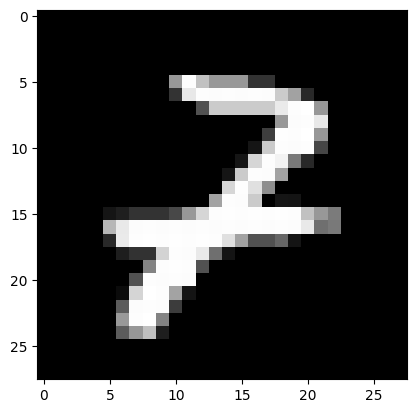

True
test id: 2024
individual experts pred: {7: 3, 9: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


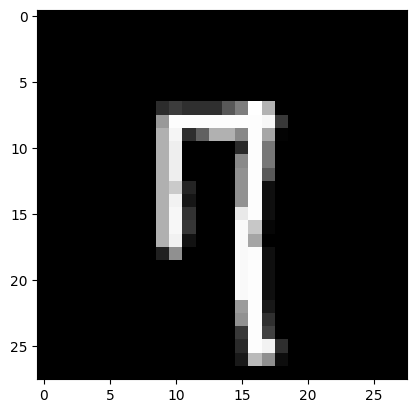

True
test id: 2035
individual experts pred: {3: 5, 5: 1}
PoE predictive: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
true label: 5


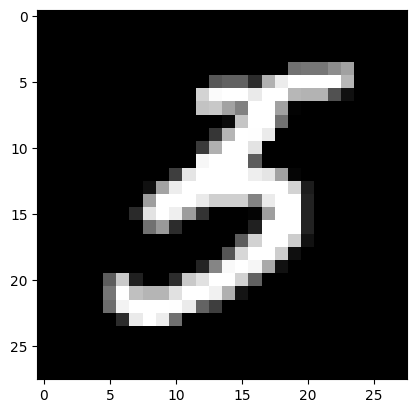

True
test id: 2040
individual experts pred: {4: 1, 5: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


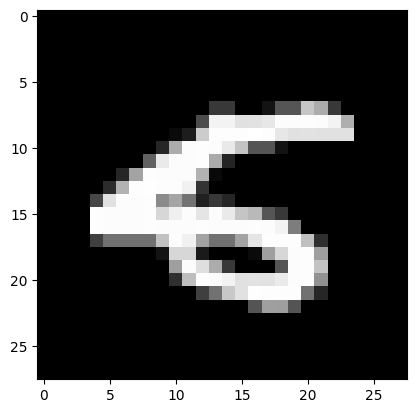

True
test id: 2044
individual experts pred: {7: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


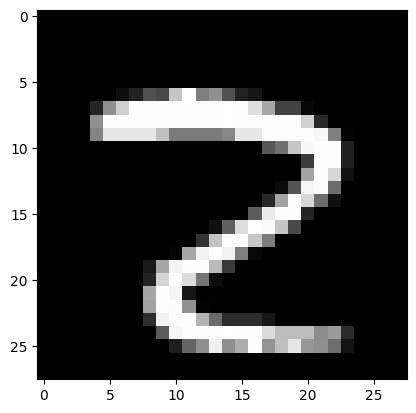

True
test id: 2053
individual experts pred: {4: 2, 9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


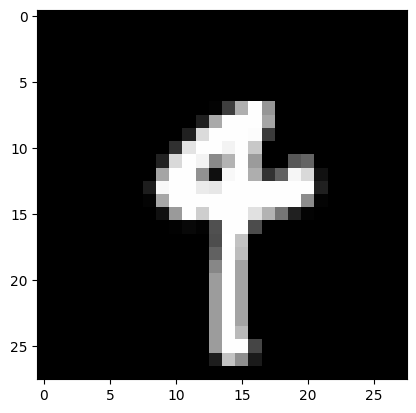

True
test id: 2070
individual experts pred: {9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


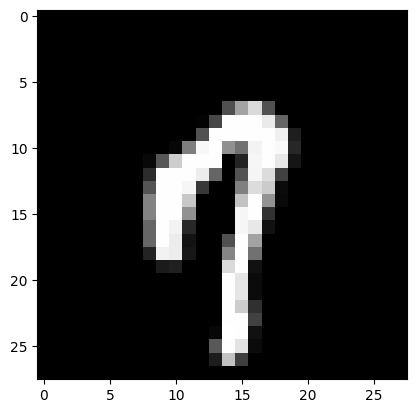

True
test id: 2109
individual experts pred: {2: 1, 7: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


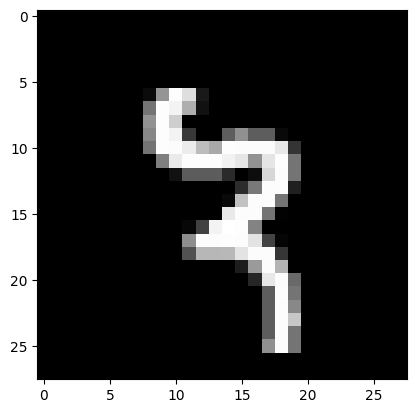

True
test id: 2118
individual experts pred: {0: 2, 4: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


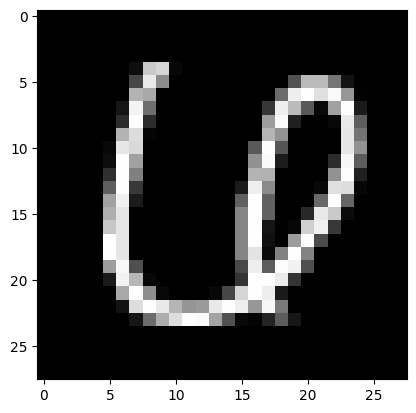

True
test id: 2125
individual experts pred: {5: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


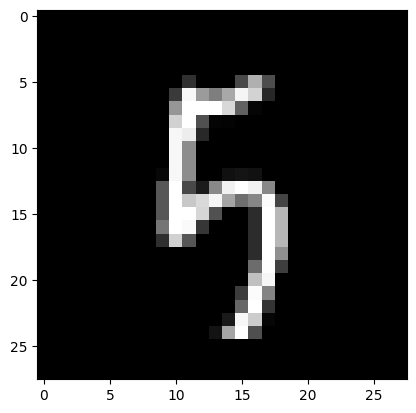

True
test id: 2129
individual experts pred: {2: 1, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


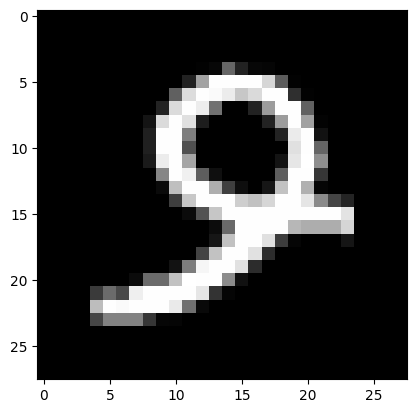

True
test id: 2130
individual experts pred: {9: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
true label: 4


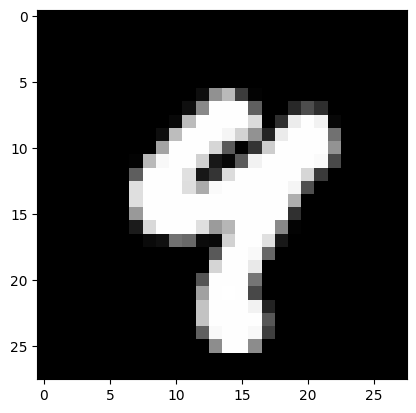

True
test id: 2135
individual experts pred: {1: 5}
PoE predictive: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


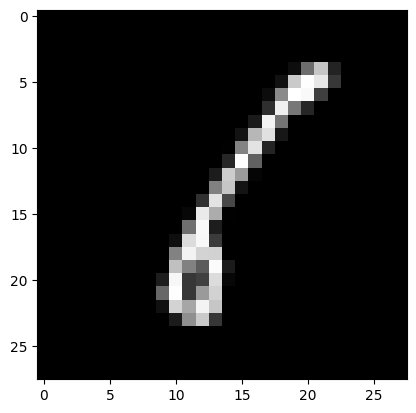

True
test id: 2182
individual experts pred: {}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 1


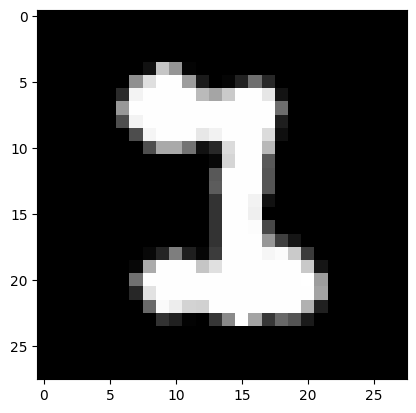

True
test id: 2185
individual experts pred: {0: 4, 5: 1, 8: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 0


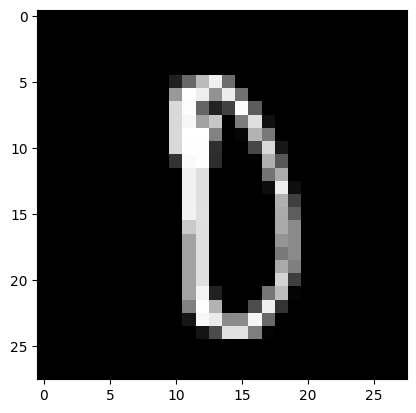

False
test id: 2186
individual experts pred: {2: 4, 3: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


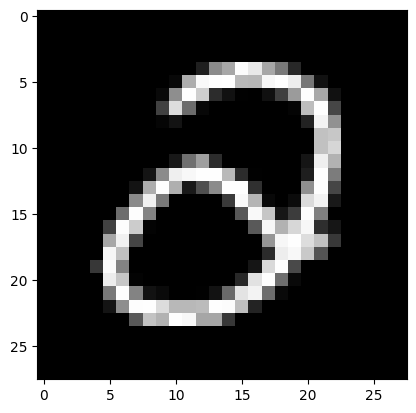

True
test id: 2189
individual experts pred: {1: 1, 9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


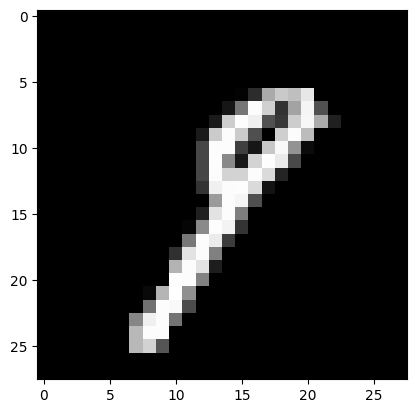

True
test id: 2224
individual experts pred: {5: 1, 6: 1, 8: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


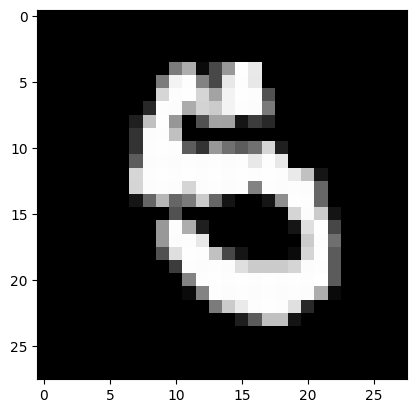

True
test id: 2266
individual experts pred: {1: 3, 3: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 1


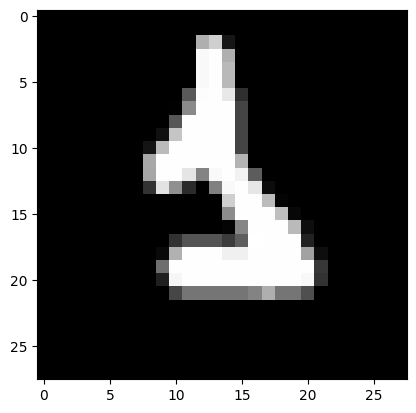

True
test id: 2272
individual experts pred: {0: 3, 8: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


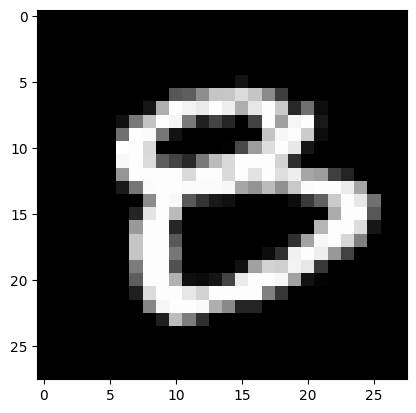

True
test id: 2293
individual experts pred: {0: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


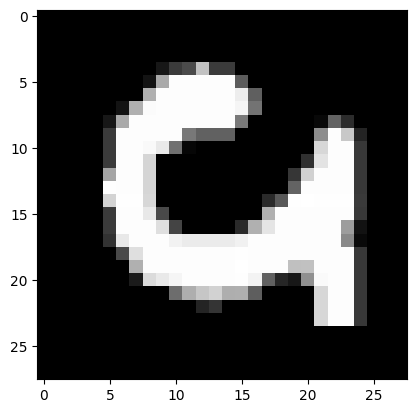

True
test id: 2299
individual experts pred: {2: 4, 8: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


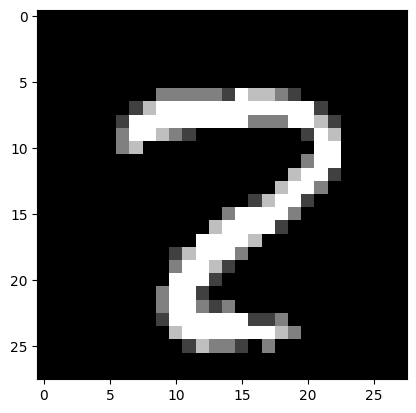

True
test id: 2325
individual experts pred: {3: 1, 7: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


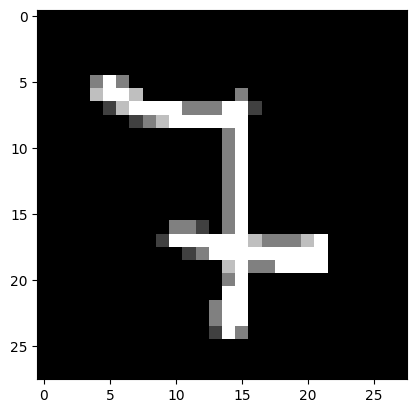

True
test id: 2326
individual experts pred: {0: 4, 5: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 0


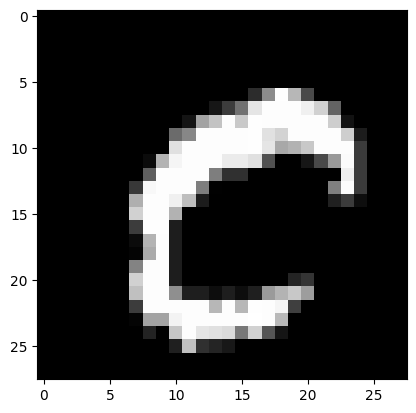

False
test id: 2333
individual experts pred: {0: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 0


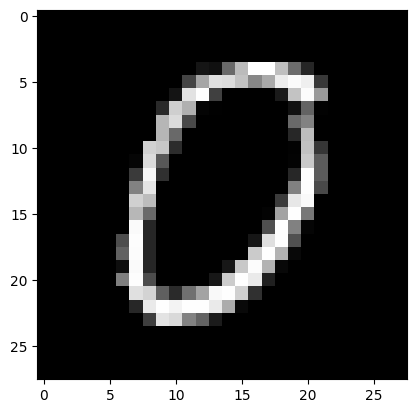

False
test id: 2369
individual experts pred: {5: 1, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


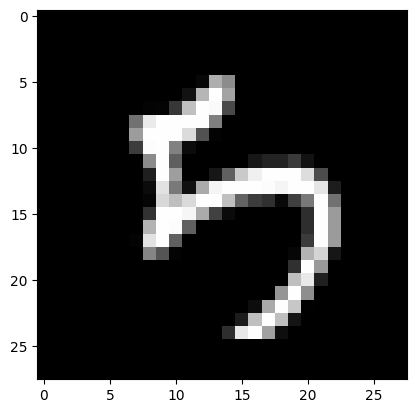

True
test id: 2371
individual experts pred: {4: 4, 9: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


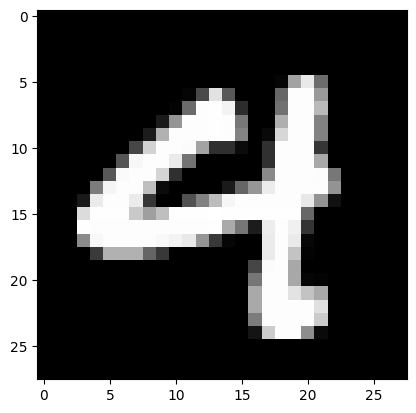

True
test id: 2387
individual experts pred: {1: 5, 9: 2}
PoE predictive: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


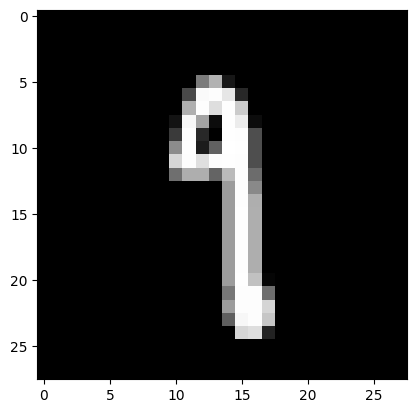

True
test id: 2395
individual experts pred: {8: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


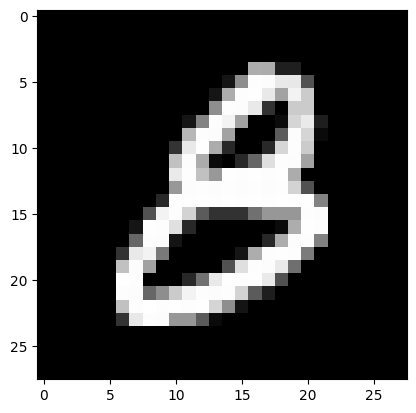

True
test id: 2405
individual experts pred: {3: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


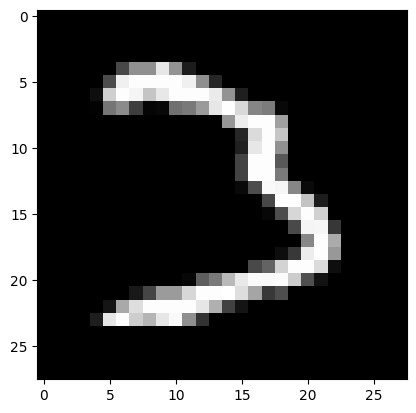

True
test id: 2406
individual experts pred: {8: 4, 9: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


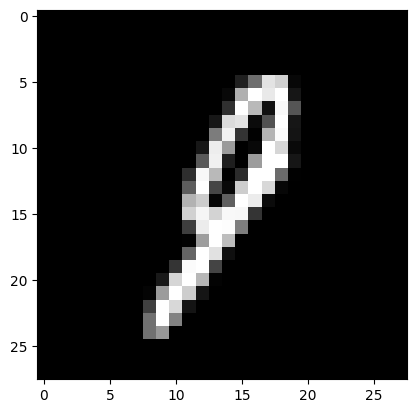

True
test id: 2414
individual experts pred: {4: 2, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


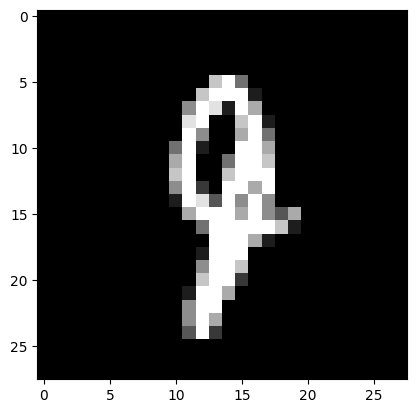

True
test id: 2454
individual experts pred: {5: 1, 6: 3, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


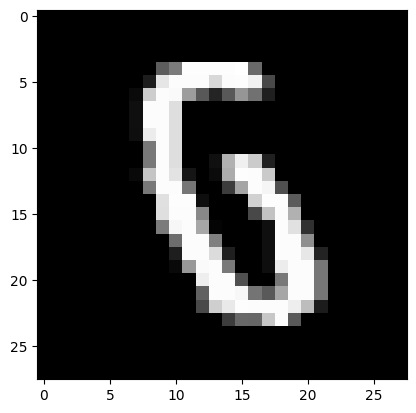

True
test id: 2462
individual experts pred: {0: 1, 2: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


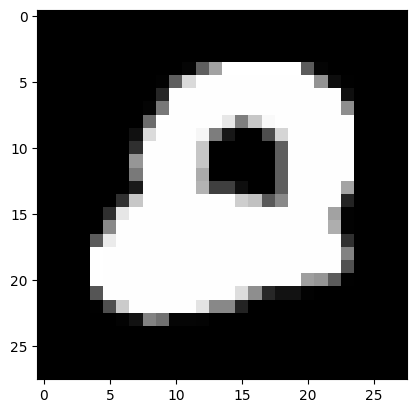

True
test id: 2488
individual experts pred: {4: 5}
PoE predictive: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
true label: 2


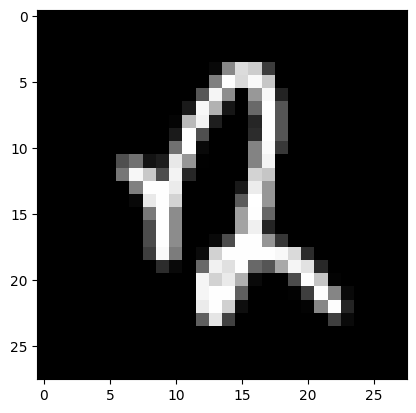

True
test id: 2514
individual experts pred: {4: 3, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


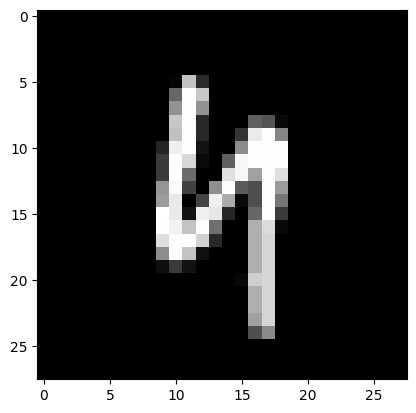

True
test id: 2560
individual experts pred: {3: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


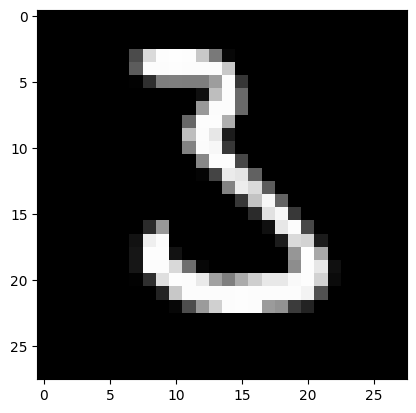

True
test id: 2573
individual experts pred: {5: 2, 8: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


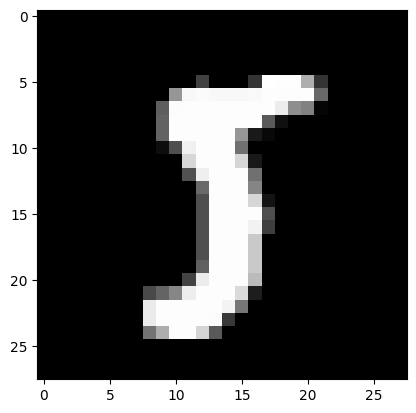

True
test id: 2582
individual experts pred: {9: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


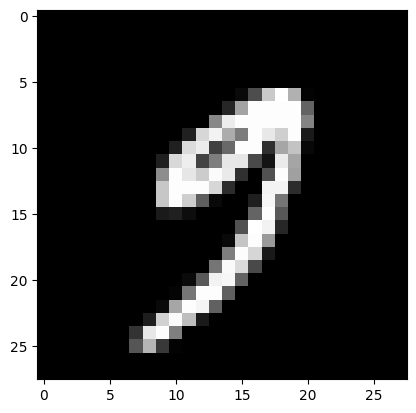

True
test id: 2597
individual experts pred: {3: 4, 5: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


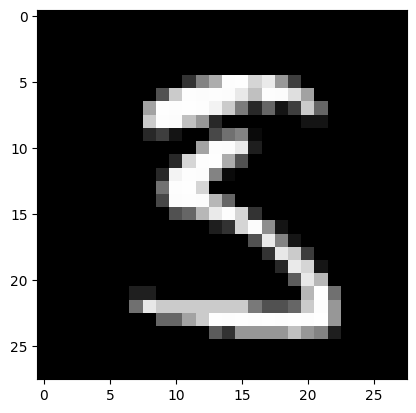

True
test id: 2607
individual experts pred: {7: 1, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


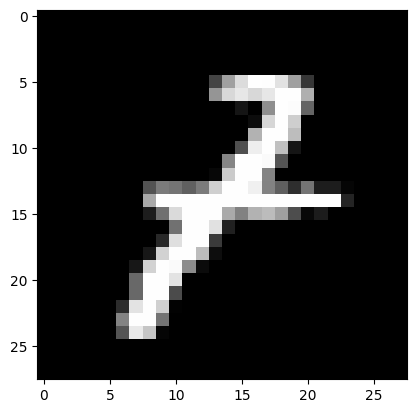

True
test id: 2618
individual experts pred: {3: 4, 5: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


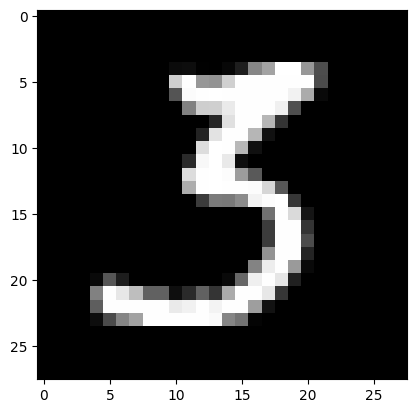

True
test id: 2648
individual experts pred: {0: 5, 5: 2, 9: 1}
PoE predictive: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


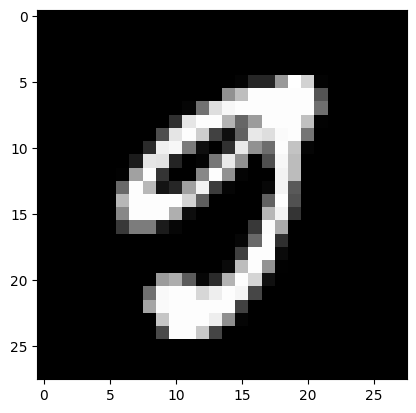

True
test id: 2654
individual experts pred: {1: 5}
PoE predictive: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


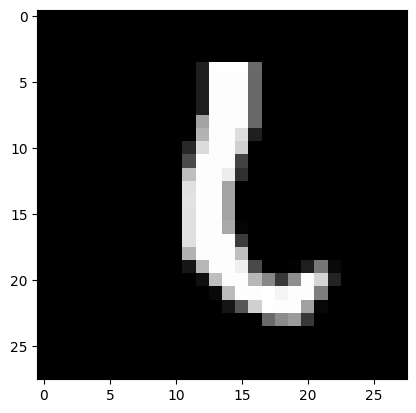

True
test id: 2720
individual experts pred: {4: 3, 9: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


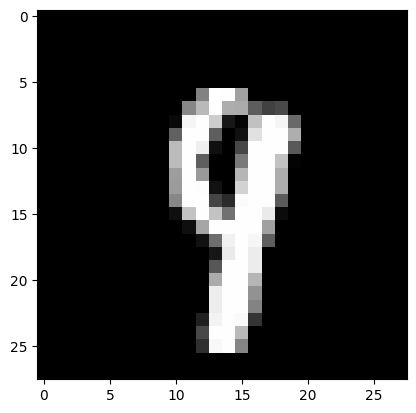

True
test id: 2721
individual experts pred: {5: 2, 6: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


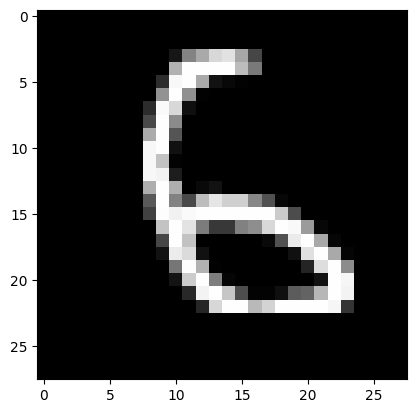

True
test id: 2730
individual experts pred: {4: 3, 7: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


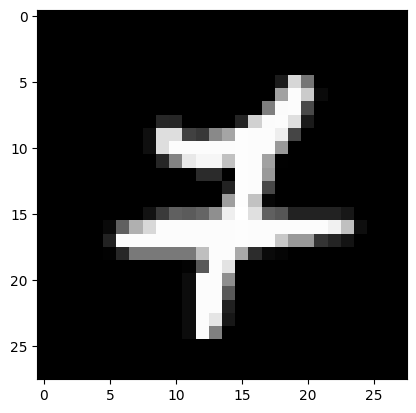

True
test id: 2743
individual experts pred: {5: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


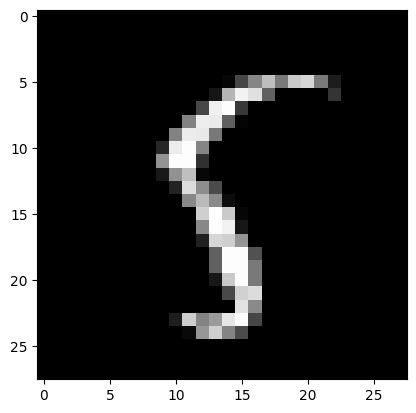

True
test id: 2758
individual experts pred: {8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


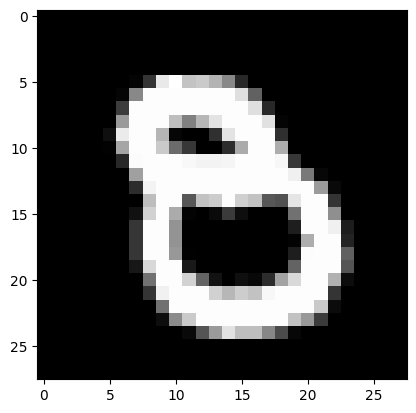

True
test id: 2769
individual experts pred: {7: 1, 9: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


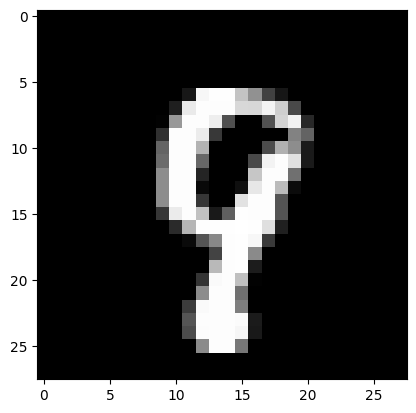

True
test id: 2770
individual experts pred: {3: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


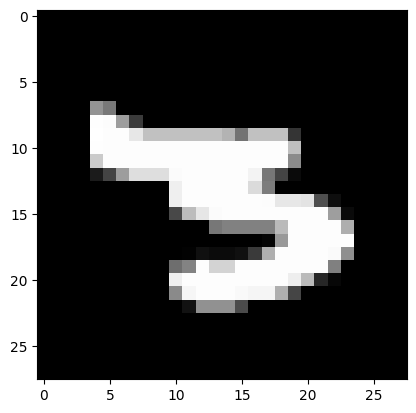

True
test id: 2810
individual experts pred: {3: 5, 5: 3}
PoE predictive: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
true label: 5


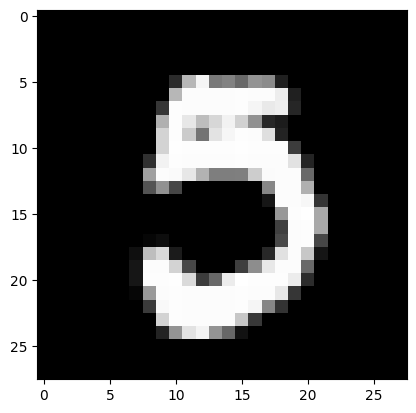

True
test id: 2863
individual experts pred: {4: 4, 9: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


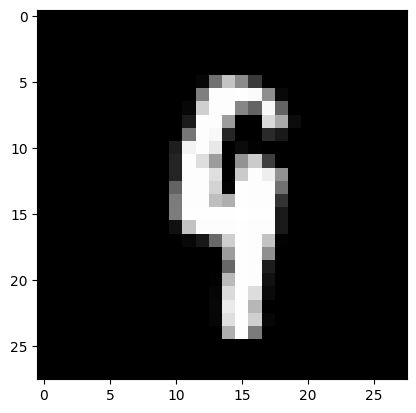

True
test id: 2877
individual experts pred: {4: 1, 7: 1, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


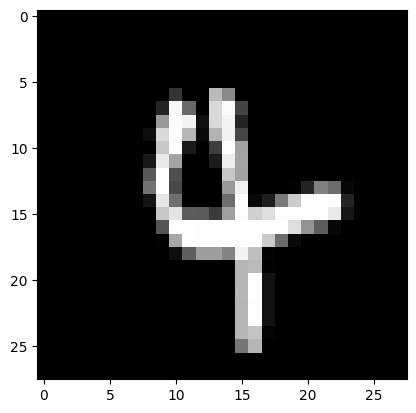

True
test id: 2896
individual experts pred: {0: 4, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


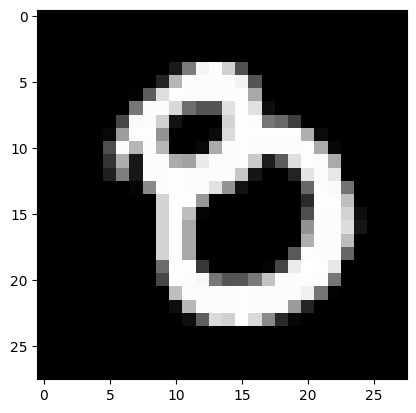

True
test id: 2907
individual experts pred: {4: 4, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


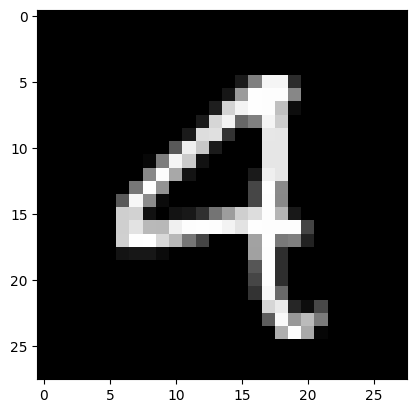

True
test id: 2915
individual experts pred: {3: 1, 7: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


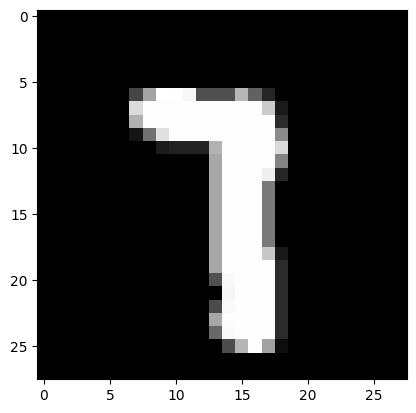

True
test id: 2921
individual experts pred: {2: 2, 3: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


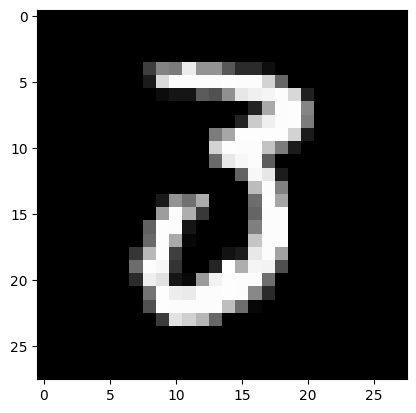

True
test id: 2927
individual experts pred: {2: 4, 3: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


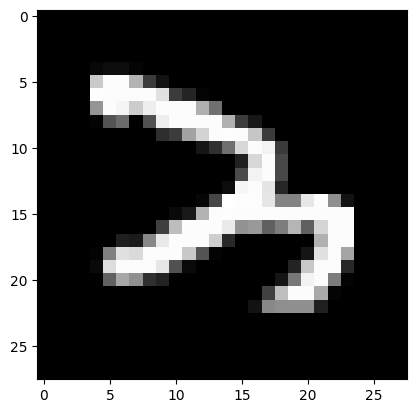

True
test id: 2938
individual experts pred: {4: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


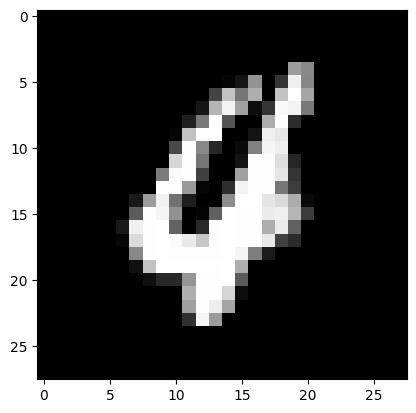

True
test id: 2939
individual experts pred: {5: 2, 7: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
true label: 9


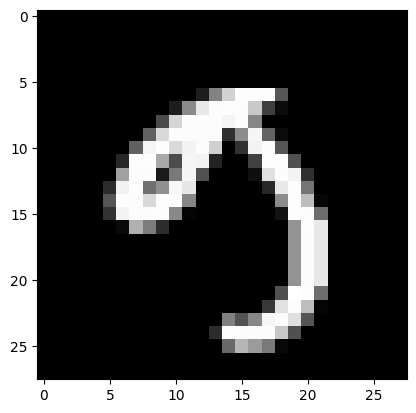

True
test id: 2945
individual experts pred: {3: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


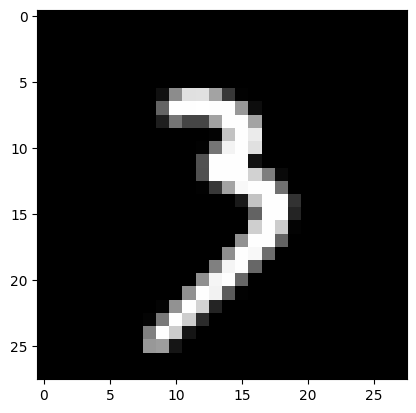

True
test id: 2952
individual experts pred: {3: 3, 5: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


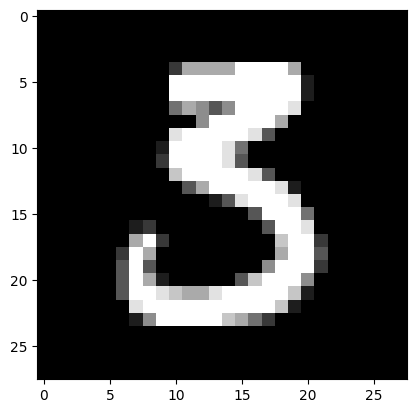

True
test id: 2953
individual experts pred: {5: 5}
PoE predictive: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
true label: 3


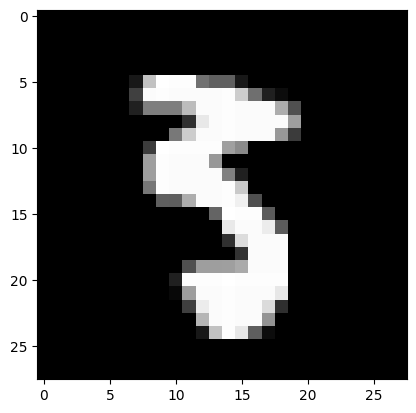

True
test id: 2970
individual experts pred: {5: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


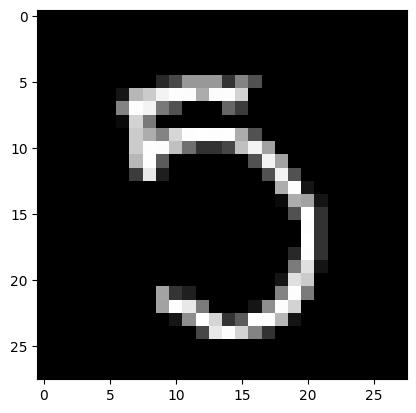

True
test id: 2995
individual experts pred: {6: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


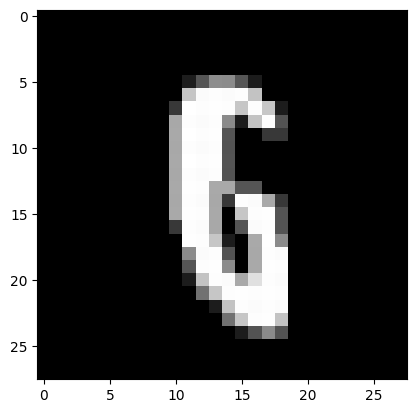

True
test id: 3005
individual experts pred: {1: 1, 9: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


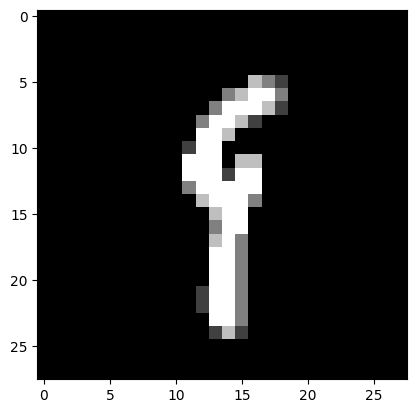

True
test id: 3030
individual experts pred: {8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


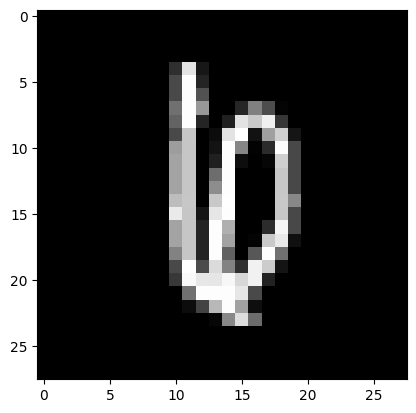

True
test id: 3060
individual experts pred: {9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


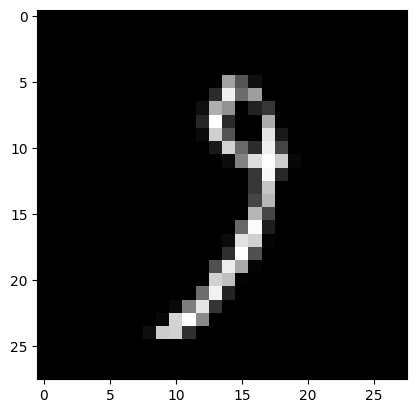

True
test id: 3062
individual experts pred: {8: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


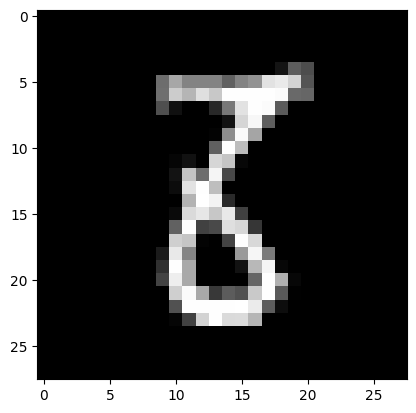

True
test id: 3073
individual experts pred: {1: 1, 2: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 1


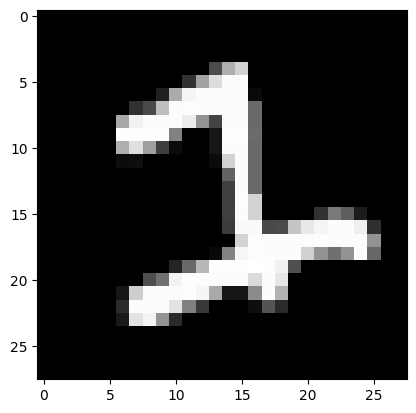

True
test id: 3115
individual experts pred: {5: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


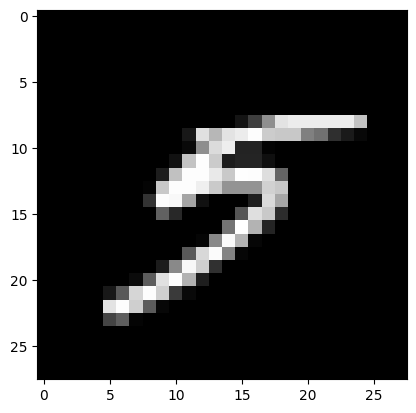

True
test id: 3117
individual experts pred: {9: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


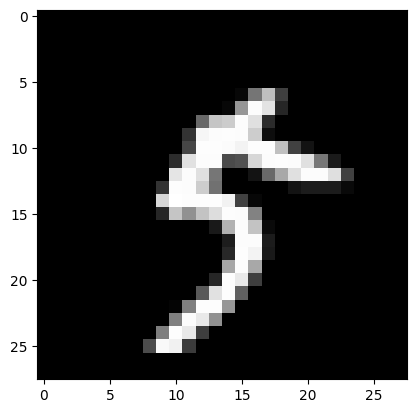

True
test id: 3146
individual experts pred: {3: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


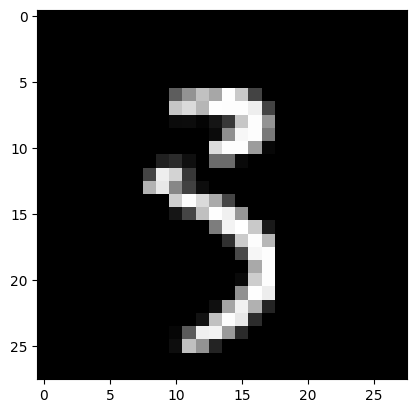

True
test id: 3157
individual experts pred: {5: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


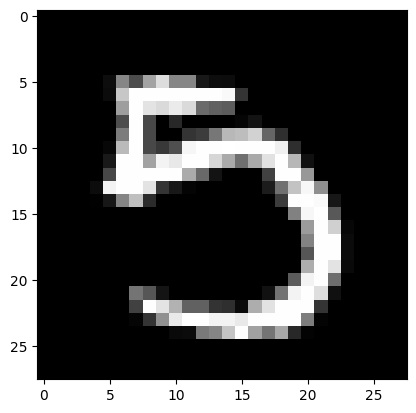

True
test id: 3225
individual experts pred: {7: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


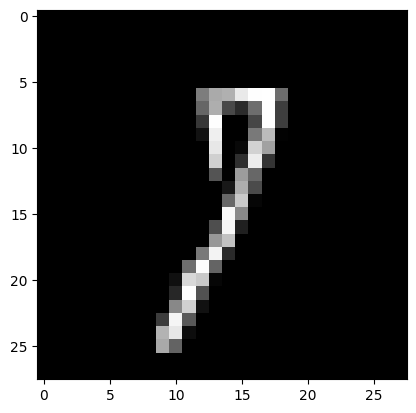

True
test id: 3240
individual experts pred: {8: 3, 9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


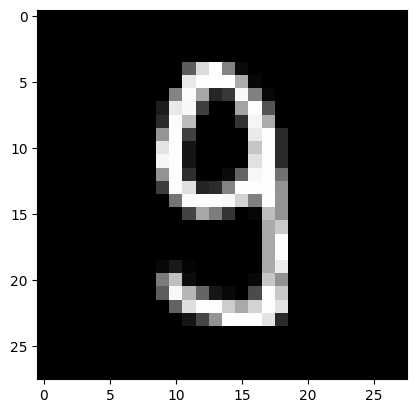

True
test id: 3289
individual experts pred: {8: 3, 9: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


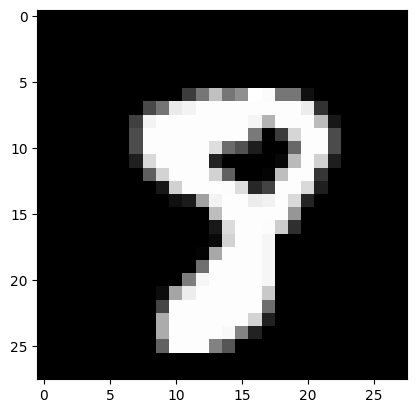

True
test id: 3333
individual experts pred: {7: 3, 9: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
true label: 7


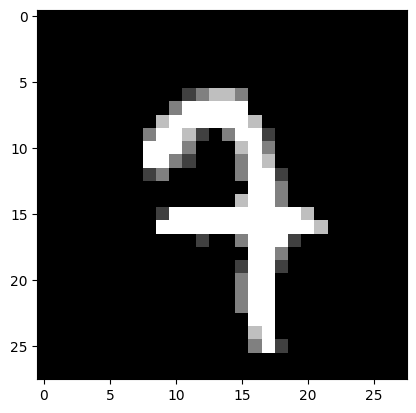

True
test id: 3375
individual experts pred: {2: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


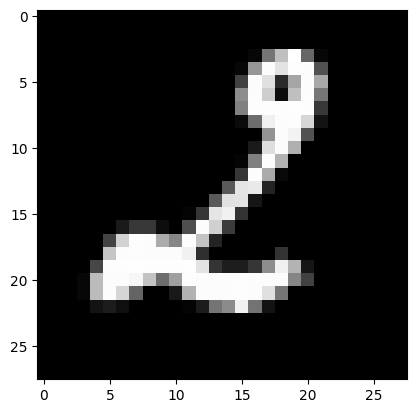

True
test id: 3384
individual experts pred: {2: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


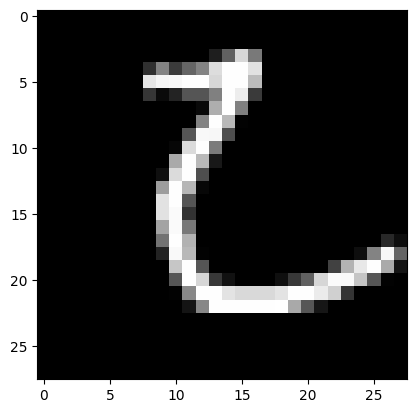

True
test id: 3405
individual experts pred: {4: 2, 9: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
true label: 4


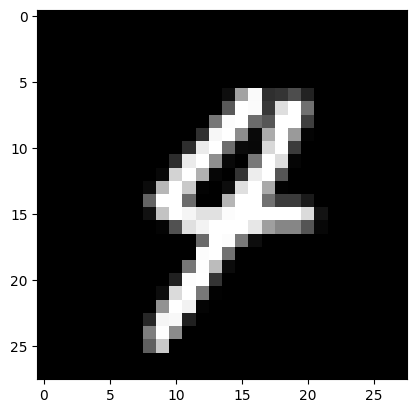

True
test id: 3422
individual experts pred: {0: 4, 6: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


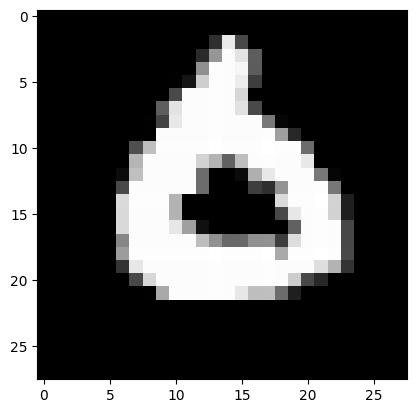

True
test id: 3474
individual experts pred: {2: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


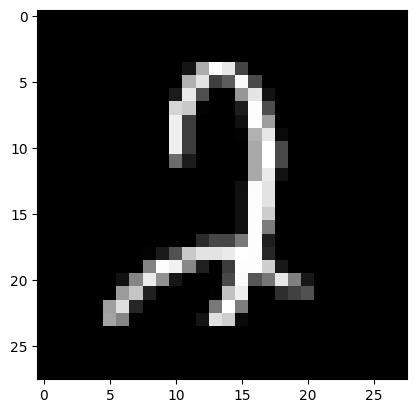

True
test id: 3475
individual experts pred: {3: 4, 7: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


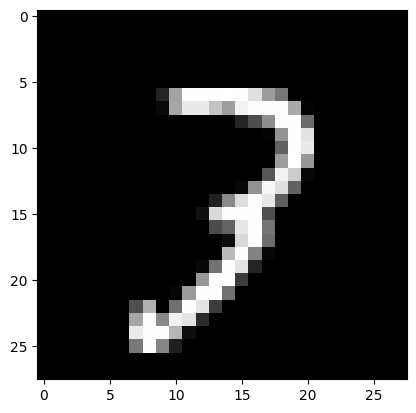

True
test id: 3490
individual experts pred: {4: 3, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


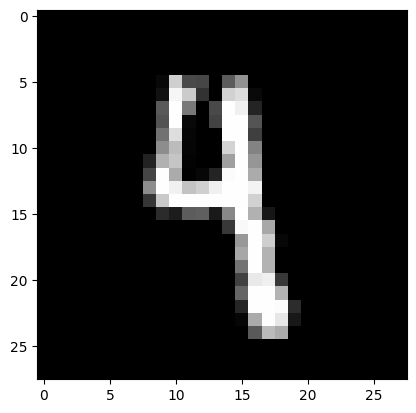

True
test id: 3503
individual experts pred: {1: 5}
PoE predictive: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


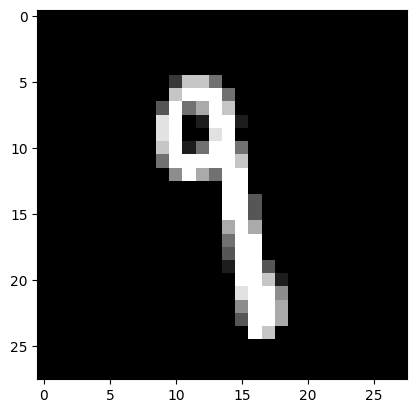

True
test id: 3520
individual experts pred: {4: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


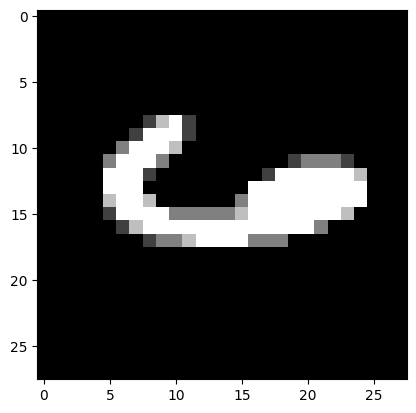

True
test id: 3533
individual experts pred: {4: 4, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


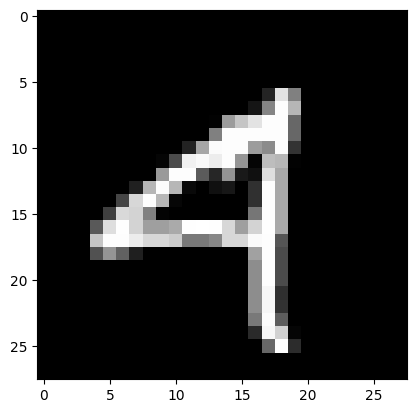

True
test id: 3549
individual experts pred: {}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


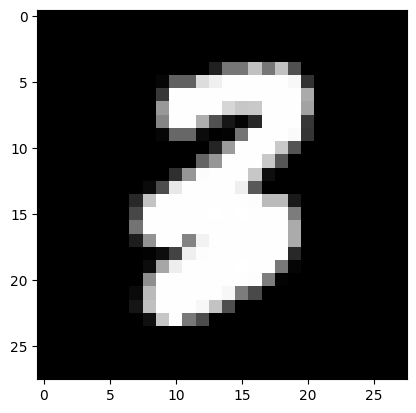

True
test id: 3550
individual experts pred: {5: 1, 6: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


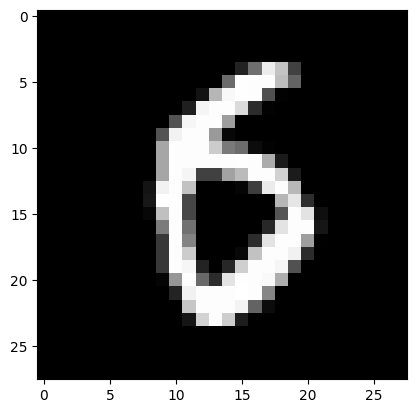

True
test id: 3558
individual experts pred: {0: 5}
PoE predictive: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


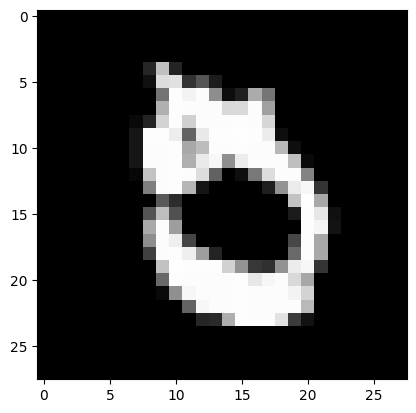

True
test id: 3559
individual experts pred: {5: 5, 8: 2}
PoE predictive: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
true label: 8


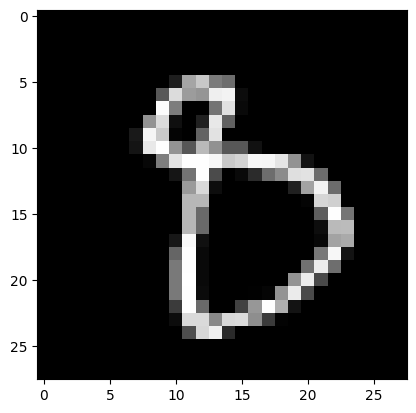

True
test id: 3567
individual experts pred: {5: 4, 8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


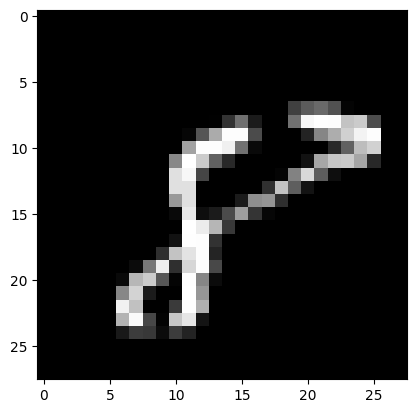

True
test id: 3574
individual experts pred: {0: 4, 7: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 0


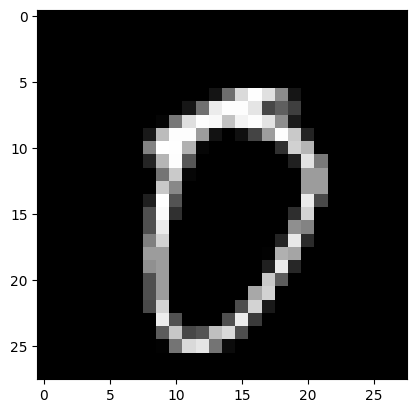

False
test id: 3597
individual experts pred: {3: 5, 9: 2}
PoE predictive: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
true label: 9


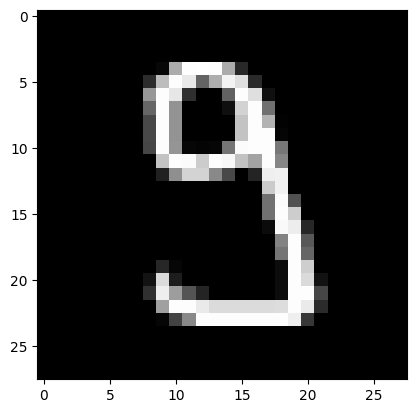

True
test id: 3604
individual experts pred: {0: 1, 7: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


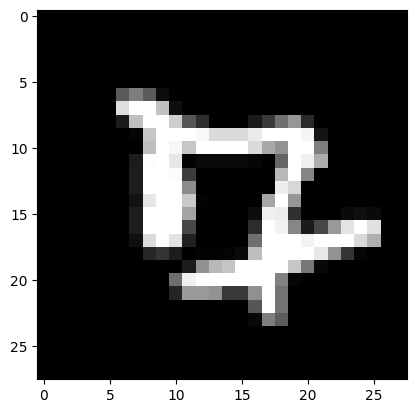

True
test id: 3618
individual experts pred: {8: 1, 9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


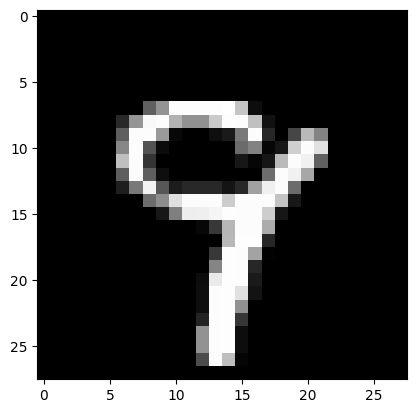

True
test id: 3629
individual experts pred: {3: 1, 8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


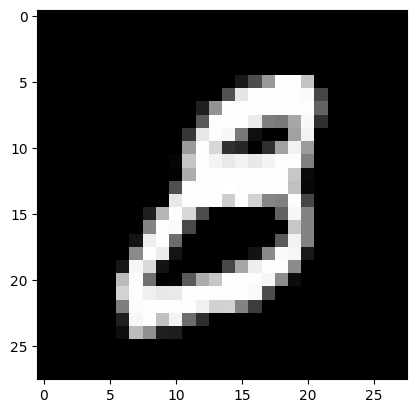

True
test id: 3662
individual experts pred: {8: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


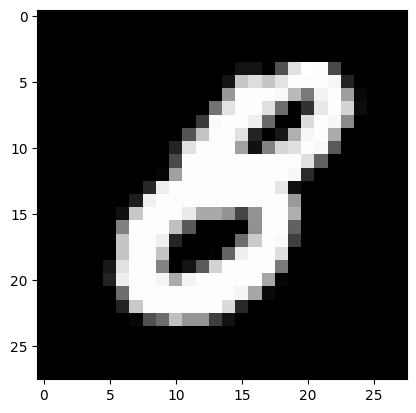

True
test id: 3674
individual experts pred: {8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


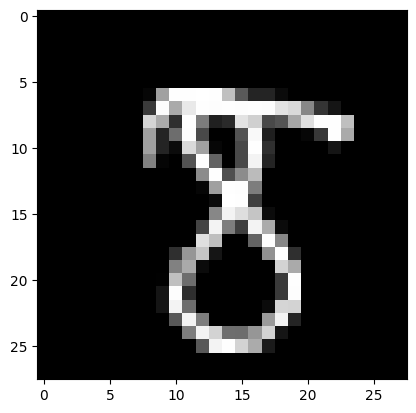

True
test id: 3681
individual experts pred: {2: 3, 3: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


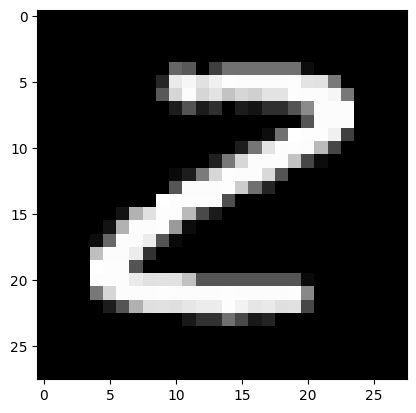

True
test id: 3702
individual experts pred: {5: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


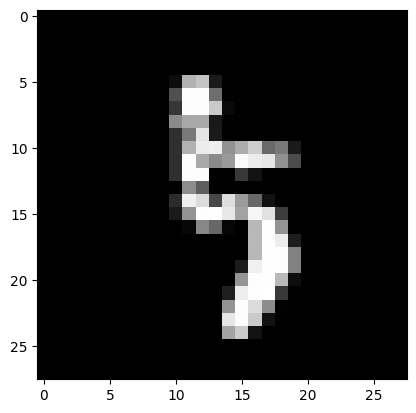

True
test id: 3718
individual experts pred: {4: 2, 9: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
true label: 4


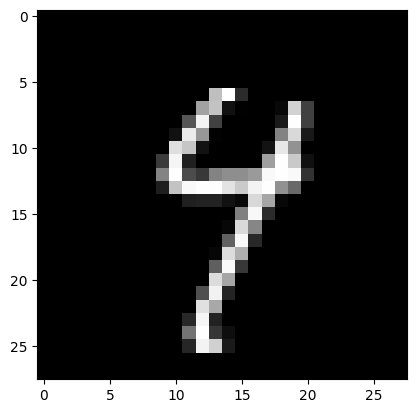

True
test id: 3727
individual experts pred: {8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


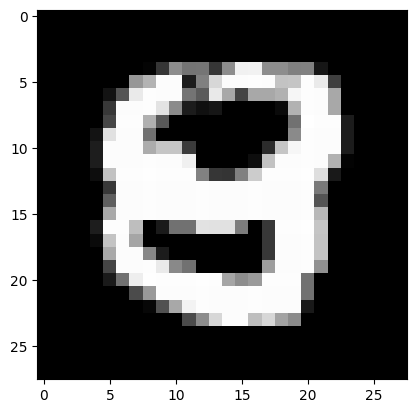

True
test id: 3749
individual experts pred: {6: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


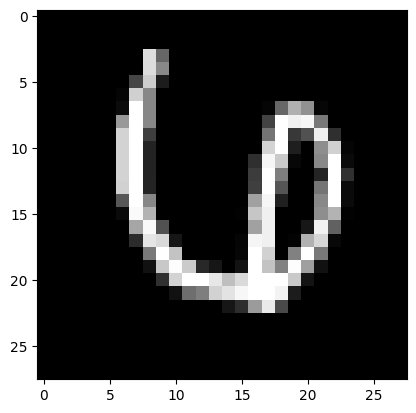

True
test id: 3751
individual experts pred: {7: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


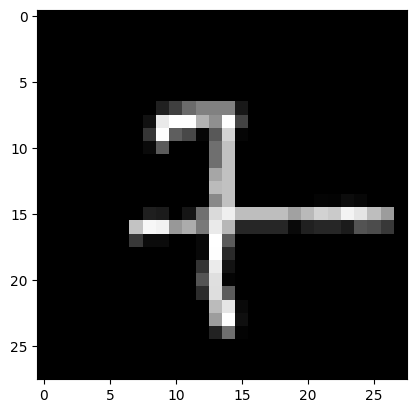

True
test id: 3757
individual experts pred: {3: 2, 8: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


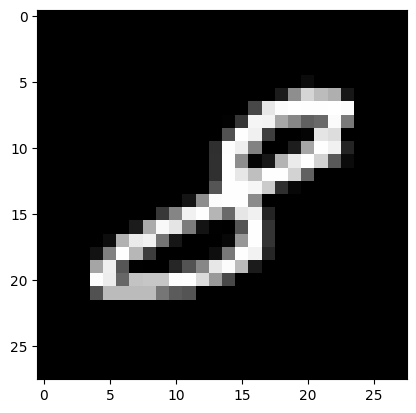

True
test id: 3767
individual experts pred: {7: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


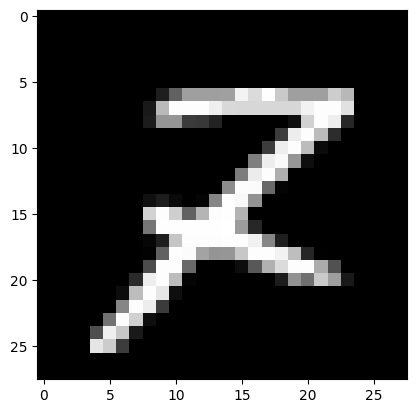

True
test id: 3776
individual experts pred: {5: 3, 8: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


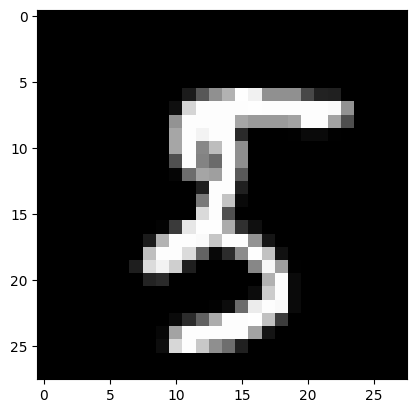

True
test id: 3778
individual experts pred: {2: 1, 5: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


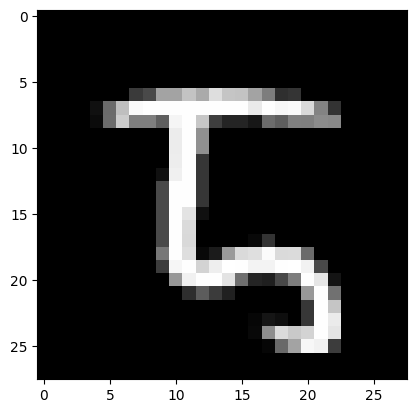

True
test id: 3780
individual experts pred: {4: 2, 6: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
true label: 4


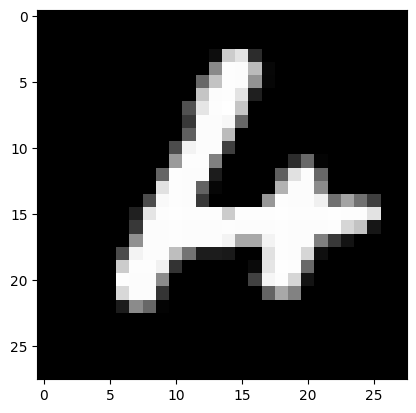

True
test id: 3796
individual experts pred: {2: 2, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


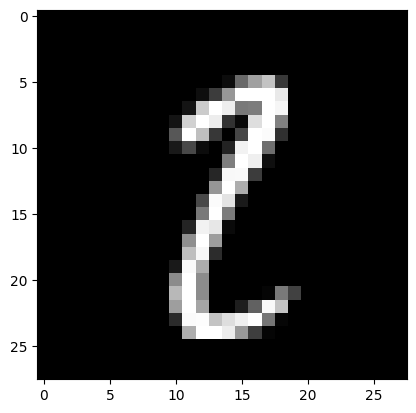

True
test id: 3806
individual experts pred: {5: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


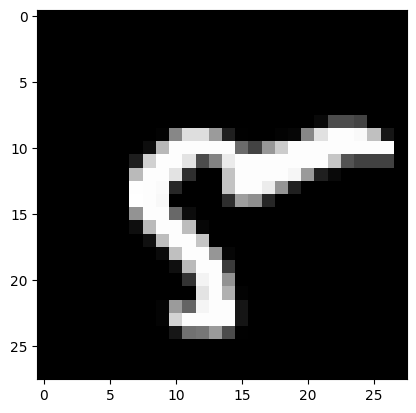

True
test id: 3808
individual experts pred: {}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


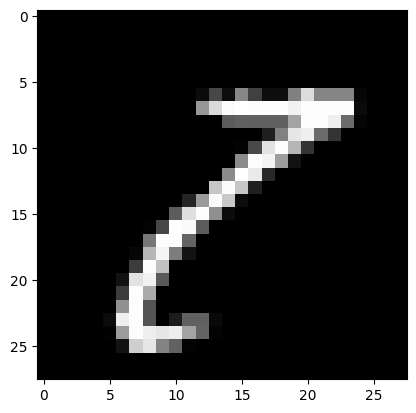

True
test id: 3811
individual experts pred: {3: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


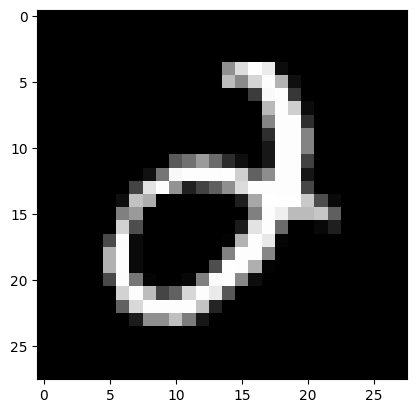

True
test id: 3817
individual experts pred: {2: 4, 4: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


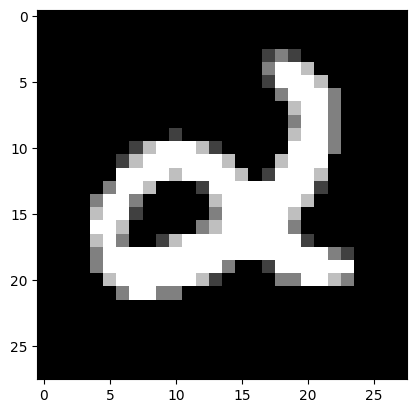

True
test id: 3818
individual experts pred: {0: 2, 4: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 0


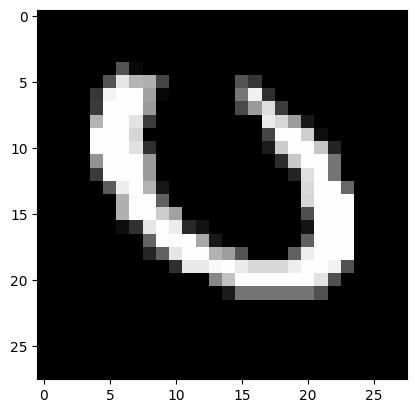

False
test id: 3853
individual experts pred: {}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


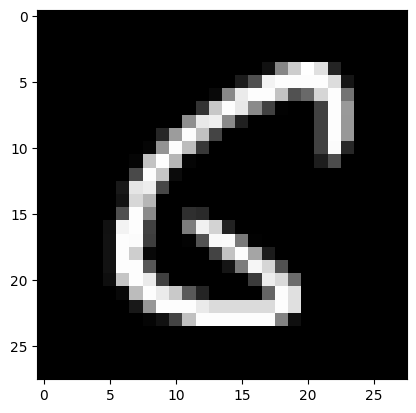

True
test id: 3869
individual experts pred: {4: 3, 9: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


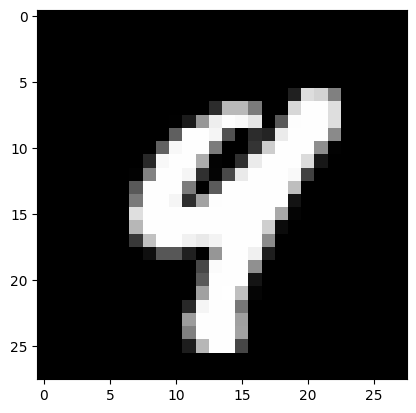

True
test id: 3876
individual experts pred: {2: 4, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


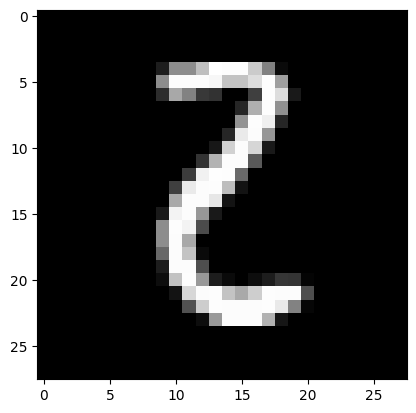

True
test id: 3893
individual experts pred: {5: 1, 6: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
true label: 5


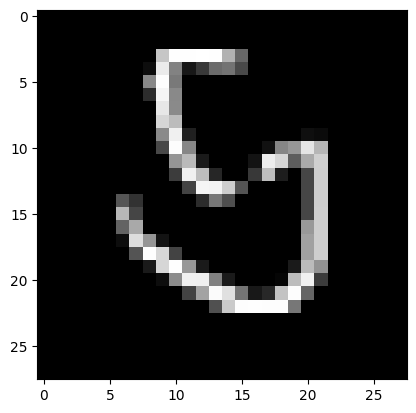

True
test id: 3902
individual experts pred: {3: 2, 5: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


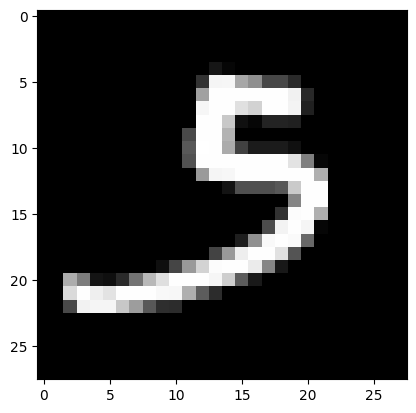

True
test id: 3906
individual experts pred: {3: 5}
PoE predictive: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
true label: 1


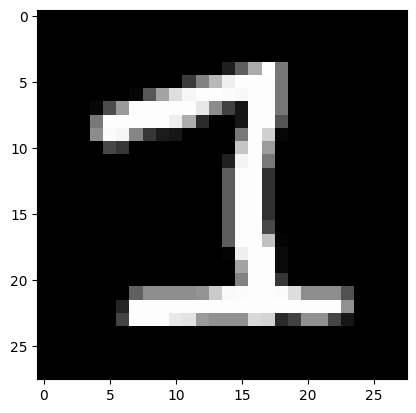

True
test id: 3926
individual experts pred: {3: 4, 9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


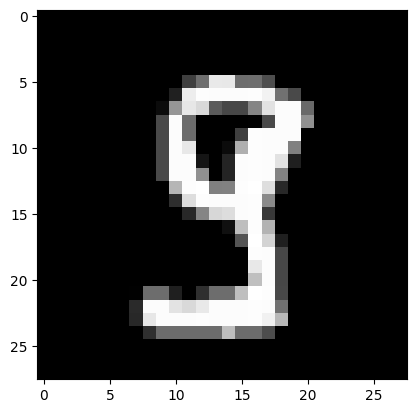

True
test id: 3941
individual experts pred: {2: 2, 4: 1, 6: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
true label: 4


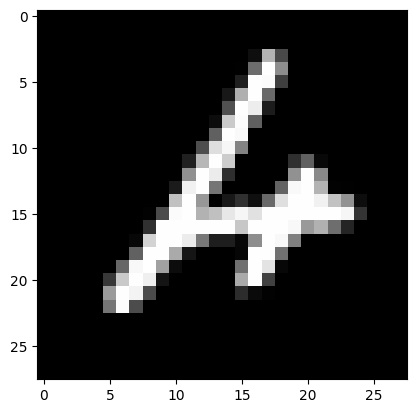

True
test id: 3943
individual experts pred: {3: 4, 5: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


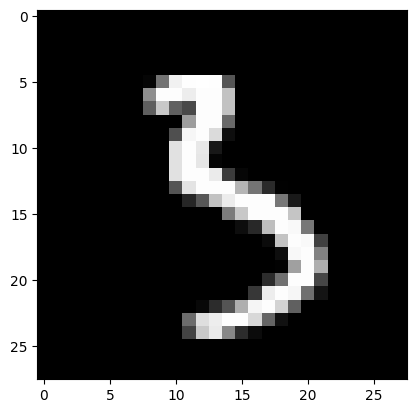

True
test id: 3946
individual experts pred: {2: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


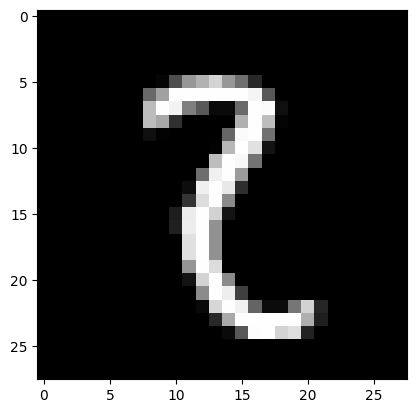

True
test id: 3976
individual experts pred: {1: 3, 7: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


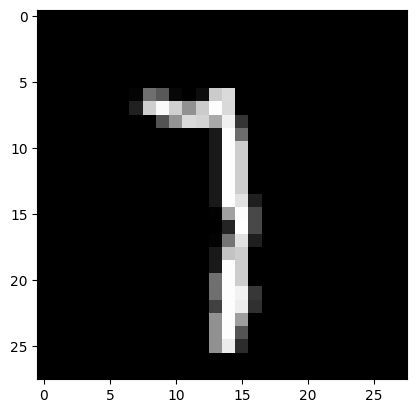

True
test id: 3985
individual experts pred: {4: 3, 9: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


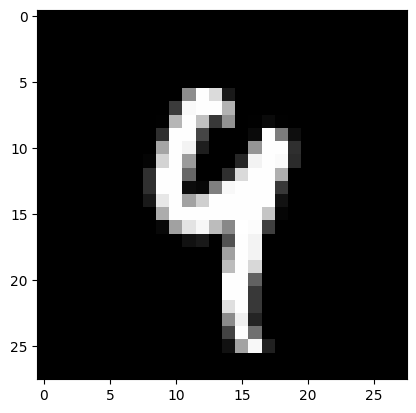

True
test id: 3988
individual experts pred: {8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


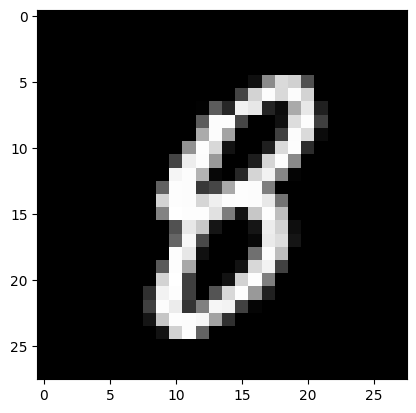

True
test id: 4007
individual experts pred: {7: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


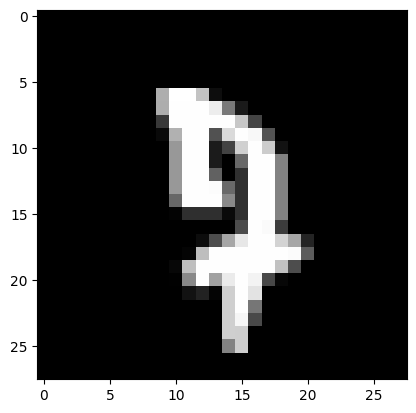

True
test id: 4027
individual experts pred: {1: 1, 7: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


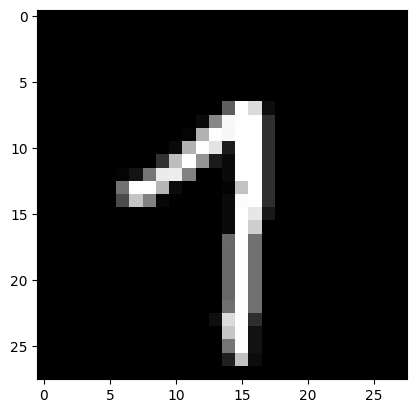

True
test id: 4065
individual experts pred: {9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 0


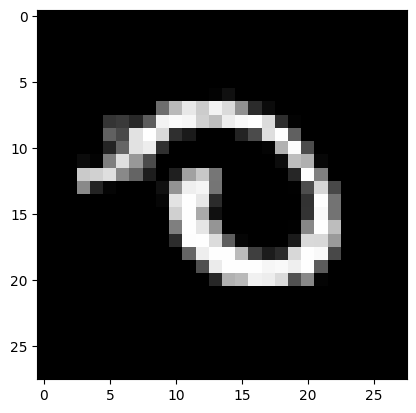

False
test id: 4075
individual experts pred: {0: 2, 3: 2, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


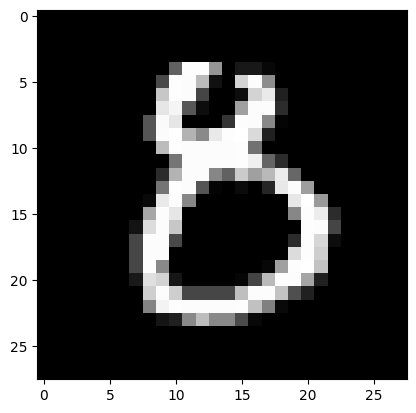

True
test id: 4078
individual experts pred: {3: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


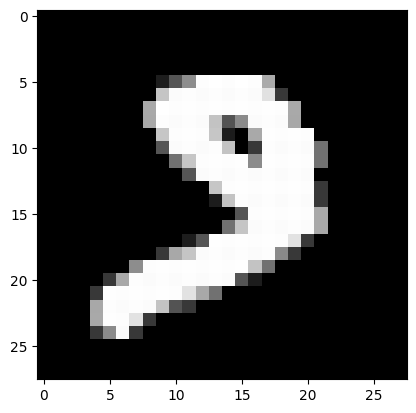

True
test id: 4093
individual experts pred: {4: 3, 9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


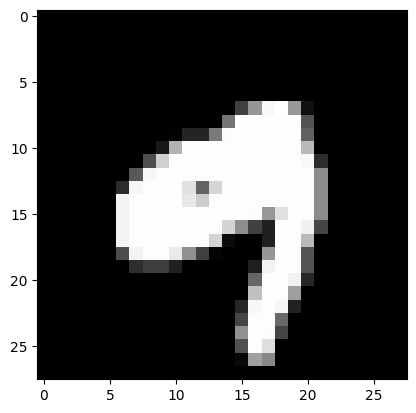

True
test id: 4163
individual experts pred: {0: 1, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


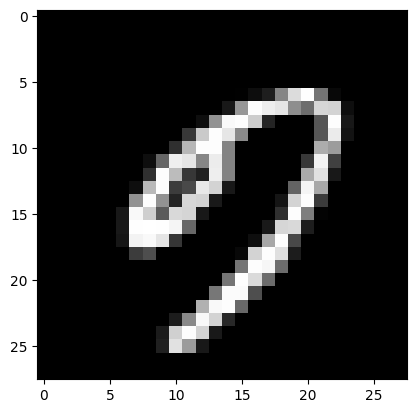

True
test id: 4176
individual experts pred: {6: 1, 7: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
true label: 2


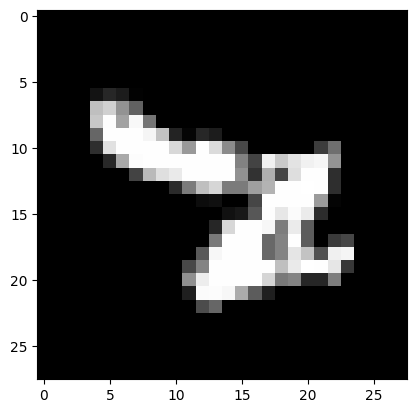

True
test id: 4199
individual experts pred: {9: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


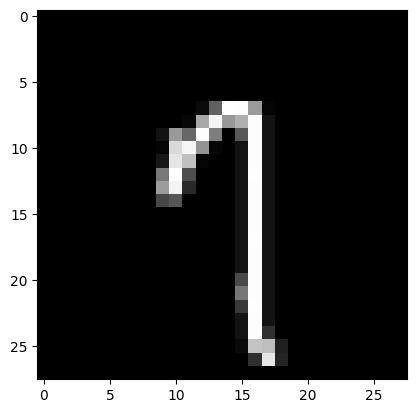

True
test id: 4201
individual experts pred: {1: 1, 7: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
true label: 1


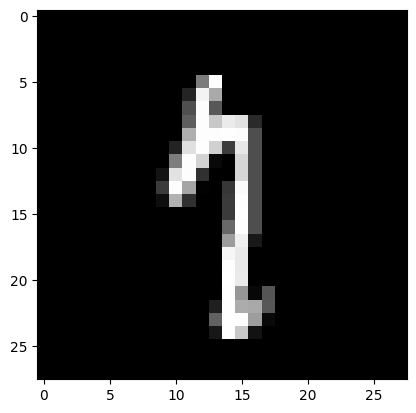

True
test id: 4207
individual experts pred: {8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


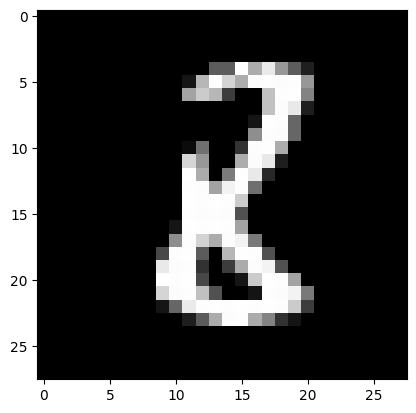

True
test id: 4248
individual experts pred: {8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


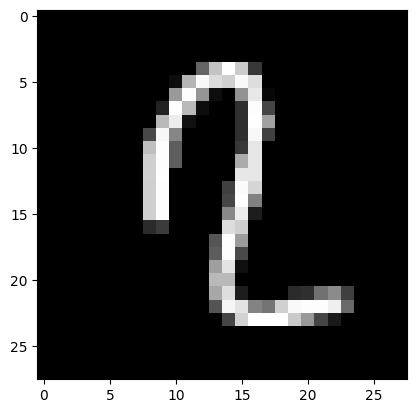

True
test id: 4271
individual experts pred: {3: 3, 5: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


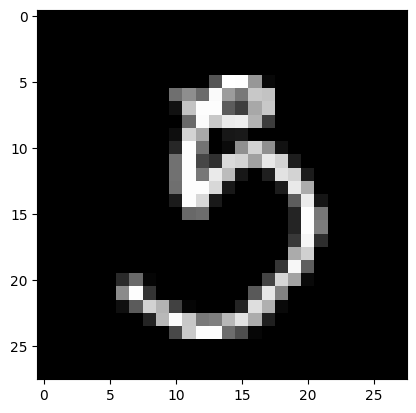

True
test id: 4289
individual experts pred: {7: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


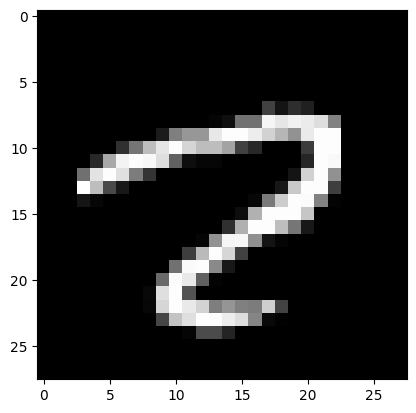

True
test id: 4300
individual experts pred: {5: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


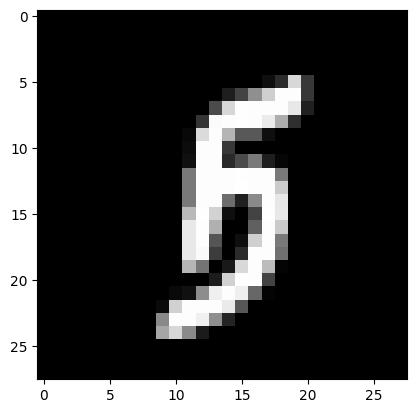

True
test id: 4306
individual experts pred: {3: 1, 7: 2, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


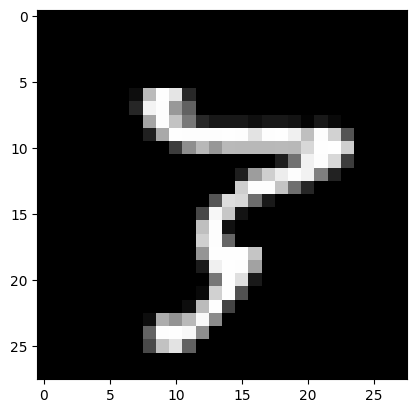

True
test id: 4313
individual experts pred: {4: 4, 7: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


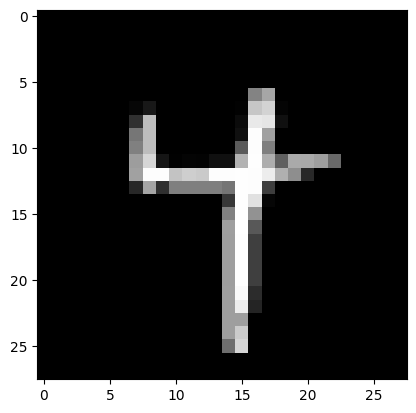

True
test id: 4344
individual experts pred: {9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


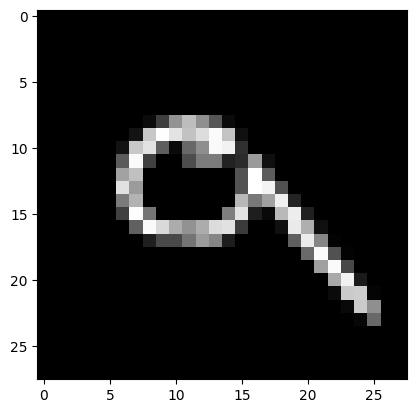

True
test id: 4355
individual experts pred: {3: 1, 5: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


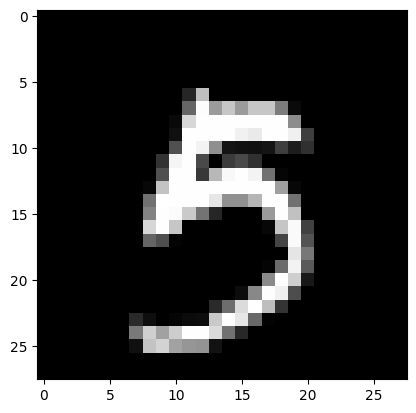

True
test id: 4359
individual experts pred: {5: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


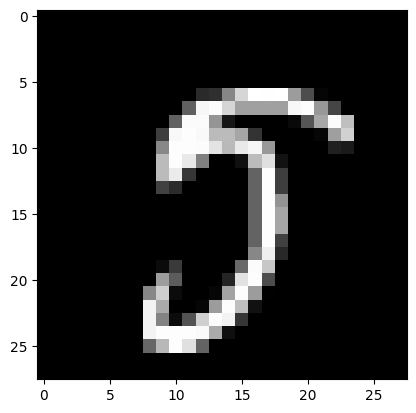

True
test id: 4369
individual experts pred: {4: 4, 9: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


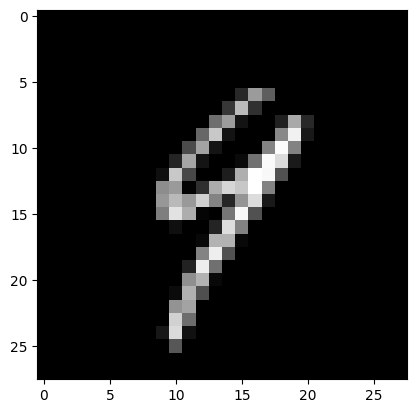

True
test id: 4374
individual experts pred: {5: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


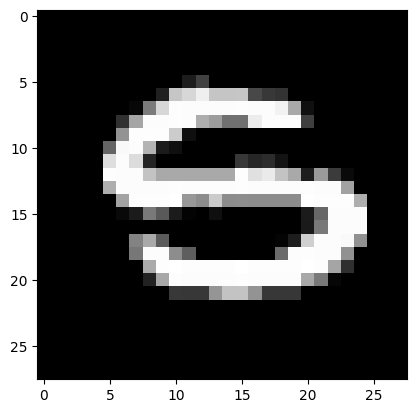

True
test id: 4425
individual experts pred: {4: 3, 9: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


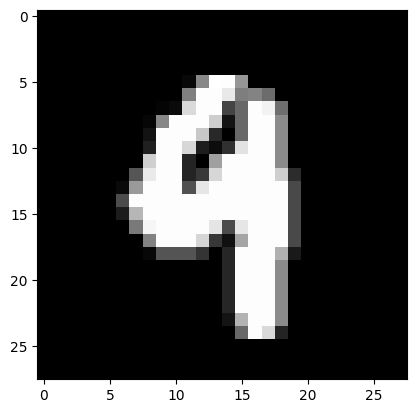

True
test id: 4437
individual experts pred: {2: 1, 3: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


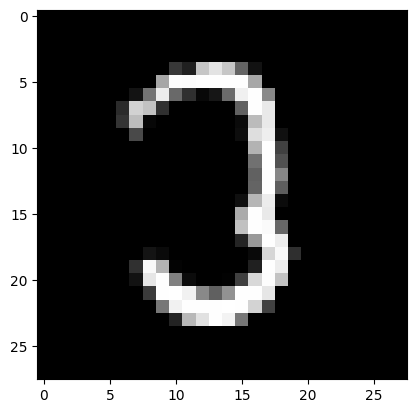

True
test id: 4438
individual experts pred: {4: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


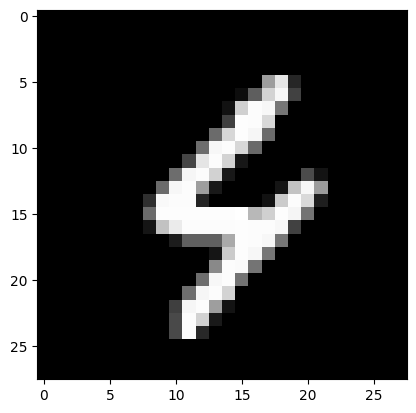

True
test id: 4443
individual experts pred: {2: 2, 3: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


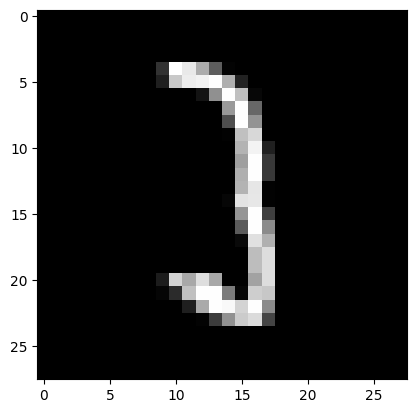

True
test id: 4449
individual experts pred: {6: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


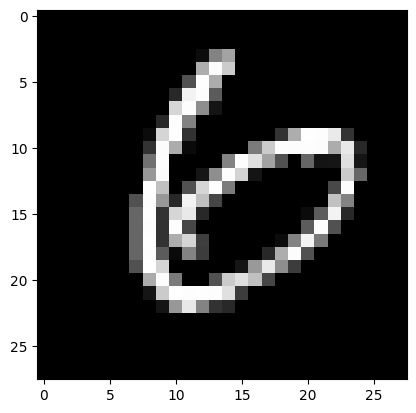

True
test id: 4477
individual experts pred: {0: 4, 6: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 0


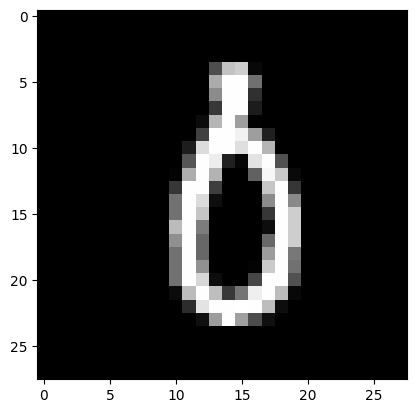

False
test id: 4487
individual experts pred: {7: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


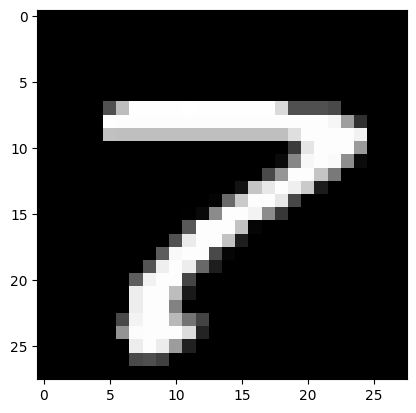

True
test id: 4497
individual experts pred: {7: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


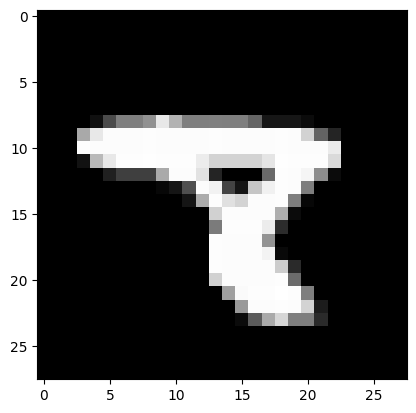

True
test id: 4504
individual experts pred: {2: 1, 5: 1, 7: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


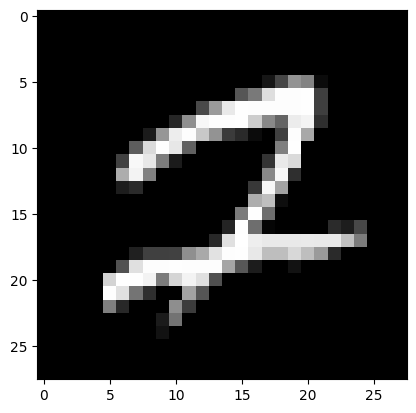

True
test id: 4521
individual experts pred: {2: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


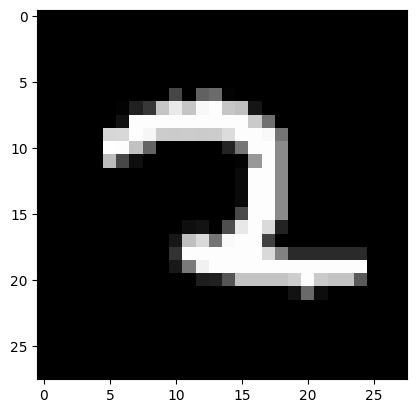

True
test id: 4534
individual experts pred: {8: 1, 9: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


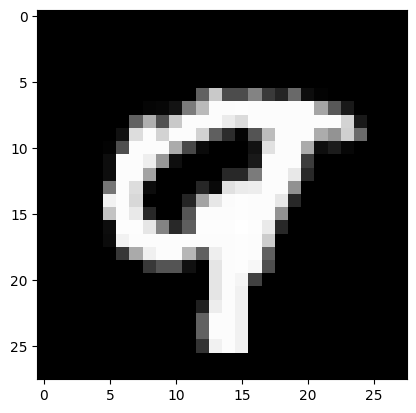

True
test id: 4536
individual experts pred: {5: 4, 6: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


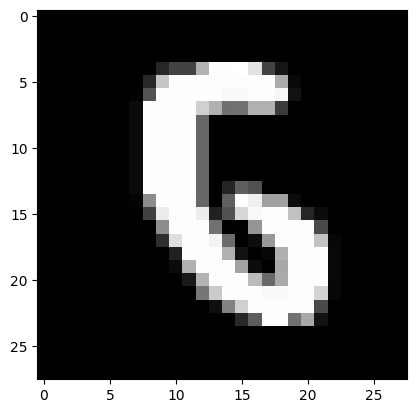

True
test id: 4547
individual experts pred: {4: 1, 6: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


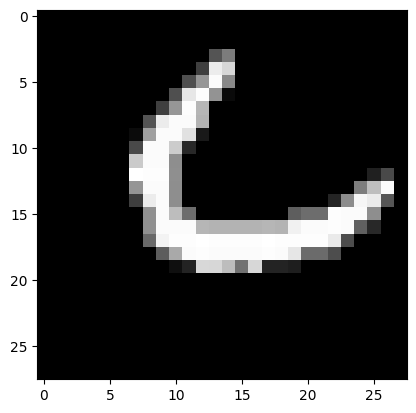

True
test id: 4571
individual experts pred: {6: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


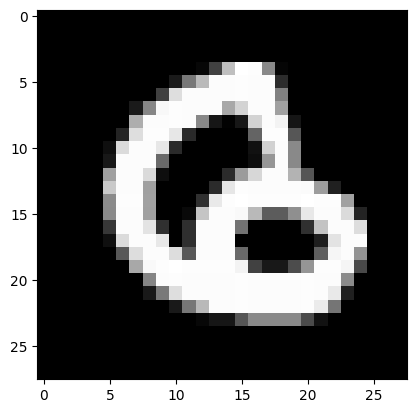

True
test id: 4575
individual experts pred: {2: 1, 4: 3, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


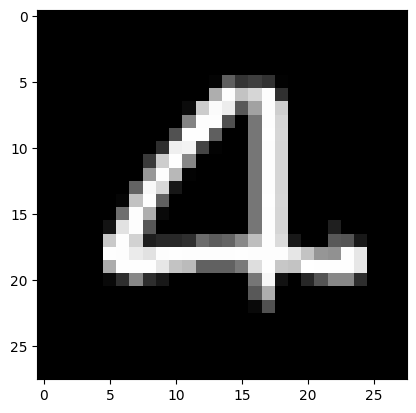

True
test id: 4578
individual experts pred: {7: 3, 9: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


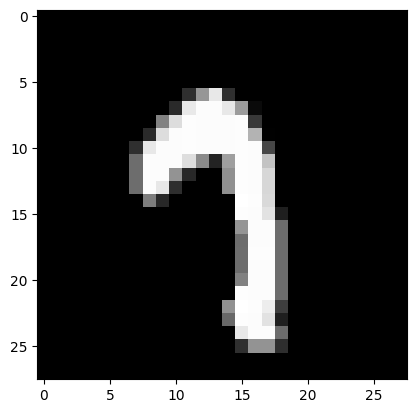

True
test id: 4601
individual experts pred: {4: 5, 8: 1}
PoE predictive: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
true label: 8


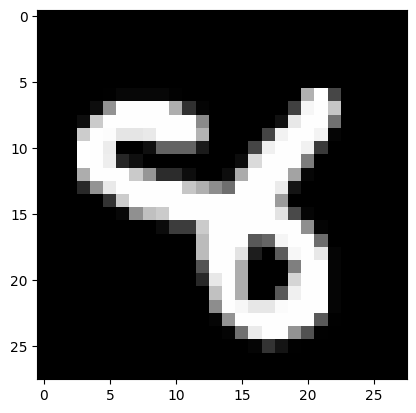

True
test id: 4615
individual experts pred: {2: 4, 4: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


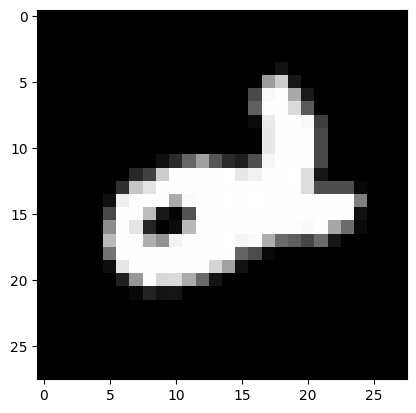

True
test id: 4639
individual experts pred: {8: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


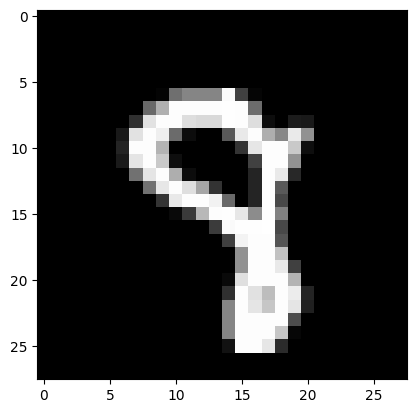

True
test id: 4671
individual experts pred: {8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


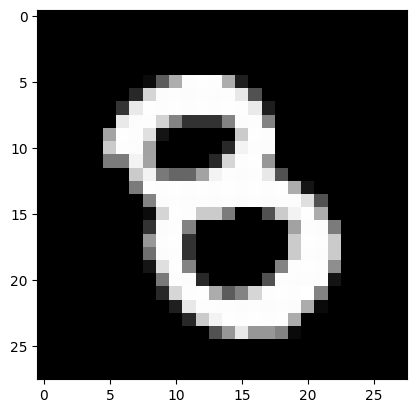

True
test id: 4690
individual experts pred: {2: 2, 7: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


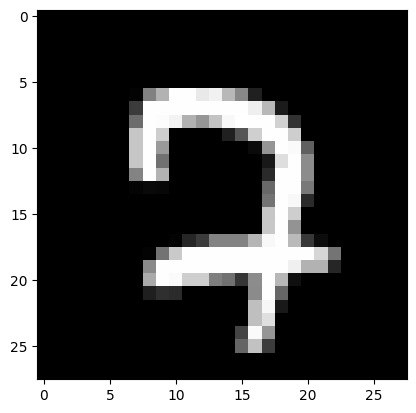

True
test id: 4731
individual experts pred: {7: 1, 8: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


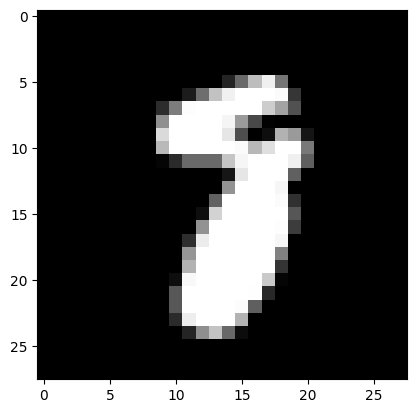

True
test id: 4740
individual experts pred: {3: 4, 5: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


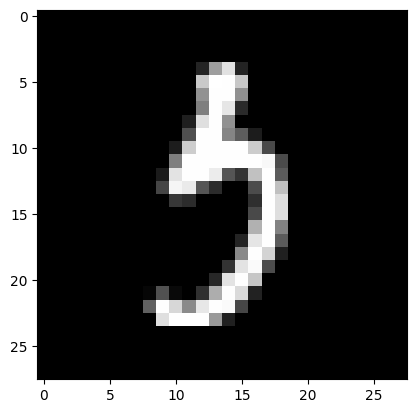

True
test id: 4751
individual experts pred: {4: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


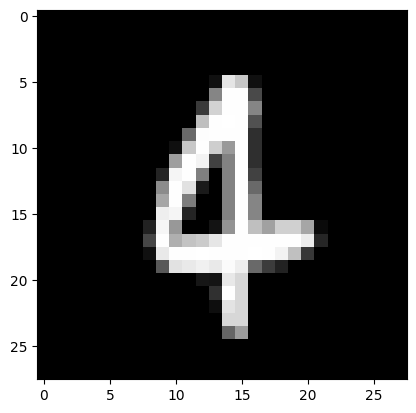

True
test id: 4761
individual experts pred: {8: 4, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


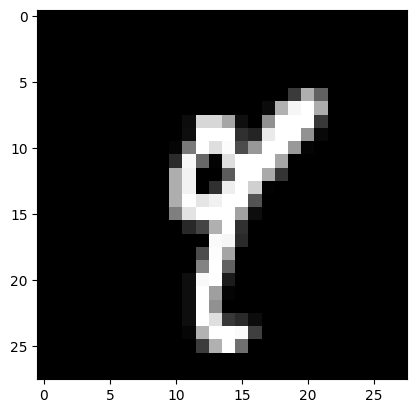

True
test id: 4807
individual experts pred: {0: 2, 3: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


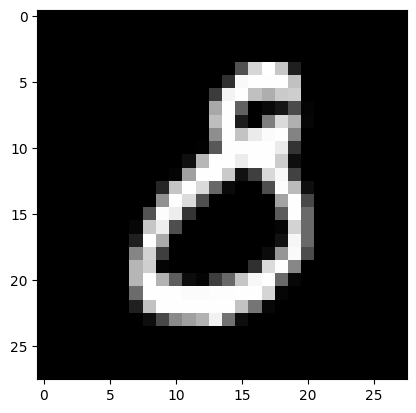

True
test id: 4814
individual experts pred: {6: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


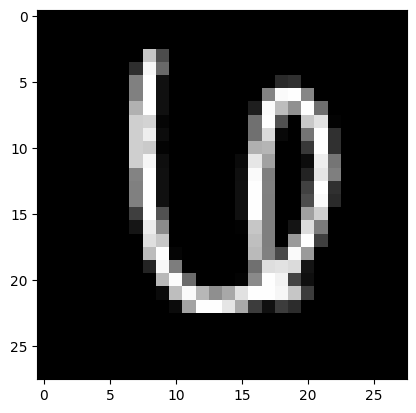

True
test id: 4823
individual experts pred: {4: 1, 6: 1, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


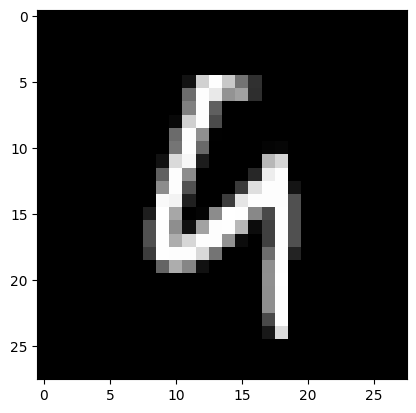

True
test id: 4833
individual experts pred: {2: 1, 3: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


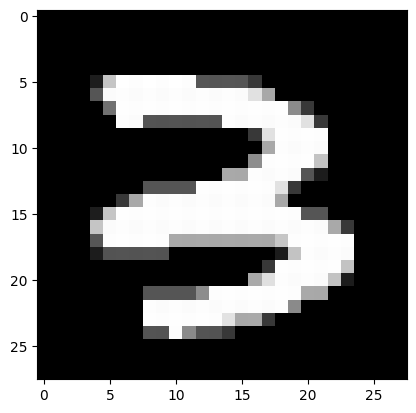

True
test id: 4874
individual experts pred: {9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


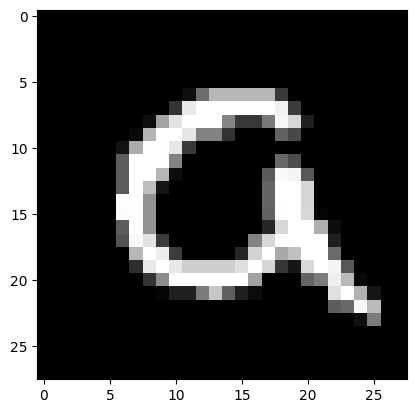

True
test id: 4880
individual experts pred: {8: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
true label: 0


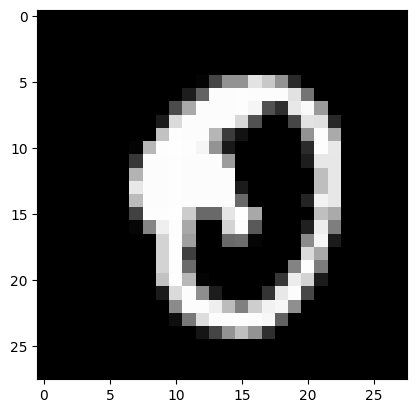

True
test id: 4890
individual experts pred: {8: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


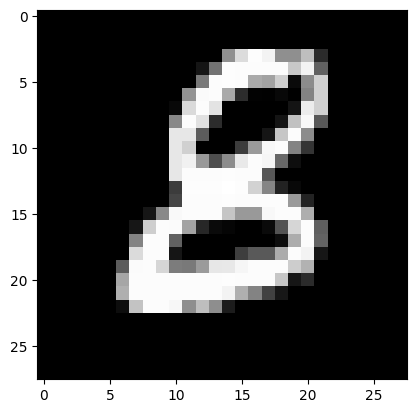

True
test id: 4915
individual experts pred: {5: 4, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


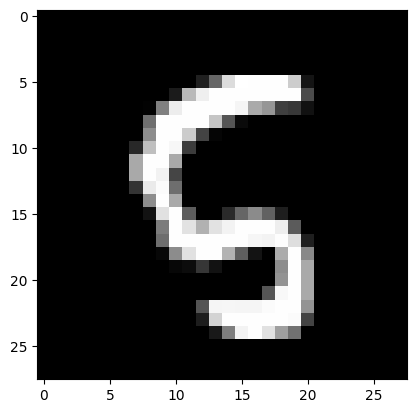

True
test id: 4943
individual experts pred: {2: 2, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


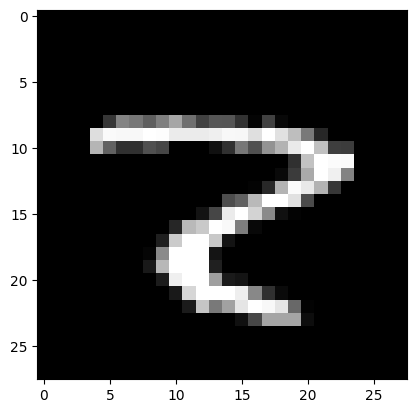

True
test id: 4956
individual experts pred: {4: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


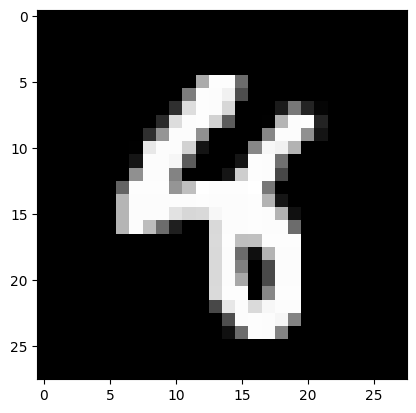

True
test id: 4966
individual experts pred: {7: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


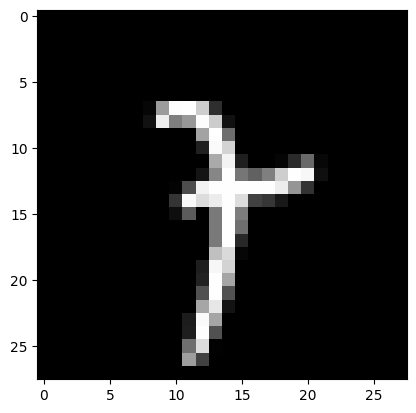

True
test id: 5067
individual experts pred: {3: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


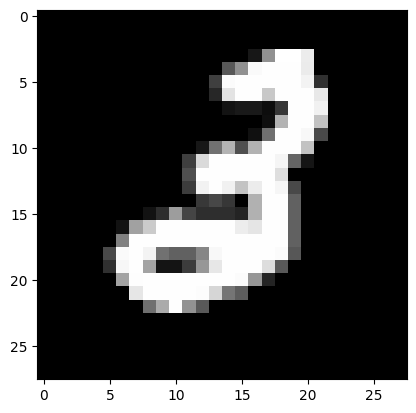

True
test id: 5078
individual experts pred: {3: 2, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


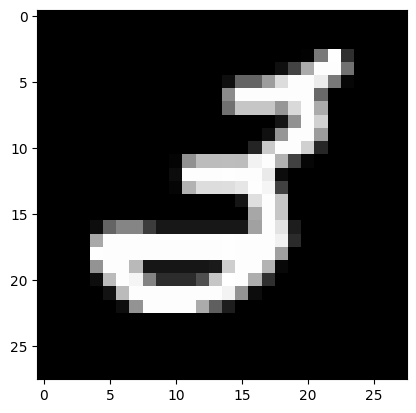

True
test id: 5140
individual experts pred: {3: 1, 4: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


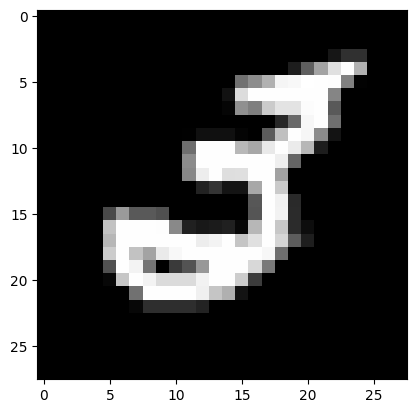

True
test id: 5165
individual experts pred: {0: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 0


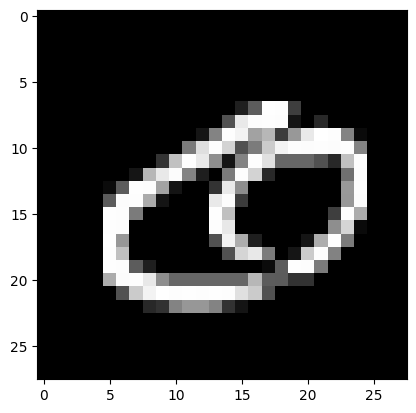

False
test id: 5210
individual experts pred: {9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


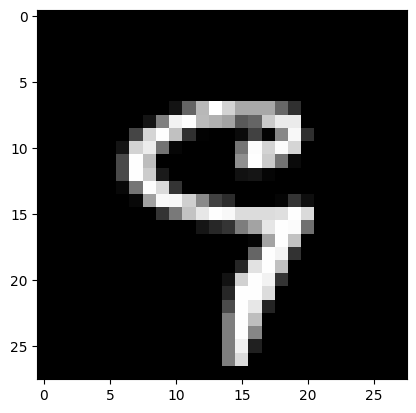

True
test id: 5265
individual experts pred: {4: 2, 6: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


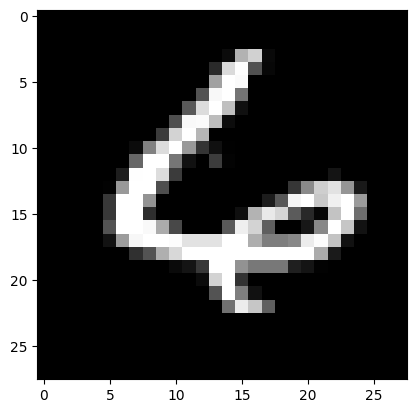

True
test id: 5331
individual experts pred: {1: 3, 6: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
true label: 1


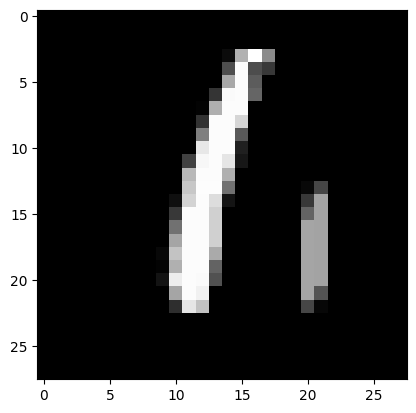

True
test id: 5409
individual experts pred: {4: 3, 6: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


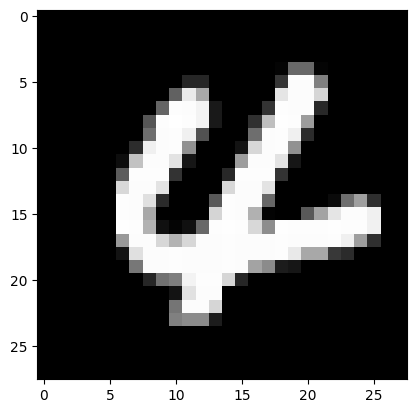

True
test id: 5457
individual experts pred: {8: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
true label: 1


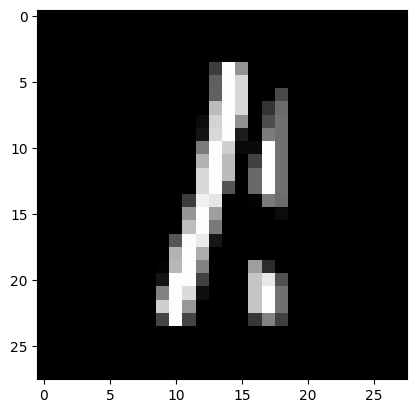

True
test id: 5600
individual experts pred: {7: 4, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


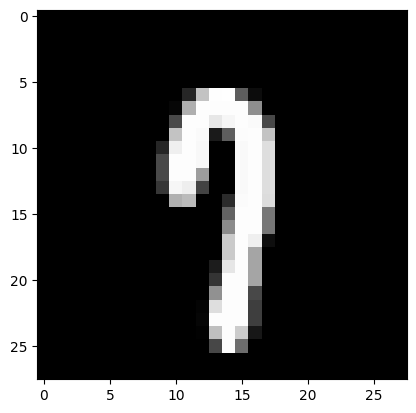

True
test id: 5634
individual experts pred: {3: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


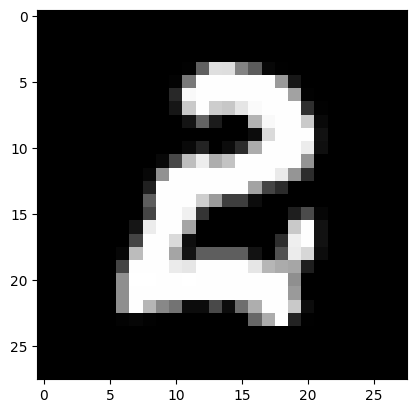

True
test id: 5642
individual experts pred: {1: 1, 5: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 1


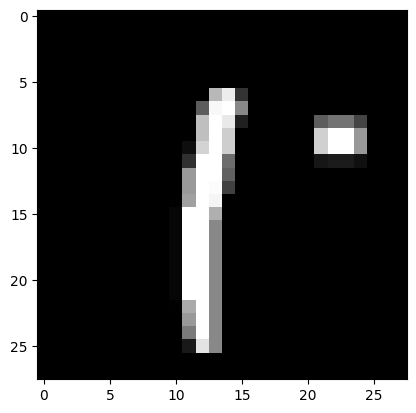

True
test id: 5654
individual experts pred: {7: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


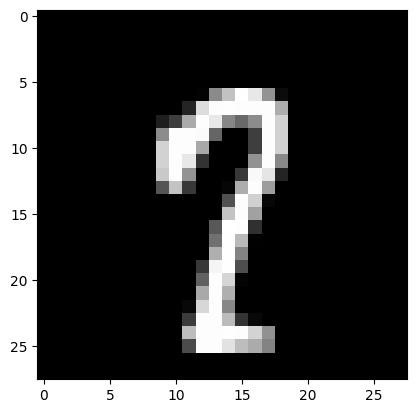

True
test id: 5676
individual experts pred: {3: 1, 4: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


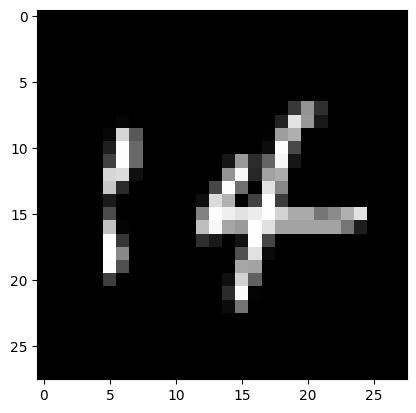

True
test id: 5734
individual experts pred: {2: 4, 7: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


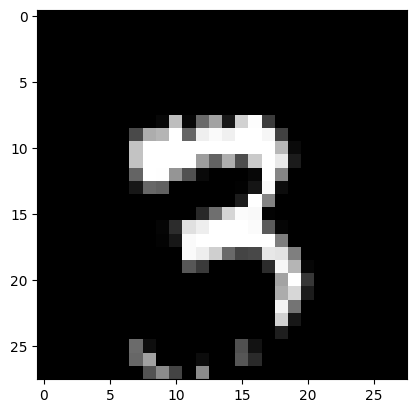

True
test id: 5735
individual experts pred: {5: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


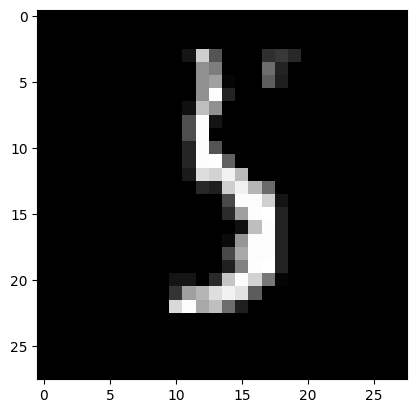

True
test id: 5749
individual experts pred: {5: 3, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


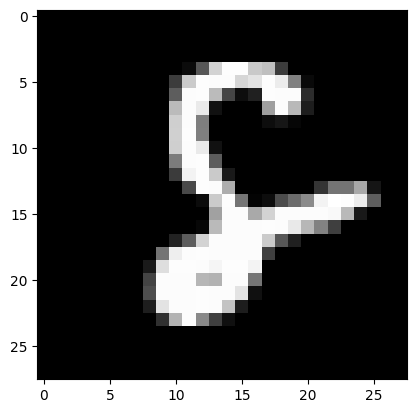

True
test id: 5835
individual experts pred: {7: 3, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


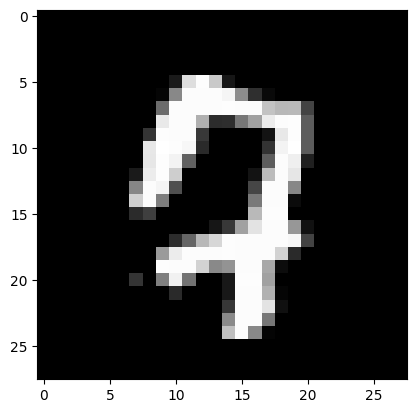

True
test id: 5842
individual experts pred: {4: 4, 7: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


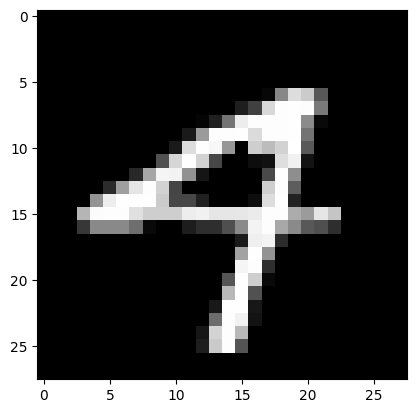

True
test id: 5858
individual experts pred: {4: 3, 7: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


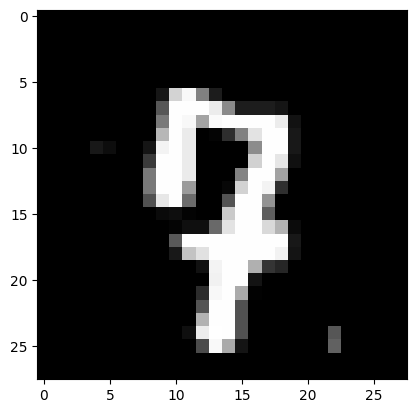

True
test id: 5887
individual experts pred: {0: 1, 7: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


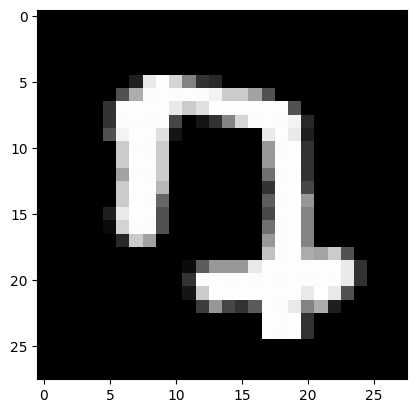

True
test id: 5888
individual experts pred: {4: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


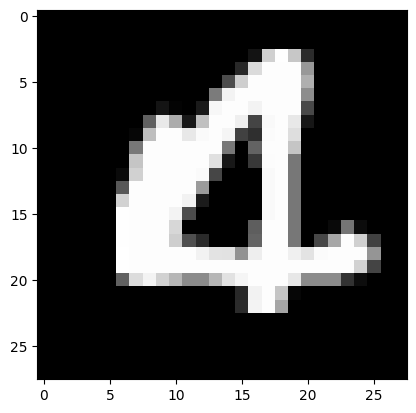

True
test id: 5936
individual experts pred: {4: 1, 9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


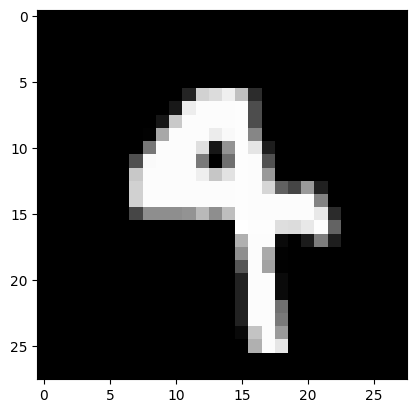

True
test id: 5937
individual experts pred: {3: 5, 5: 3}
PoE predictive: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
true label: 5


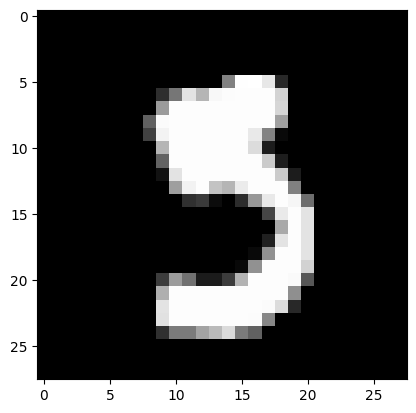

True
test id: 5955
individual experts pred: {8: 5, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
true label: 3


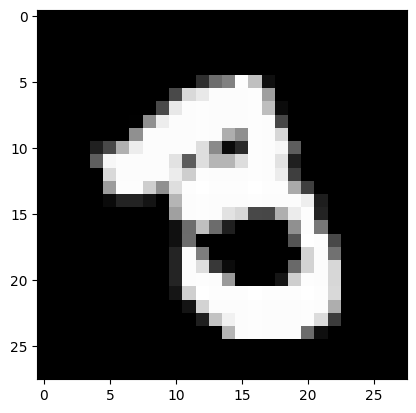

True
test id: 5973
individual experts pred: {8: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
true label: 3


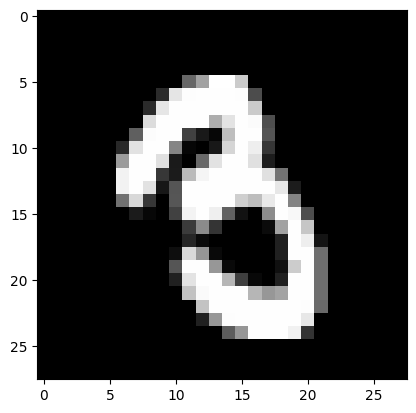

True
test id: 5982
individual experts pred: {3: 2, 5: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


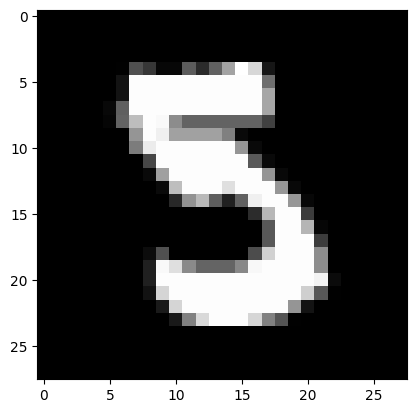

True
test id: 6009
individual experts pred: {3: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


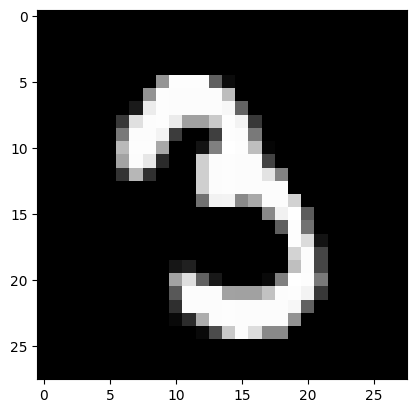

True
test id: 6011
individual experts pred: {3: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


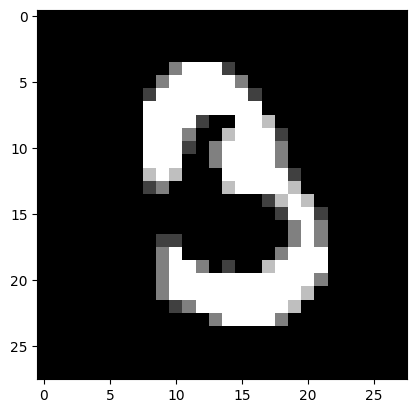

True
test id: 6023
individual experts pred: {}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


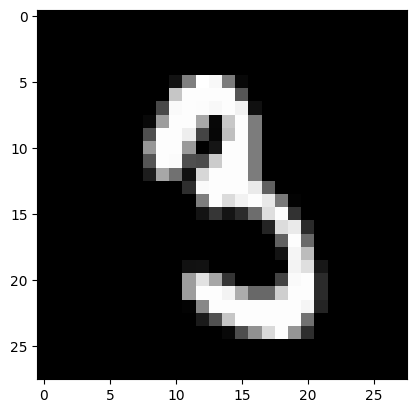

True
test id: 6045
individual experts pred: {3: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


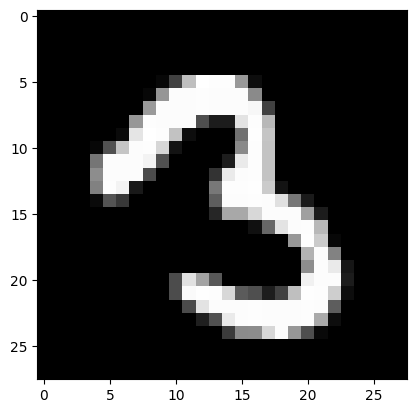

True
test id: 6046
individual experts pred: {3: 4, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


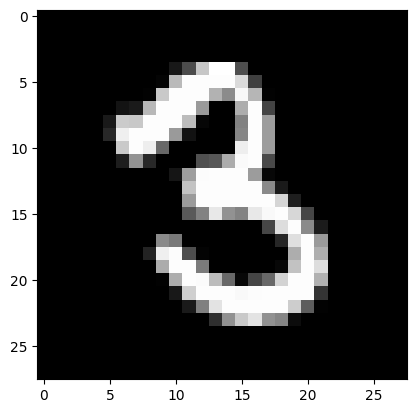

True
test id: 6059
individual experts pred: {9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


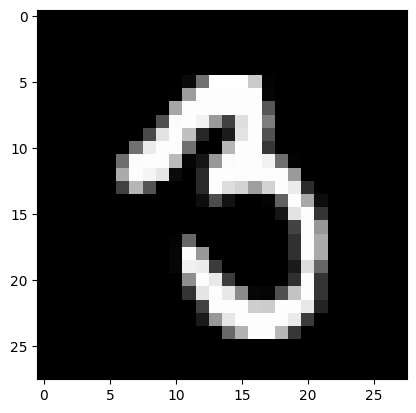

True
test id: 6071
individual experts pred: {3: 4, 9: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


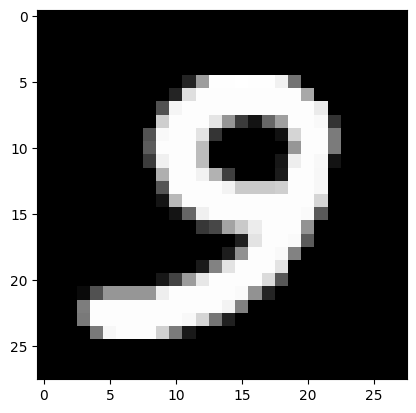

True
test id: 6091
individual experts pred: {3: 1, 9: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


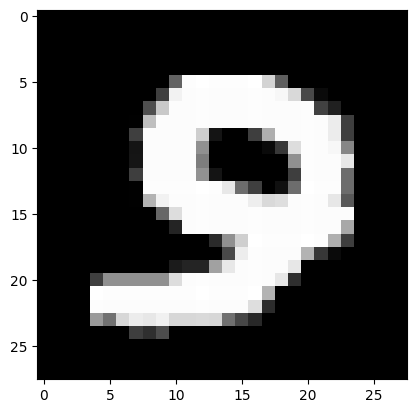

True
test id: 6166
individual experts pred: {3: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


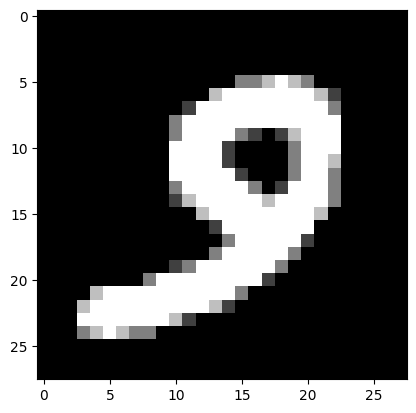

True
test id: 6172
individual experts pred: {9: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


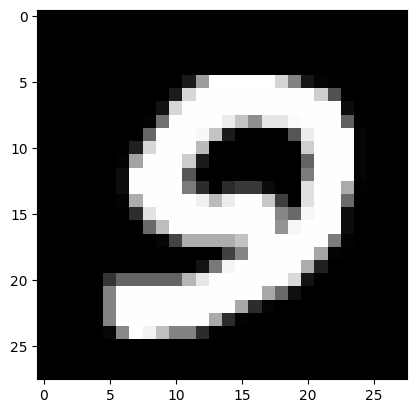

True
test id: 6173
individual experts pred: {9: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


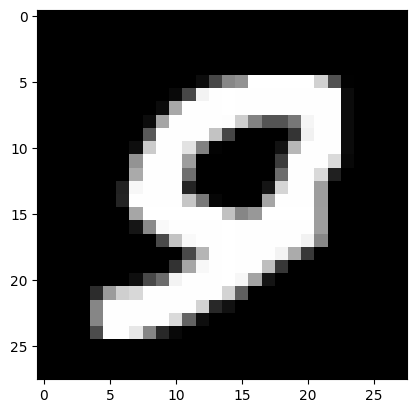

True
test id: 6174
individual experts pred: {3: 4, 5: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


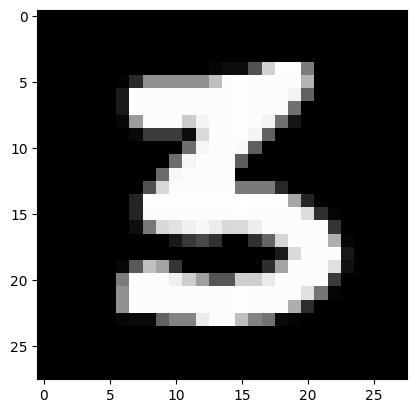

True
test id: 6390
individual experts pred: {5: 4, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


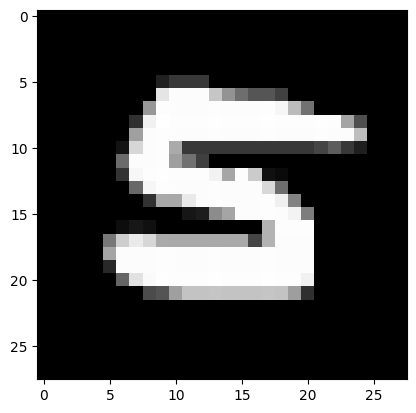

True
test id: 6391
individual experts pred: {2: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


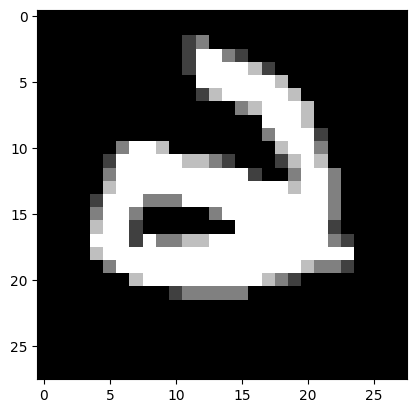

True
test id: 6400
individual experts pred: {0: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 0


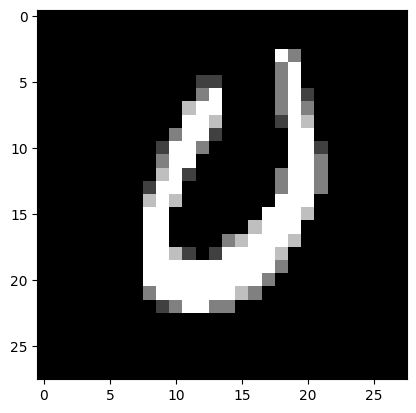

False
test id: 6426
individual experts pred: {0: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 0


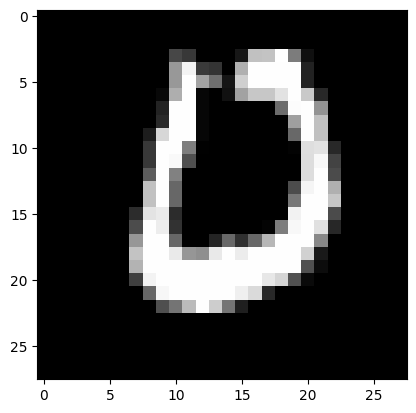

False
test id: 6505
individual experts pred: {0: 2, 9: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


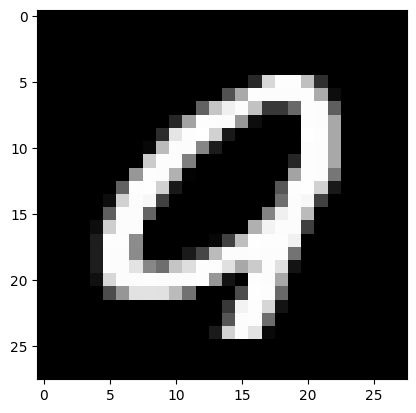

True
test id: 6511
individual experts pred: {3: 4, 5: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


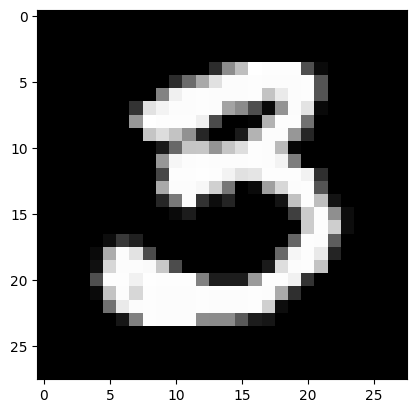

True
test id: 6532
individual experts pred: {0: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 0


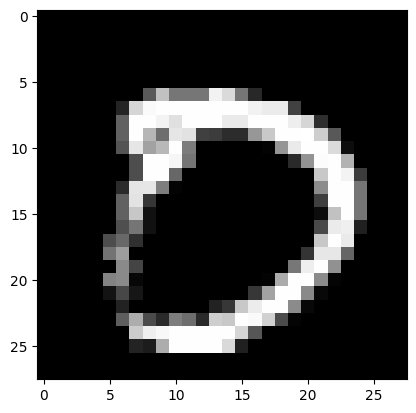

False
test id: 6555
individual experts pred: {8: 1, 9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


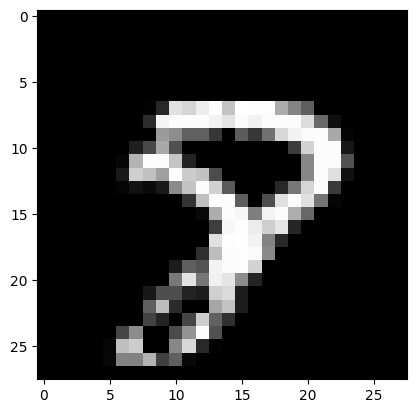

True
test id: 6560
individual experts pred: {8: 1, 9: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


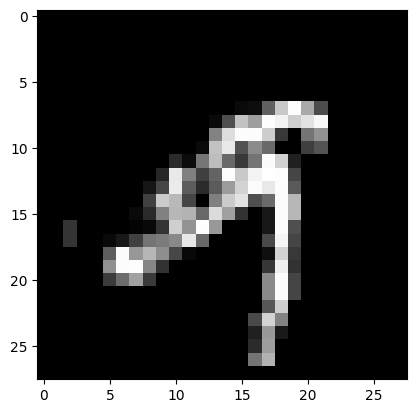

True
test id: 6561
individual experts pred: {7: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


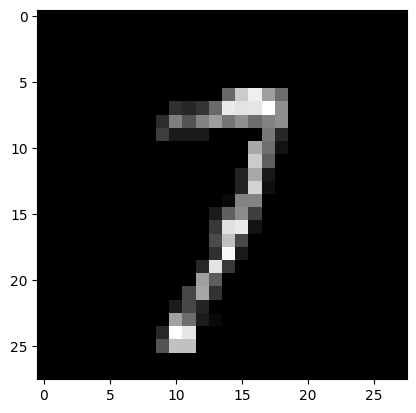

True
test id: 6568
individual experts pred: {4: 1, 9: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


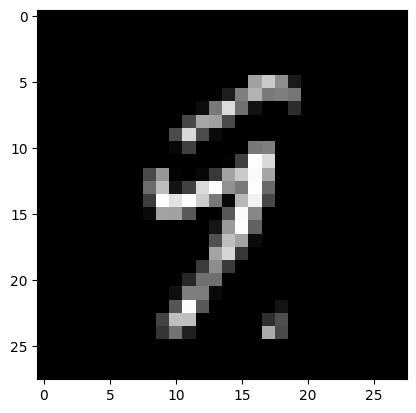

True
test id: 6571
individual experts pred: {7: 3, 9: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


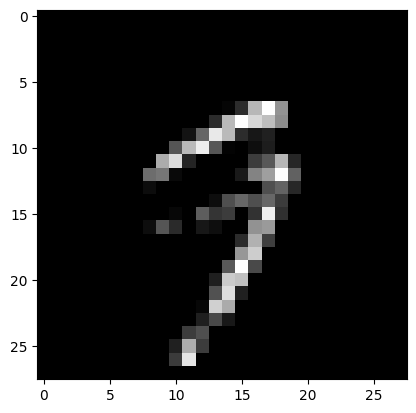

True
test id: 6576
individual experts pred: {1: 1, 7: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


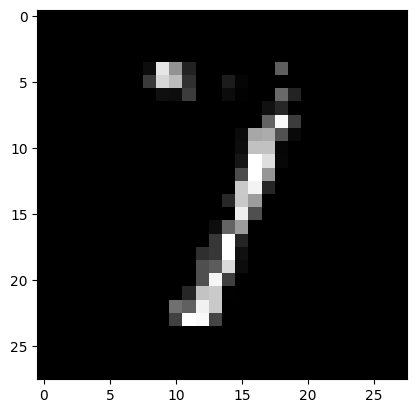

True
test id: 6597
individual experts pred: {7: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
true label: 0


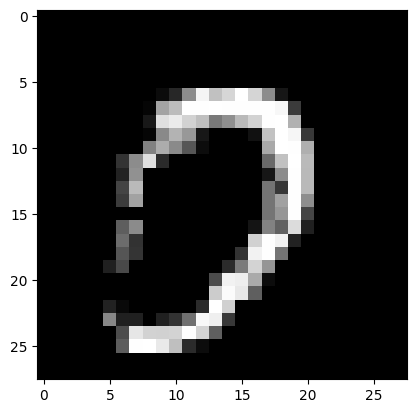

True
test id: 6605
individual experts pred: {5: 1, 6: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


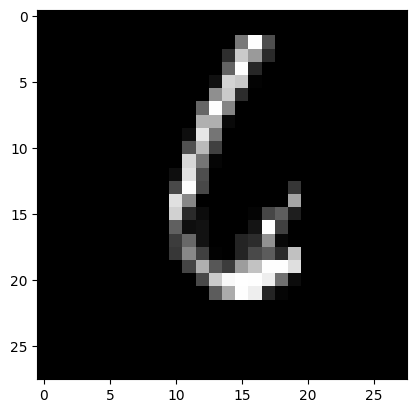

True
test id: 6608
individual experts pred: {5: 1, 9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


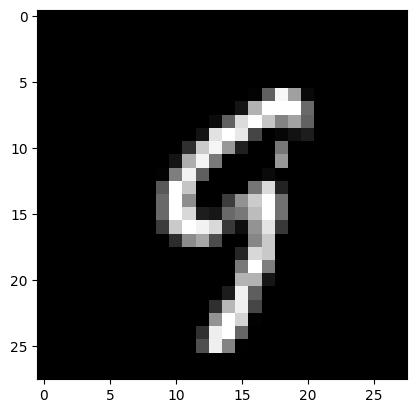

True
test id: 6625
individual experts pred: {4: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


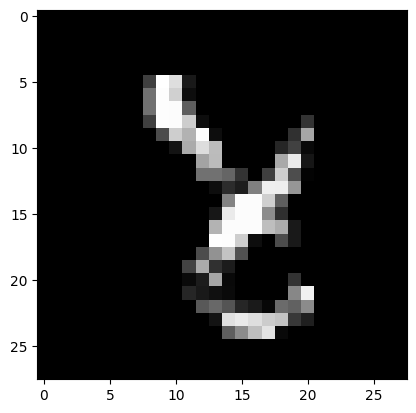

True
test id: 6632
individual experts pred: {5: 2, 9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


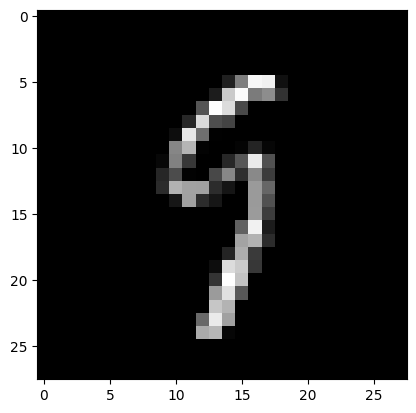

True
test id: 6641
individual experts pred: {5: 2, 8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


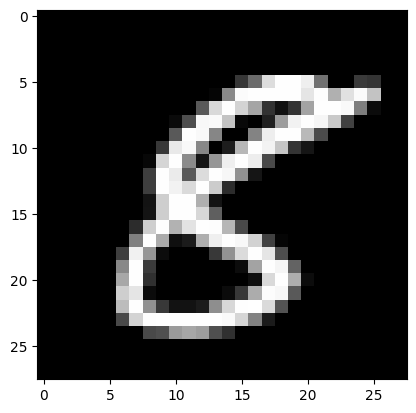

True
test id: 6651
individual experts pred: {5: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 0


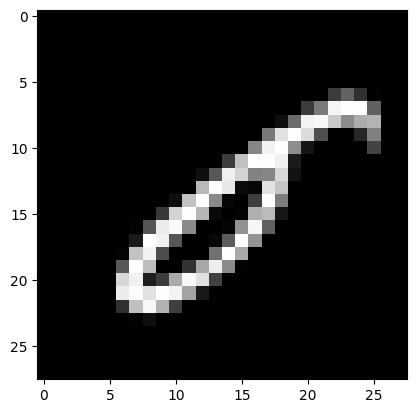

False
test id: 6681
individual experts pred: {3: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


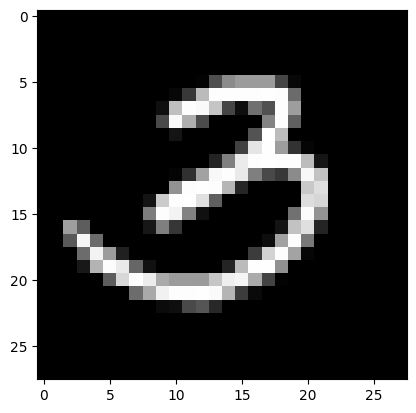

True
test id: 6755
individual experts pred: {3: 1, 8: 1, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


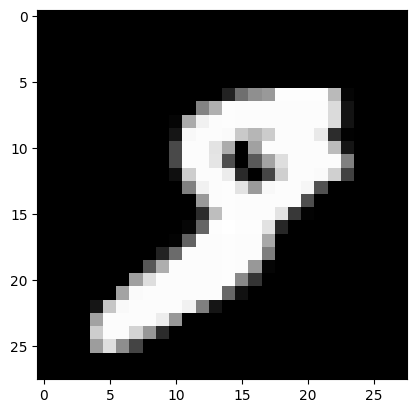

True
test id: 6783
individual experts pred: {1: 1, 6: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
true label: 1


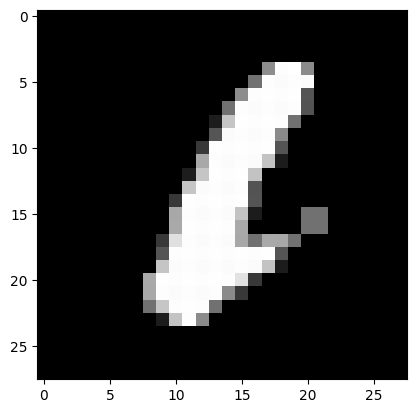

True
test id: 6817
individual experts pred: {4: 1, 9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


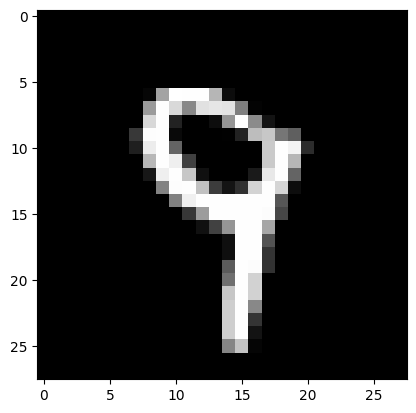

True
test id: 7216
individual experts pred: {6: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 0


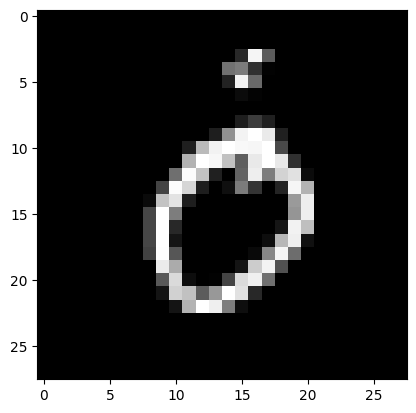

False
test id: 7233
individual experts pred: {3: 2, 5: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


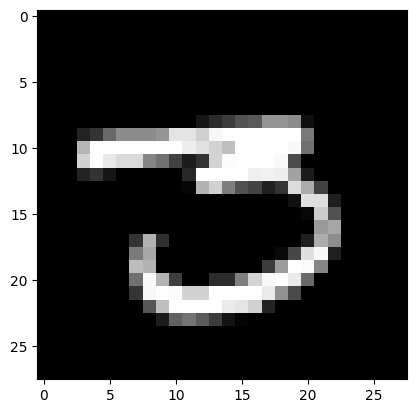

True
test id: 7259
individual experts pred: {3: 3, 8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


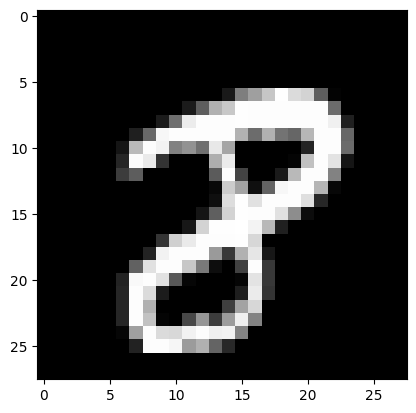

True
test id: 7434
individual experts pred: {4: 4, 8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


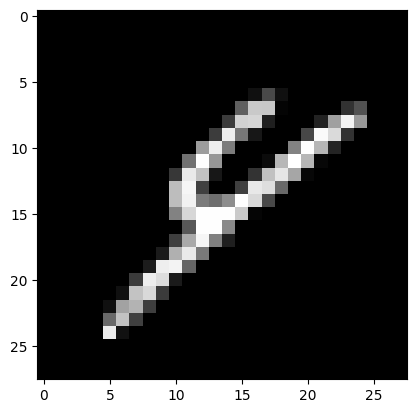

True
test id: 7492
individual experts pred: {2: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


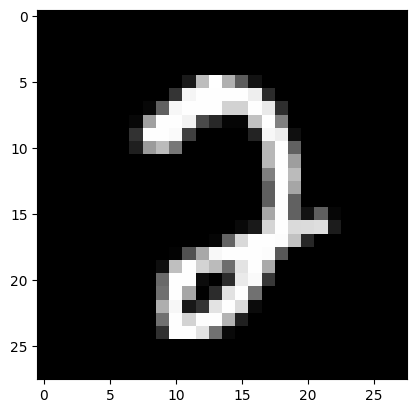

True
test id: 7545
individual experts pred: {8: 4, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


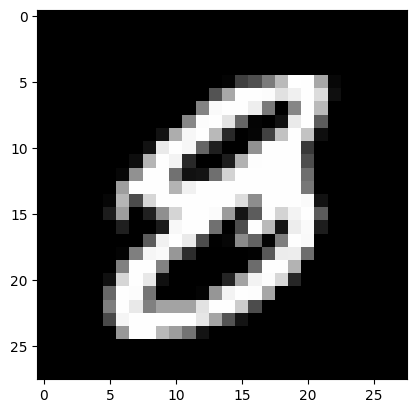

True
test id: 7797
individual experts pred: {5: 4, 6: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


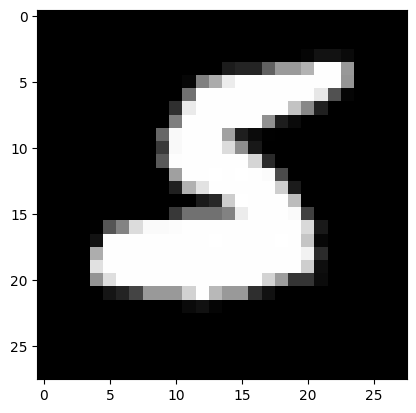

True
test id: 7849
individual experts pred: {2: 1, 3: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


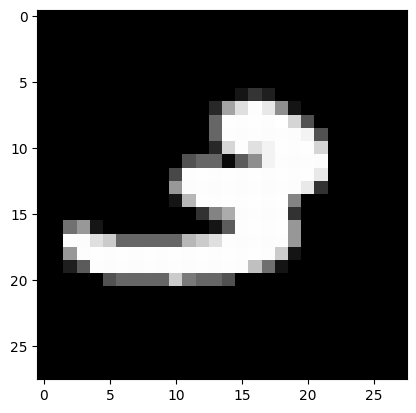

True
test id: 7902
individual experts pred: {7: 4, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


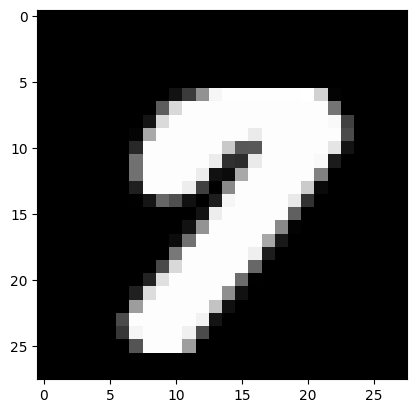

True
test id: 7915
individual experts pred: {7: 4, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


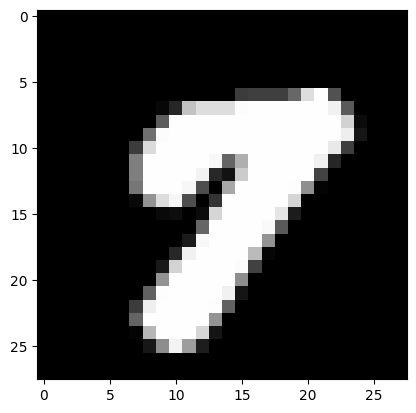

True
test id: 7921
individual experts pred: {8: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


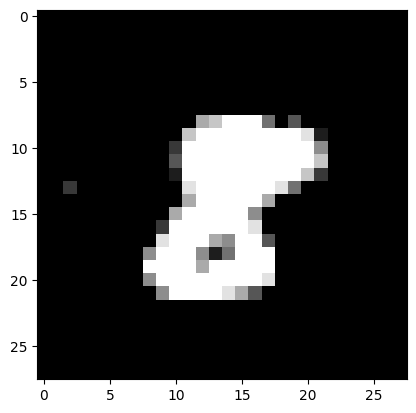

True
test id: 7928
individual experts pred: {1: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 1


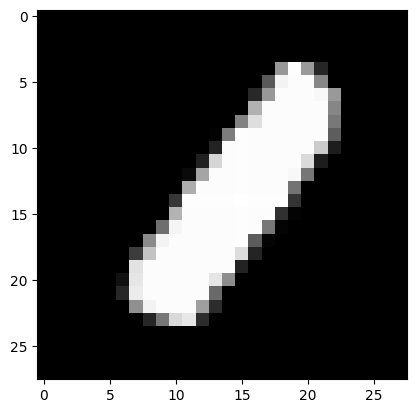

True
test id: 7991
individual experts pred: {8: 2, 9: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


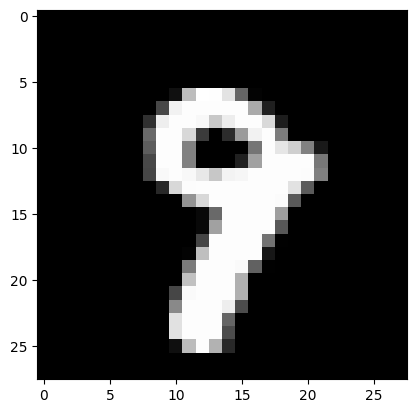

True
test id: 8020
individual experts pred: {1: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 1


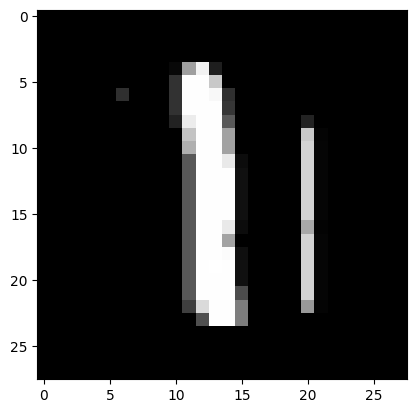

True
test id: 8062
individual experts pred: {5: 3, 8: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


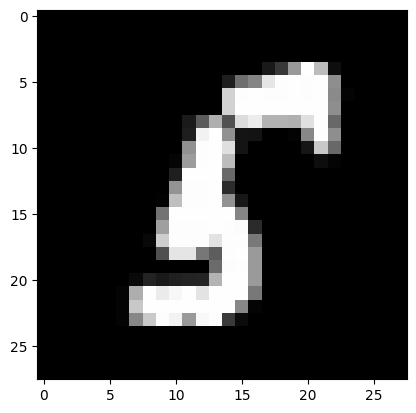

True
test id: 8094
individual experts pred: {2: 1, 8: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
true label: 2


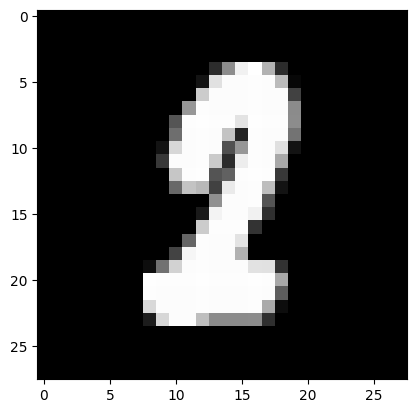

True
test id: 8102
individual experts pred: {2: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


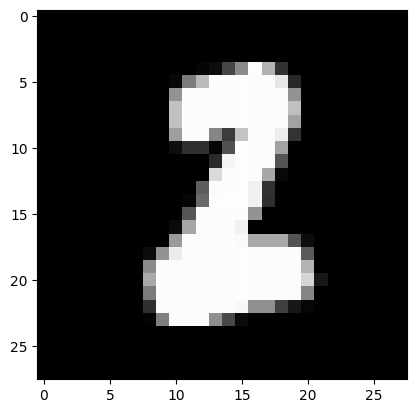

True
test id: 8160
individual experts pred: {3: 1, 5: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


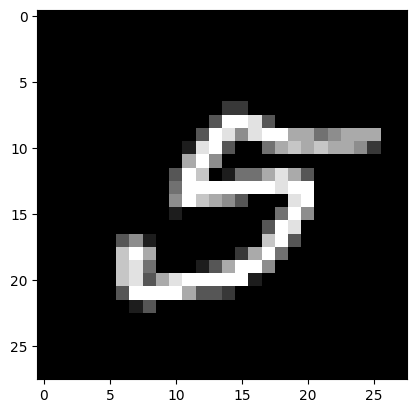

True
test id: 8183
individual experts pred: {5: 2, 8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


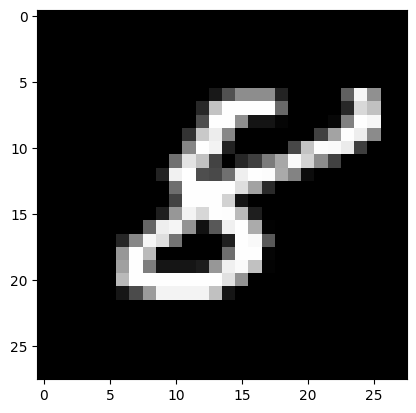

True
test id: 8196
individual experts pred: {6: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


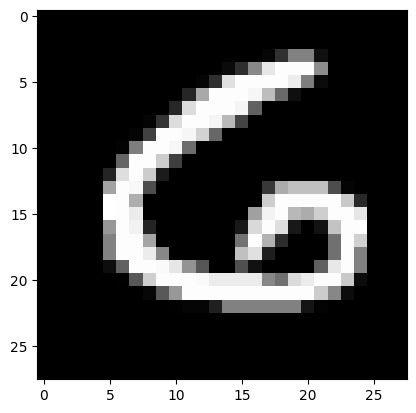

True
test id: 8243
individual experts pred: {0: 4, 3: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 0


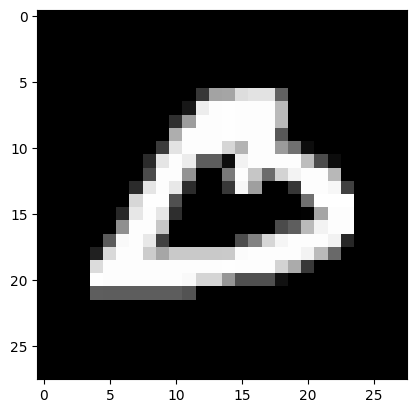

False
test id: 8246
individual experts pred: {3: 2, 5: 1, 9: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


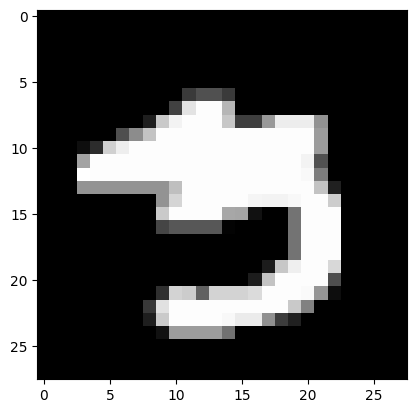

True
test id: 8255
individual experts pred: {4: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


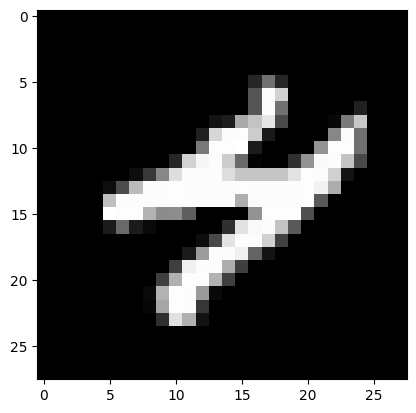

True
test id: 8277
individual experts pred: {8: 3, 9: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


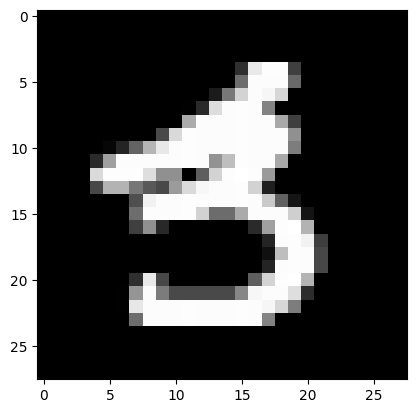

True
test id: 8290
individual experts pred: {3: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


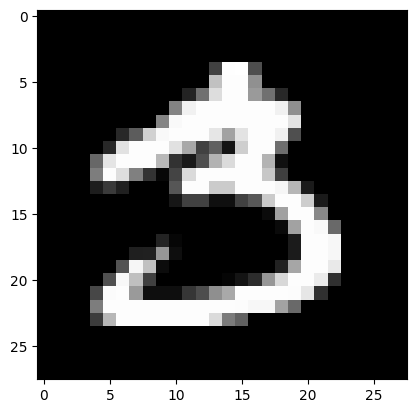

True
test id: 8308
individual experts pred: {3: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


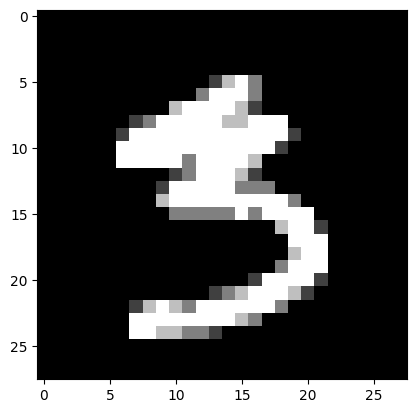

True
test id: 8325
individual experts pred: {0: 1, 6: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 0


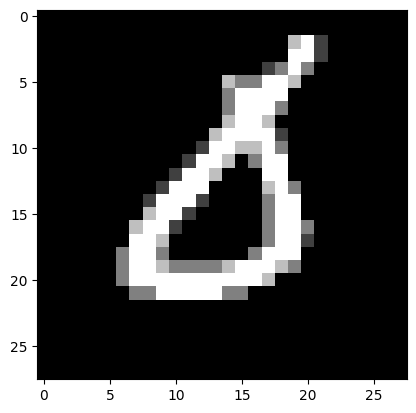

False
test id: 8339
individual experts pred: {6: 2, 8: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


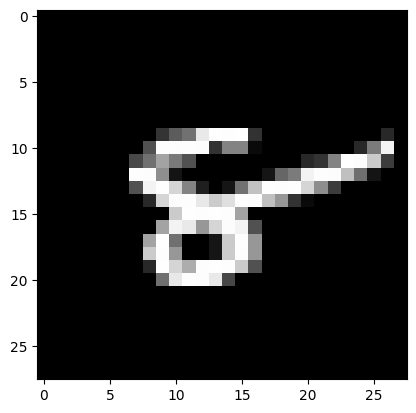

True
test id: 8408
individual experts pred: {6: 4, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


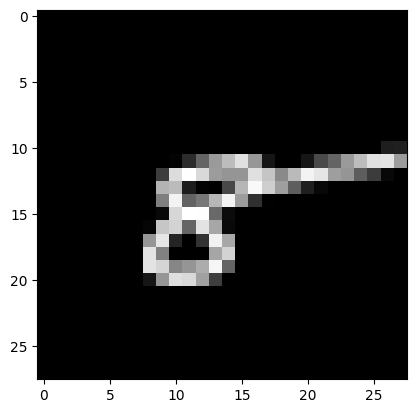

True
test id: 8508
individual experts pred: {3: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


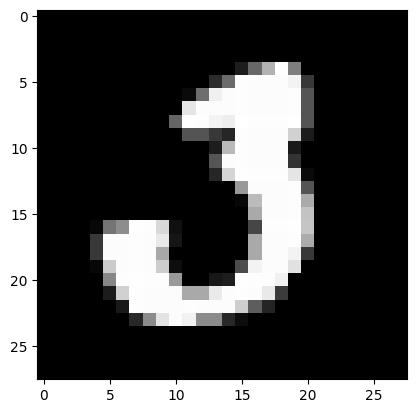

True
test id: 8520
individual experts pred: {4: 2, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


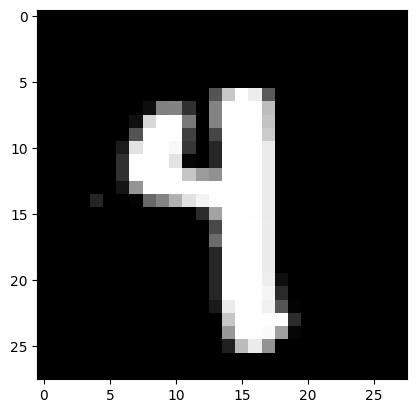

True
test id: 8522
individual experts pred: {8: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


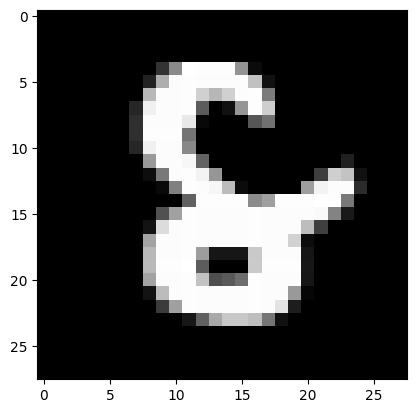

True
test id: 8527
individual experts pred: {4: 1, 9: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


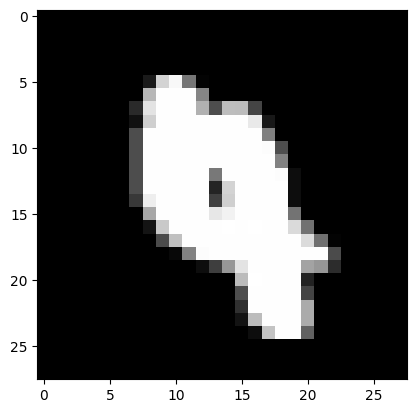

True
test id: 8553
individual experts pred: {5: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


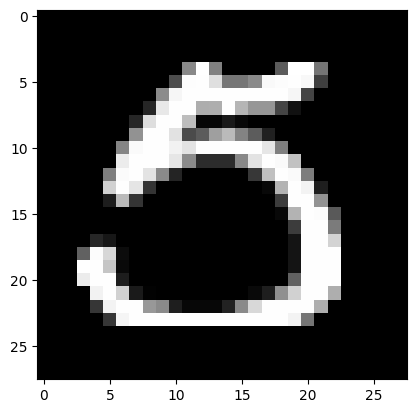

True
test id: 9009
individual experts pred: {2: 5}
PoE predictive: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


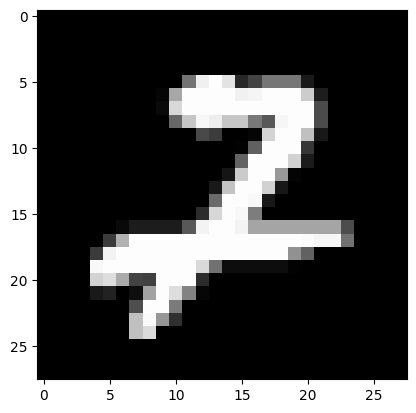

True
test id: 9015
individual experts pred: {2: 4, 7: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


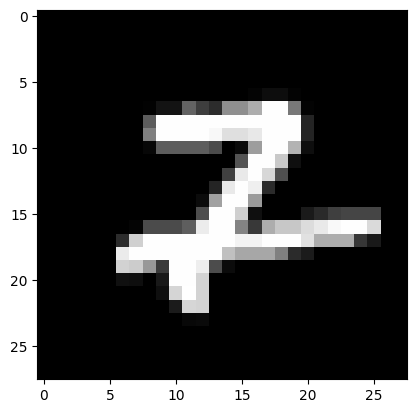

True
test id: 9019
individual experts pred: {2: 4, 7: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


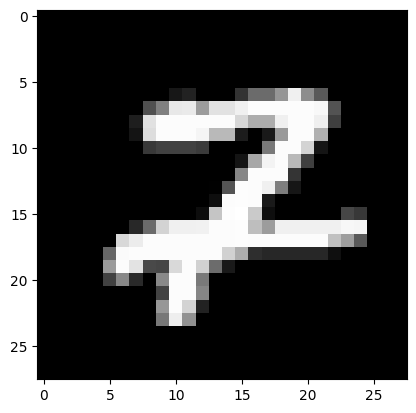

True
test id: 9024
individual experts pred: {2: 5}
PoE predictive: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


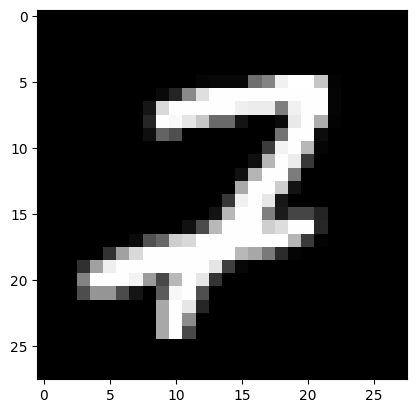

True
test id: 9046
individual experts pred: {2: 4, 3: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


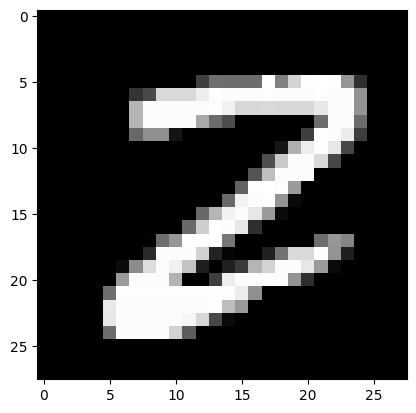

True
test id: 9280
individual experts pred: {5: 1, 8: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


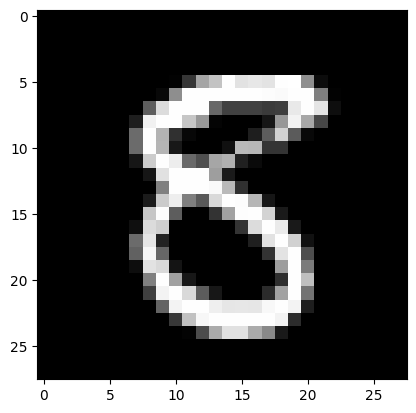

True
test id: 9505
individual experts pred: {7: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 7


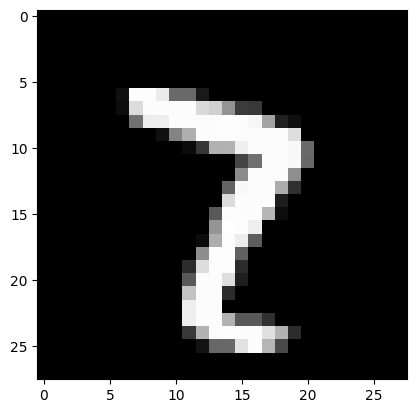

True
test id: 9540
individual experts pred: {1: 4, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 1


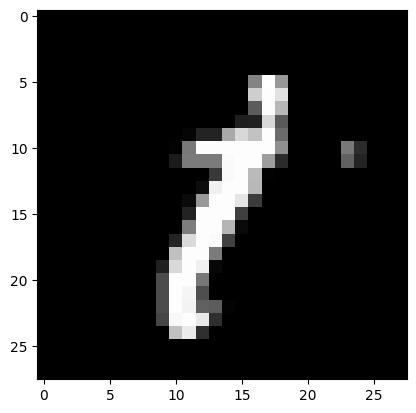

True
test id: 9587
individual experts pred: {4: 5, 9: 1}
PoE predictive: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
true label: 9


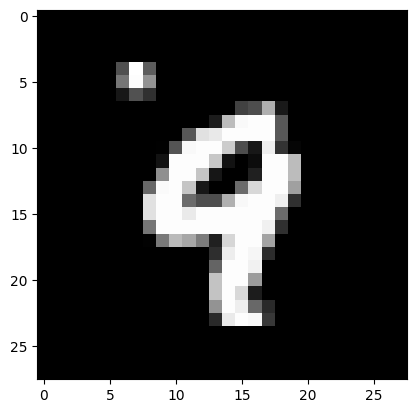

True
test id: 9634
individual experts pred: {1: 1, 3: 1, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 0


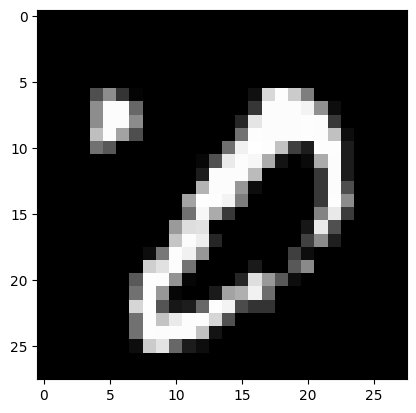

False
test id: 9664
individual experts pred: {2: 2, 7: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


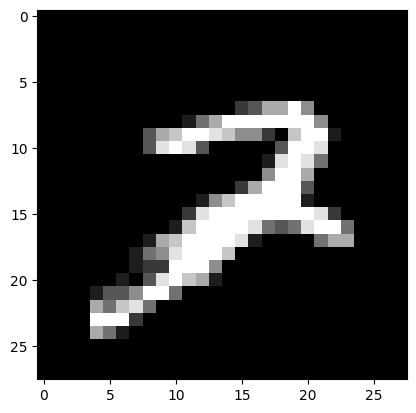

True
test id: 9669
individual experts pred: {4: 1, 7: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


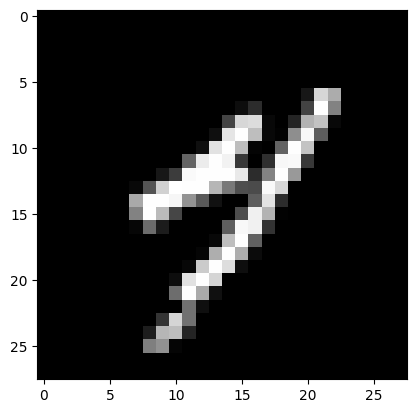

True
test id: 9679
individual experts pred: {3: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


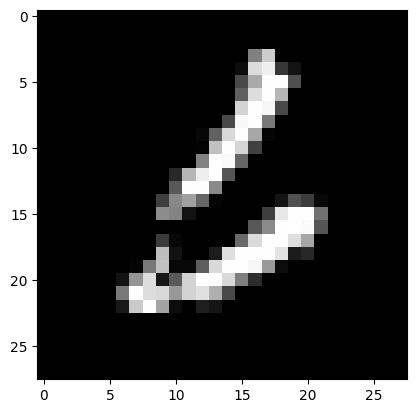

True
test id: 9698
individual experts pred: {5: 1, 6: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


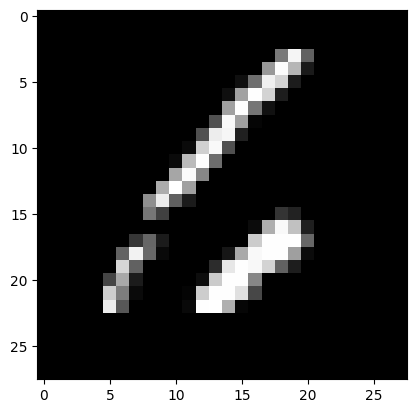

True
test id: 9700
individual experts pred: {2: 4, 8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


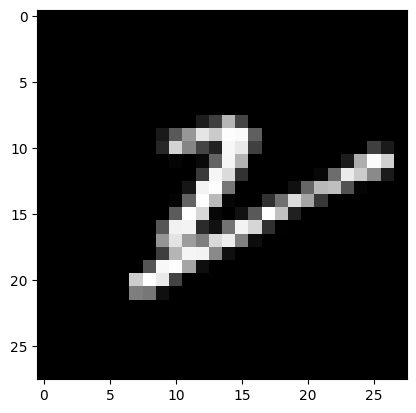

True
test id: 9719
individual experts pred: {0: 1, 5: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


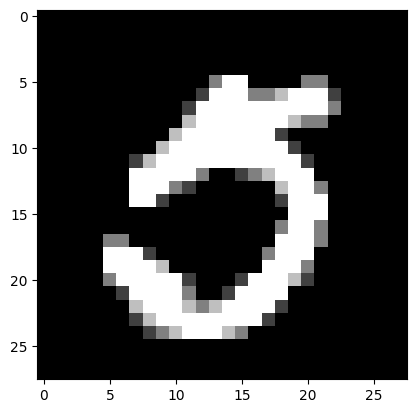

True
test id: 9729
individual experts pred: {6: 5}
PoE predictive: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
true label: 5


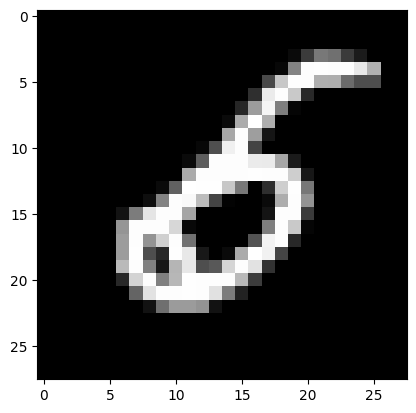

True
test id: 9733
individual experts pred: {9: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 9


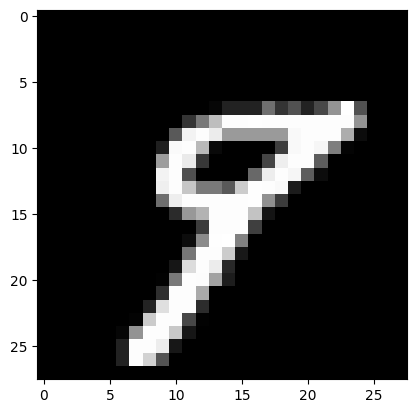

True
test id: 9745
individual experts pred: {0: 1, 4: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


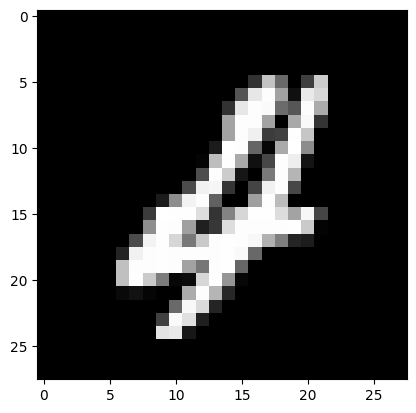

True
test id: 9749
individual experts pred: {3: 1, 5: 1, 6: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


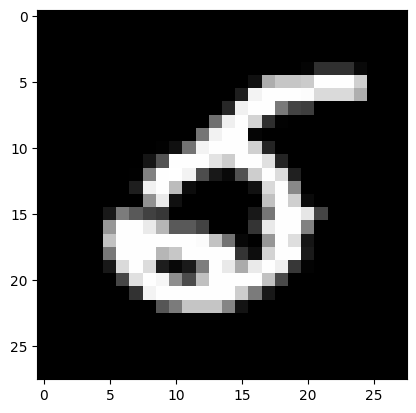

True
test id: 9755
individual experts pred: {5: 3, 8: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


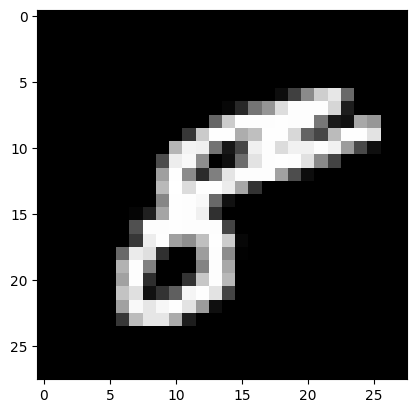

True
test id: 9768
individual experts pred: {0: 3, 2: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


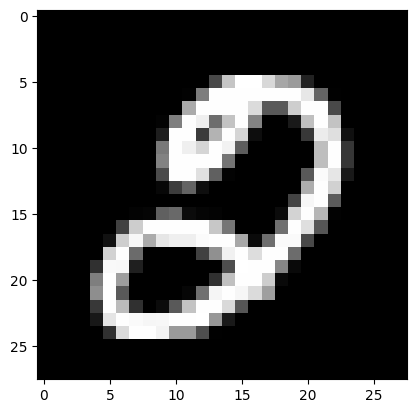

True
test id: 9770
individual experts pred: {0: 5}
PoE predictive: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


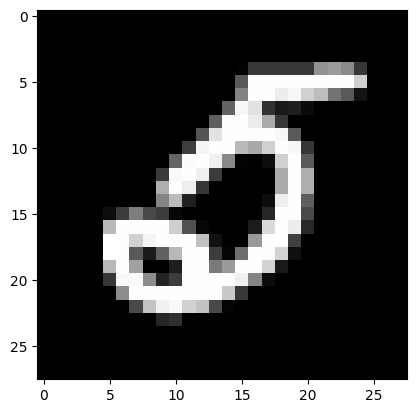

True
test id: 9777
individual experts pred: {0: 1, 5: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


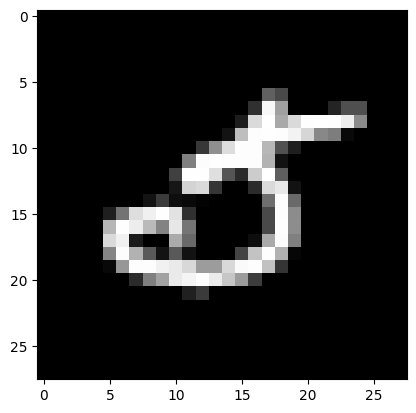

True
test id: 9779
individual experts pred: {0: 4, 2: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


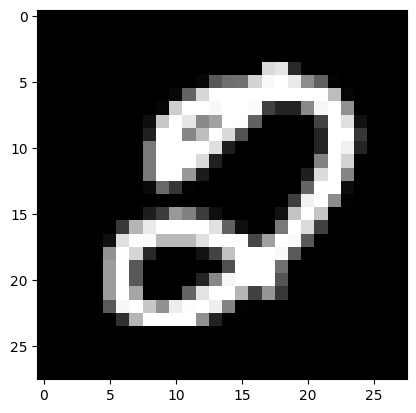

True
test id: 9782
individual experts pred: {5: 1, 6: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 6


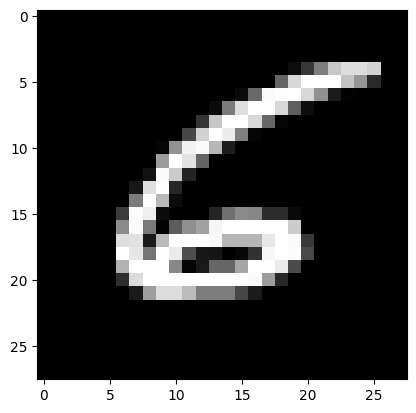

True
test id: 9792
individual experts pred: {1: 1, 4: 2, 9: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 4


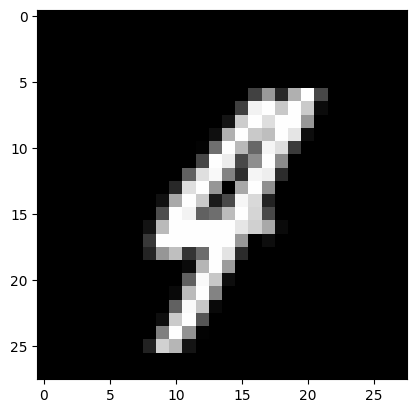

True
test id: 9808
individual experts pred: {4: 5, 9: 1}
PoE predictive: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
true label: 9


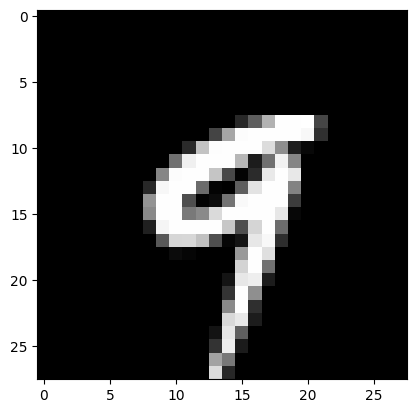

True
test id: 9811
individual experts pred: {2: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


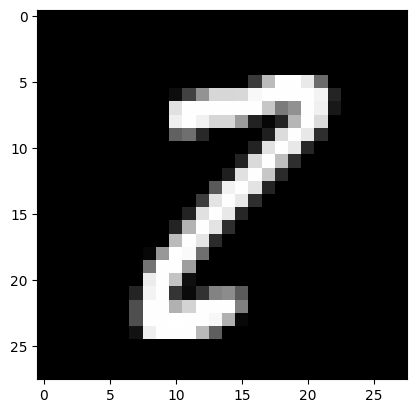

True
test id: 9839
individual experts pred: {7: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


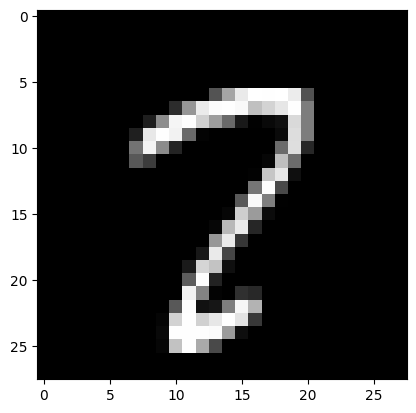

True
test id: 9847
individual experts pred: {2: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


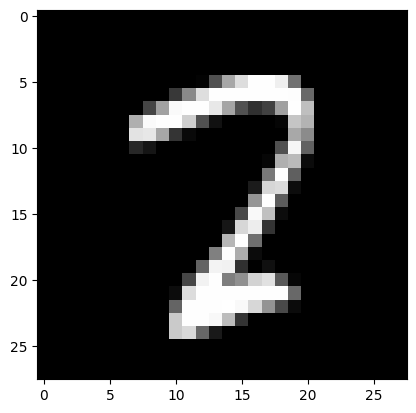

True
test id: 9879
individual experts pred: {0: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 0


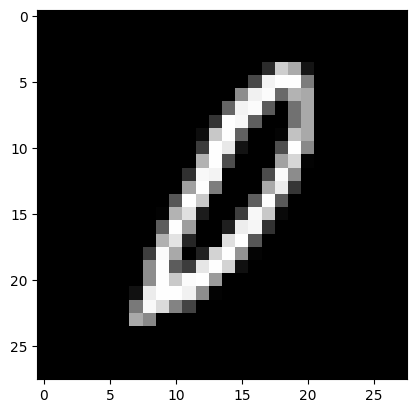

False
test id: 9892
individual experts pred: {8: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 8


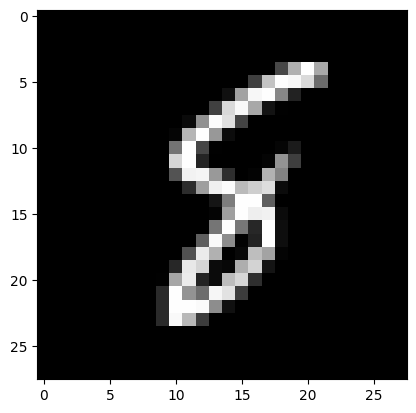

True
test id: 9904
individual experts pred: {2: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


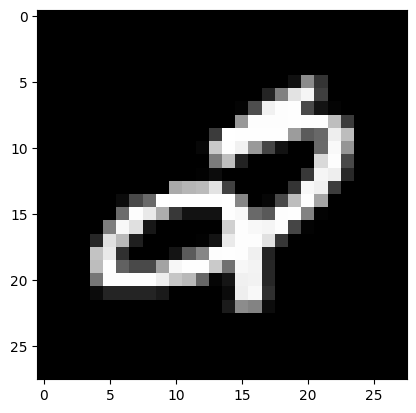

True
test id: 9905
individual experts pred: {3: 4}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


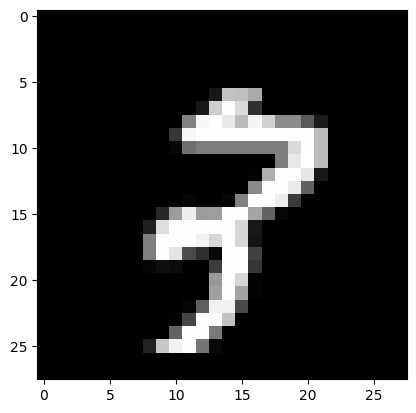

True
test id: 9941
individual experts pred: {5: 3}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


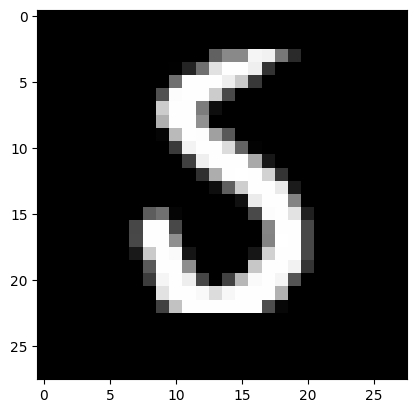

True
test id: 9944
individual experts pred: {8: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 3


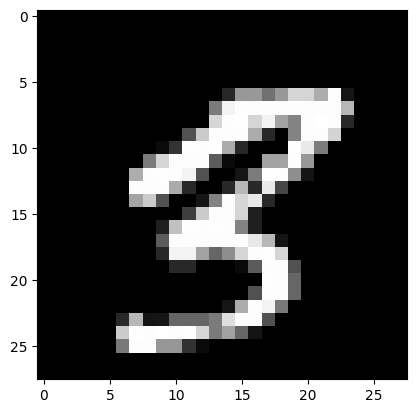

True
test id: 9980
individual experts pred: {2: 4, 3: 1}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 2


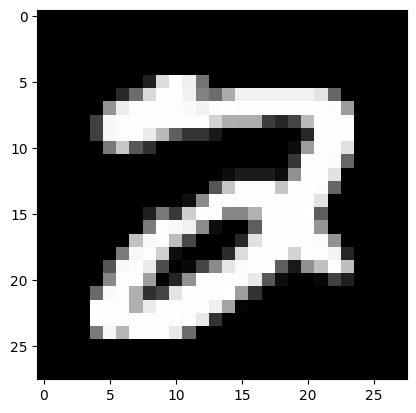

True
test id: 9982
individual experts pred: {5: 4, 6: 2}
PoE predictive: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true label: 5


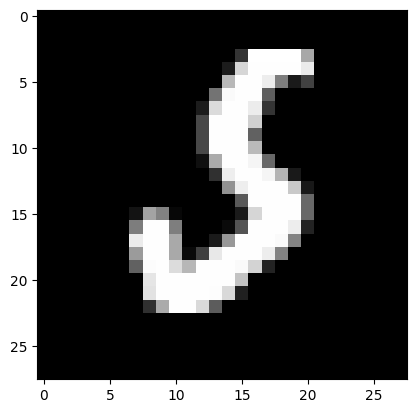

True


In [19]:
for id_ in np.arange(len(nlls_))[np.array(infs)]:
    print("=============================================================")
    print(f"test id: {id_}")
    # print(nn.sigmoid(logits[id_]).round())
    print(f"individual experts pred: {get_experts_preds(nn.sigmoid(logits[id_]).round())}" )
    print(f"PoE predictive: {ovr_prod_probs(logits[id_])}")
    print(f"true label: {y_test[id_]}")
    plt.imshow(X_test[id_].reshape(28, 28), cmap='gray')
    plt.show()
    print(ovr_err(logits[id_], y_test[id_]))